In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/Major-project-8th-sem')

import bayesiantests as bt


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Major-project-8th-sem/10CV_Perceptron_15datasets.csv')
df[:10]

Unnamed: 0  Dataset   Delta     MSE     BCE  AccAim   F1Aim  F.5Aim   F2Aim  \
0        Acc        D   0.656   0.644    0.66   0.664   0.664    0.66   0.668   
1         F1        S  0.5507  0.5189  0.5423  0.6152  0.6669  0.6045  0.6824   
2        F.5        1  0.5342   0.518  0.5362  0.5609  0.5743  0.5514   0.583   
3         F2        C  0.5718  0.5257  0.5548   0.685  0.7981  0.6739  0.8266   
4      Gmean        S  0.6337   0.606   0.626  0.6725  0.6848  0.6644  0.6861   
5      B_Acc        V  0.6413  0.6198  0.6396  0.6816  0.7205   0.676  0.7333   
6        NaN  Dataset   Delta     MSE     BCE  AccAim   F1Aim  F.5Aim   F2Aim   
7        Acc        D    0.82   0.808   0.836    0.84   0.816   0.844   0.676   
8         F1        S  0.7561  0.7445  0.7732  0.7712  0.7465  0.7751  0.6623   
9        F.5        2  0.7641  0.7458  0.7922  0.8111  0.7723  0.8176  0.5938   

     GAim    BAim  
0   0.668   0.664  
1  0.6357  0.6673  
2  0.5702  0.5753  
3   0.723  0.7981  
4  0.6825  0.6842  
5  0.6969  0.7205  
6    GAim    BAim  
7   0.808   0.808  
8  0.7388   0.739  
9  0.7599  0.7609

In [5]:
df.rename(columns={'Unnamed: 0':'Metrics'}, inplace=True)
df

Metrics Dataset   Delta     MSE     BCE  AccAim   F1Aim  F.5Aim   F2Aim  \
0       Acc       D   0.656   0.644    0.66   0.664   0.664    0.66   0.668   
1        F1       S  0.5507  0.5189  0.5423  0.6152  0.6669  0.6045  0.6824   
2       F.5       1  0.5342   0.518  0.5362  0.5609  0.5743  0.5514   0.583   
3        F2       C  0.5718  0.5257  0.5548   0.685  0.7981  0.6739  0.8266   
4     Gmean       S  0.6337   0.606   0.626  0.6725  0.6848  0.6644  0.6861   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
708      F1       S  0.8091   0.802  0.8779  0.8846  0.8844   0.852  0.8452   
709     F.5     105  0.8959  0.8925  0.8962  0.9027  0.8901  0.9172  0.7872   
710      F2       C  0.7378  0.7284  0.8605  0.8673   0.879  0.7956  0.9127   
711   Gmean       S  0.8326  0.8264  0.9139  0.9181  0.9261  0.8706  0.9512   
712   B_Acc       V   0.846  0.8408  0.9165  0.9204  0.9276  0.8785  0.9513   

       GAim    BAim  
0     0.668   0.664  
1    0.6357  0.6673  
2    0.5702  0.5753  
3     0.723  0.7981  
4    0.6825  0.6842  
..      ...     ...  
708  0.8463  0.8323  
709  0.7865  0.7664  
710  0.9161  0.9109  
711  0.9535  0.9506  
712  0.9536  0.9508  

[713 rows x 11 columns]

In [6]:
df_a = df.drop('Dataset', axis=1)
df_a = df_a.drop('Delta', axis=1)
df_a

Metrics     MSE     BCE  AccAim   F1Aim  F.5Aim   F2Aim    GAim    BAim
0       Acc   0.644    0.66   0.664   0.664    0.66   0.668   0.668   0.664
1        F1  0.5189  0.5423  0.6152  0.6669  0.6045  0.6824  0.6357  0.6673
2       F.5   0.518  0.5362  0.5609  0.5743  0.5514   0.583  0.5702  0.5753
3        F2  0.5257  0.5548   0.685  0.7981  0.6739  0.8266   0.723  0.7981
4     Gmean   0.606   0.626  0.6725  0.6848  0.6644  0.6861  0.6825  0.6842
..      ...     ...     ...     ...     ...     ...     ...     ...     ...
708      F1   0.802  0.8779  0.8846  0.8844   0.852  0.8452  0.8463  0.8323
709     F.5  0.8925  0.8962  0.9027  0.8901  0.9172  0.7872  0.7865  0.7664
710      F2  0.7284  0.8605  0.8673   0.879  0.7956  0.9127  0.9161  0.9109
711   Gmean  0.8264  0.9139  0.9181  0.9261  0.8706  0.9512  0.9535  0.9506
712   B_Acc  0.8408  0.9165  0.9204  0.9276  0.8785  0.9513  0.9536  0.9508

[713 rows x 9 columns]

In [7]:
df_b = df_a.fillna(0)
df_b[:10]

Metrics     MSE     BCE  AccAim   F1Aim  F.5Aim   F2Aim    GAim    BAim
0     Acc   0.644    0.66   0.664   0.664    0.66   0.668   0.668   0.664
1      F1  0.5189  0.5423  0.6152  0.6669  0.6045  0.6824  0.6357  0.6673
2     F.5   0.518  0.5362  0.5609  0.5743  0.5514   0.583  0.5702  0.5753
3      F2  0.5257  0.5548   0.685  0.7981  0.6739  0.8266   0.723  0.7981
4   Gmean   0.606   0.626  0.6725  0.6848  0.6644  0.6861  0.6825  0.6842
5   B_Acc  0.6198  0.6396  0.6816  0.7205   0.676  0.7333  0.6969  0.7205
6       0     MSE     BCE  AccAim   F1Aim  F.5Aim   F2Aim    GAim    BAim
7     Acc   0.808   0.836    0.84   0.816   0.844   0.676   0.808   0.808
8      F1  0.7445  0.7732  0.7712  0.7465  0.7751  0.6623  0.7388   0.739
9     F.5  0.7458  0.7922  0.8111  0.7723  0.8176  0.5938  0.7599  0.7609

In [8]:
df_b = df_b[df_b.Metrics != 0]
df_b = df_b.reset_index(drop=True)
df_b

Metrics     MSE     BCE  AccAim   F1Aim  F.5Aim   F2Aim    GAim    BAim
0       Acc   0.644    0.66   0.664   0.664    0.66   0.668   0.668   0.664
1        F1  0.5189  0.5423  0.6152  0.6669  0.6045  0.6824  0.6357  0.6673
2       F.5   0.518  0.5362  0.5609  0.5743  0.5514   0.583  0.5702  0.5753
3        F2  0.5257  0.5548   0.685  0.7981  0.6739  0.8266   0.723  0.7981
4     Gmean   0.606   0.626  0.6725  0.6848  0.6644  0.6861  0.6825  0.6842
..      ...     ...     ...     ...     ...     ...     ...     ...     ...
607      F1   0.802  0.8779  0.8846  0.8844   0.852  0.8452  0.8463  0.8323
608     F.5  0.8925  0.8962  0.9027  0.8901  0.9172  0.7872  0.7865  0.7664
609      F2  0.7284  0.8605  0.8673   0.879  0.7956  0.9127  0.9161  0.9109
610   Gmean  0.8264  0.9139  0.9181  0.9261  0.8706  0.9512  0.9535  0.9506
611   B_Acc  0.8408  0.9165  0.9204  0.9276  0.8785  0.9513  0.9536  0.9508

[612 rows x 9 columns]

In [9]:
Data = []
for i in range(df_b.shape[0]):
    Data.append((i//6)+1)
print(Data)

[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 44, 44, 44, 44, 44, 4

In [10]:
df_b.insert(loc=0, column='Dataset', value = Data)
df_b

Dataset Metrics     MSE     BCE  AccAim   F1Aim  F.5Aim   F2Aim    GAim  \
0          1     Acc   0.644    0.66   0.664   0.664    0.66   0.668   0.668   
1          1      F1  0.5189  0.5423  0.6152  0.6669  0.6045  0.6824  0.6357   
2          1     F.5   0.518  0.5362  0.5609  0.5743  0.5514   0.583  0.5702   
3          1      F2  0.5257  0.5548   0.685  0.7981  0.6739  0.8266   0.723   
4          1   Gmean   0.606   0.626  0.6725  0.6848  0.6644  0.6861  0.6825   
..       ...     ...     ...     ...     ...     ...     ...     ...     ...   
607      102      F1   0.802  0.8779  0.8846  0.8844   0.852  0.8452  0.8463   
608      102     F.5  0.8925  0.8962  0.9027  0.8901  0.9172  0.7872  0.7865   
609      102      F2  0.7284  0.8605  0.8673   0.879  0.7956  0.9127  0.9161   
610      102   Gmean  0.8264  0.9139  0.9181  0.9261  0.8706  0.9512  0.9535   
611      102   B_Acc  0.8408  0.9165  0.9204  0.9276  0.8785  0.9513  0.9536   

       BAim  
0     0.664  
1    0.6673  
2    0.5753  
3    0.7981  
4    0.6842  
..      ...  
607  0.8323  
608  0.7664  
609  0.9109  
610  0.9506  
611  0.9508  

[612 rows x 10 columns]

In [11]:
df_b.iloc[:,2:] = df_b.iloc[:,2:].apply(pd.to_numeric)
df_b.dtypes

Dataset     int64
Metrics    object
MSE        object
BCE        object
AccAim     object
F1Aim      object
F.5Aim     object
F2Aim      object
GAim       object
BAim       object
dtype: object

In [13]:
# Accuracy
df_acc = df_b[df_b['Metrics'] == "Acc"][['Dataset','Metrics','MSE','BCE','AccAim']]
df_acc = df_acc.reset_index(drop=True)
# F1
df_F1 = df_b[df_b['Metrics'] == "F1"][['Dataset','Metrics','MSE','BCE','F1Aim']]
df_F1 = df_F1.reset_index(drop=True)
# F.5
df_F05 = df_b[df_b['Metrics'] == "F.5"][['Dataset','Metrics','MSE','BCE','F.5Aim']]
df_F05 = df_F05.reset_index(drop=True)
# F2
df_F2 = df_b[df_b['Metrics'] == "F2"][['Dataset','Metrics','MSE','BCE','F2Aim']]
df_F2 = df_F2.reset_index(drop=True)
# Gmean
df_Gmean = df_b[df_b['Metrics'] == "Gmean"][['Dataset','Metrics','MSE','BCE','GAim']]
df_Gmean = df_Gmean.reset_index(drop=True)
# B_Acc
df_B_Acc = df_b[df_b['Metrics'] == "B_Acc"][['Dataset','Metrics','MSE','BCE','BAim']]
df_B_Acc = df_B_Acc.reset_index(drop=True)

In [14]:
df_acc

Dataset Metrics     MSE     BCE  AccAim
0          1     Acc   0.644    0.66   0.664
1          2     Acc   0.808   0.836    0.84
2          3     Acc  0.7385  0.7449  0.7649
3          4     Acc   0.829  0.8452  0.8548
4          5     Acc  0.6687   0.675  0.6719
..       ...     ...     ...     ...     ...
97        98     Acc  0.9312  0.9314  0.9315
98        99     Acc  0.8955  0.9108  0.9122
99       100     Acc  0.9131  0.9247  0.9286
100      101     Acc  0.8131  0.8193  0.8174
101      102     Acc  0.9452  0.9618  0.9638

[102 rows x 5 columns]

In [15]:
def stacked_bar(results, category_names):

    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncols=len(category_names), bbox_to_anchor=(0, 1),
              loc='upper left', fontsize='small')

    return fig, ax

In [16]:
baselines = ['MSE','BCE']
ours = ['AccAim','F1Aim','F.5Aim','F2Aim','GAim','BAim']
dfs = [df_acc,df_F1,df_F05,df_F2,df_Gmean,df_B_Acc]

0
('MSE', 'AccAim')
P(MSE > AccAim) = 0.0, P(rope) = 0.99488, P(AccAim > MSE) = 0.00512
0.0 0.99488 0.00512


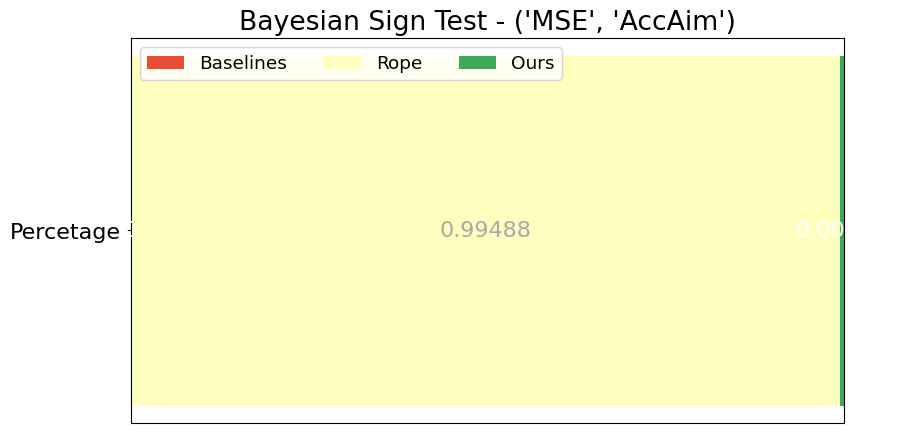

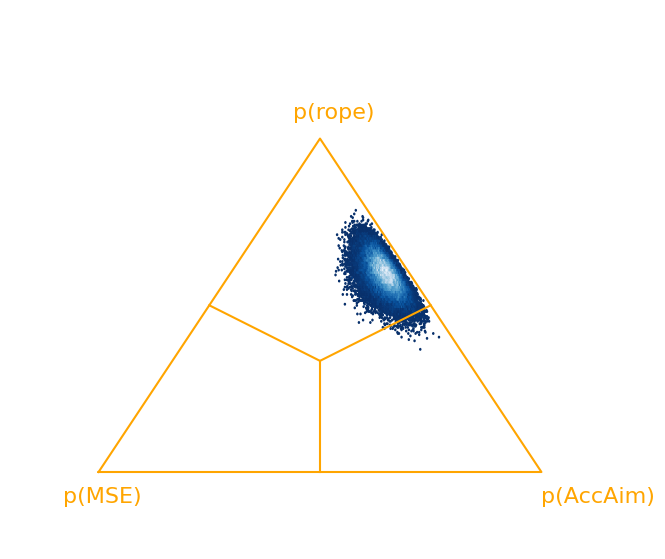

1
('BCE', 'AccAim')
P(BCE > AccAim) = 0.0, P(rope) = 1.0, P(AccAim > BCE) = 0.0
0.0 1.0 0.0


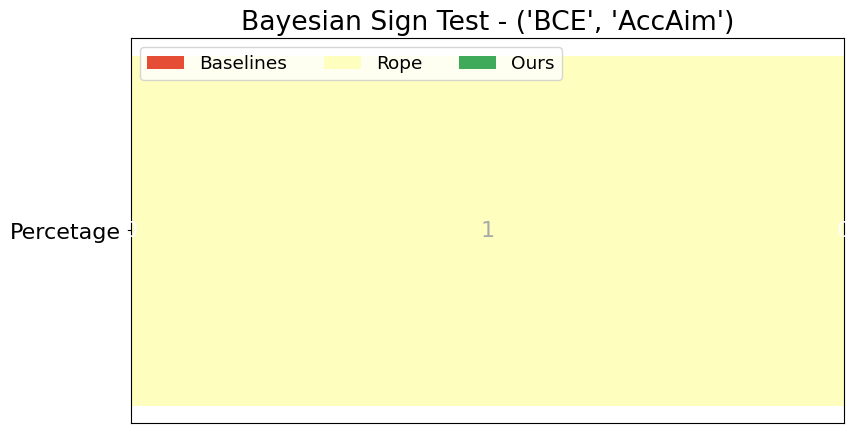

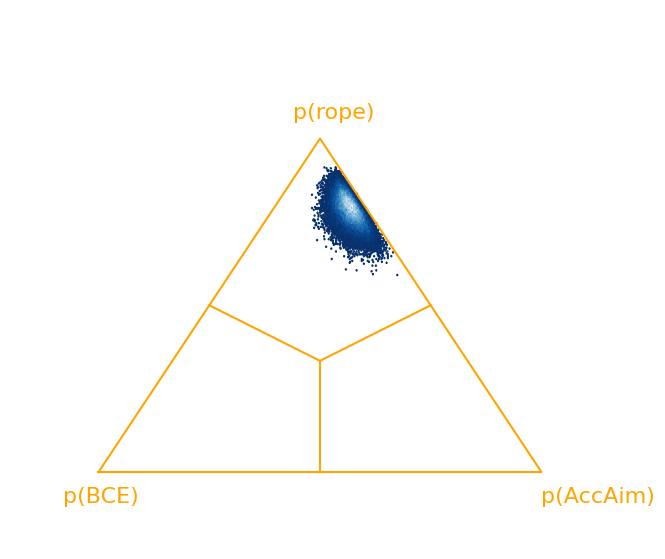

2
('MSE', 'F1Aim')
P(MSE > F1Aim) = 0.0, P(rope) = 0.0, P(F1Aim > MSE) = 1.0
0.0 0.0 1.0


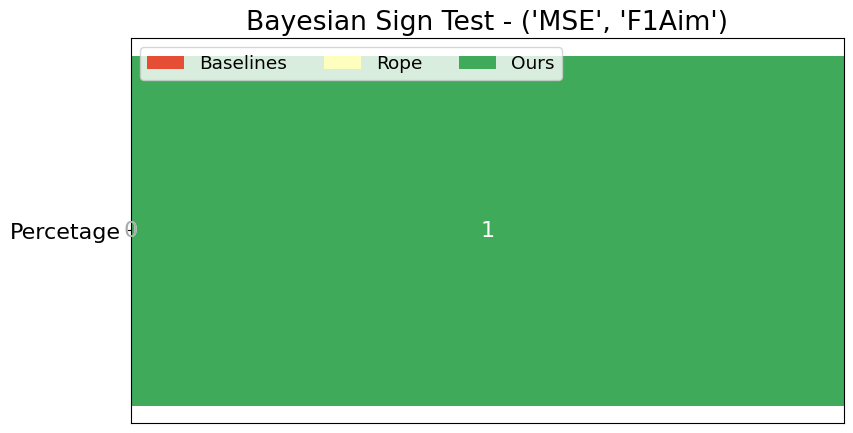

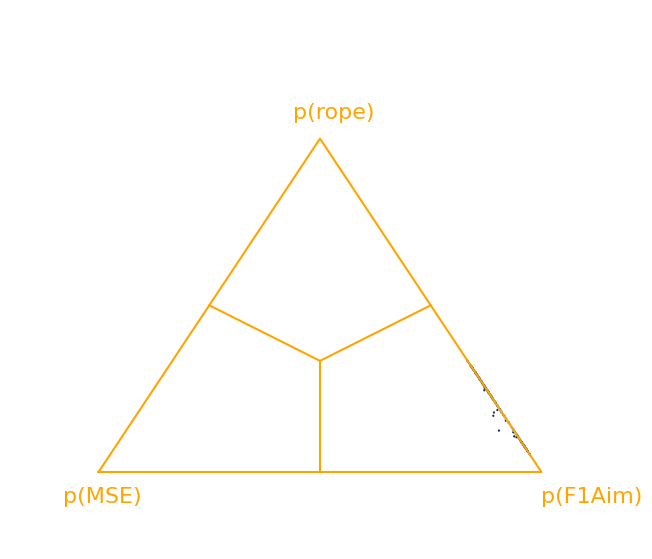

3
('BCE', 'F1Aim')
P(BCE > F1Aim) = 0.0, P(rope) = 0.0, P(F1Aim > BCE) = 1.0
0.0 0.0 1.0


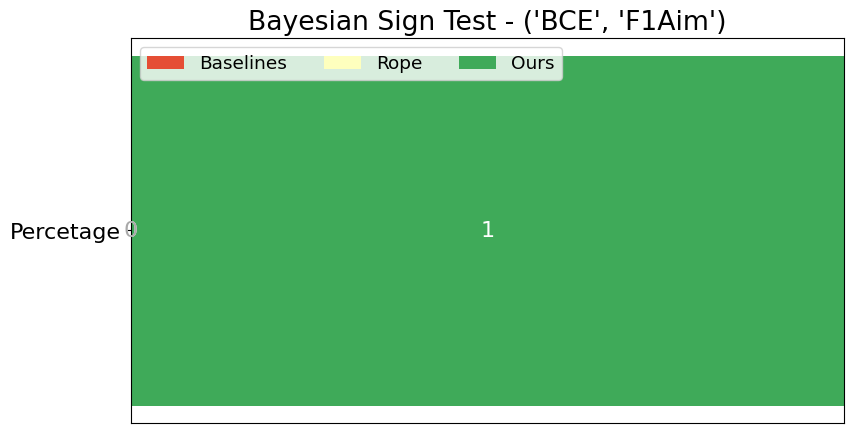

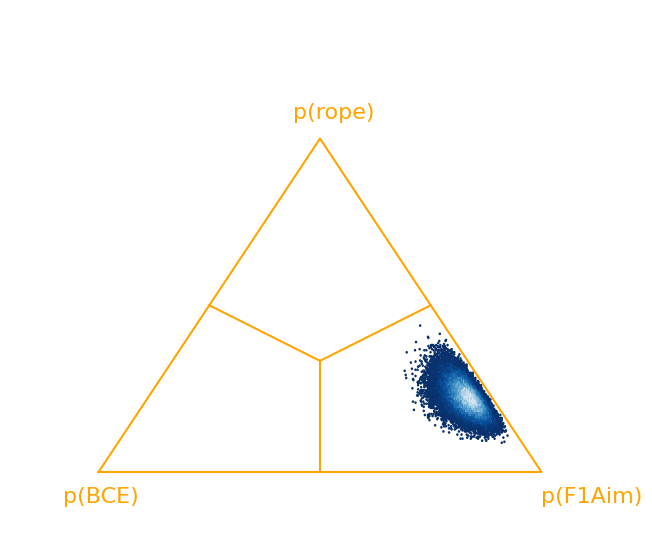

4
('MSE', 'F.5Aim')
P(MSE > F.5Aim) = 0.0, P(rope) = 0.0, P(F.5Aim > MSE) = 1.0
0.0 0.0 1.0


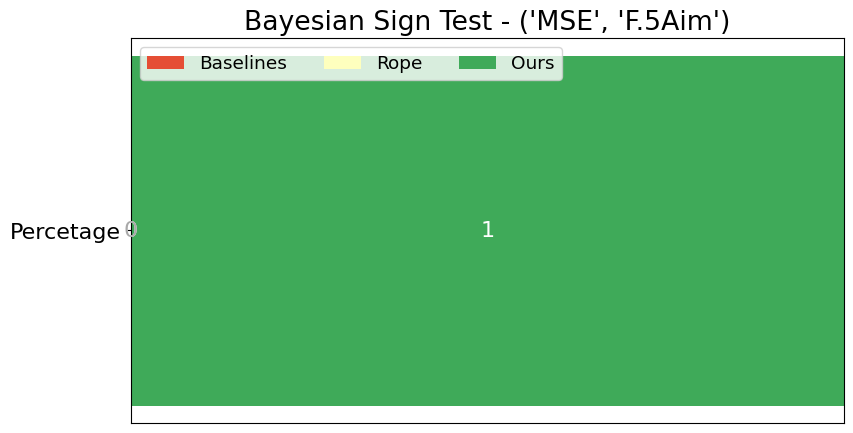

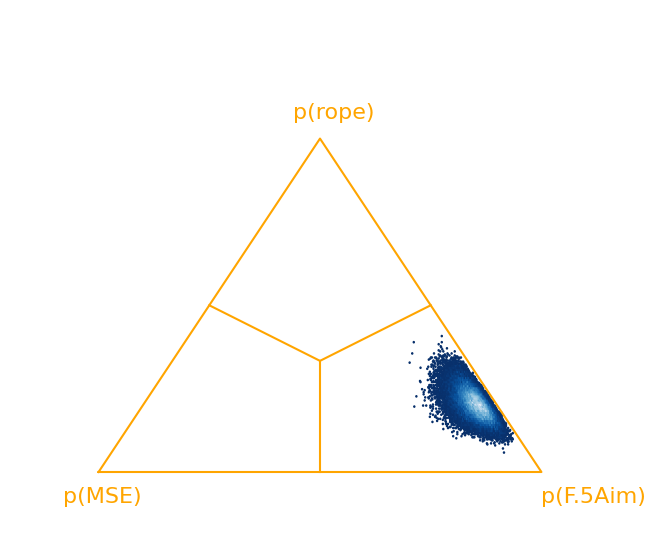

5
('BCE', 'F.5Aim')
P(BCE > F.5Aim) = 0.0, P(rope) = 2e-05, P(F.5Aim > BCE) = 0.99998
0.0 2e-05 0.99998


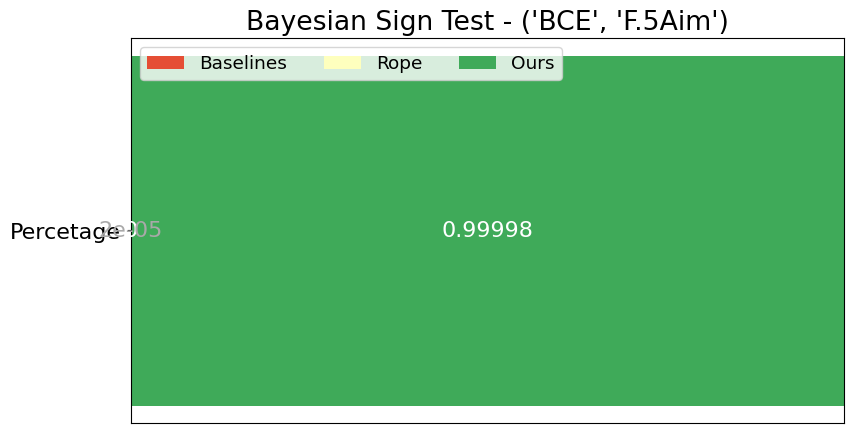

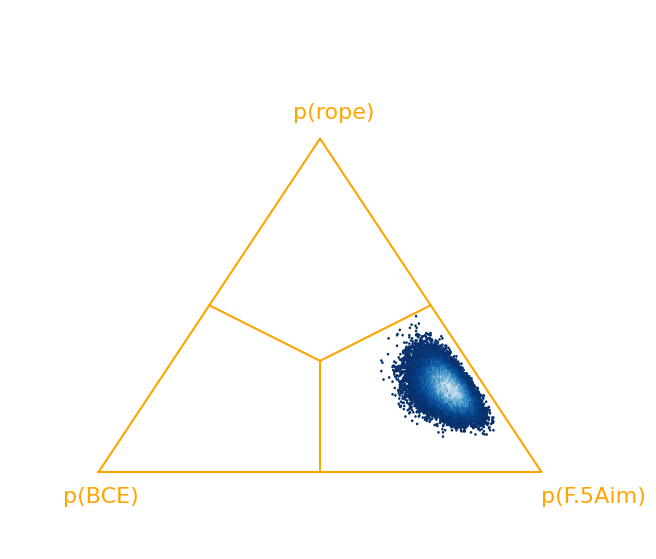

6
('MSE', 'F2Aim')
P(MSE > F2Aim) = 0.0, P(rope) = 0.0, P(F2Aim > MSE) = 1.0
0.0 0.0 1.0


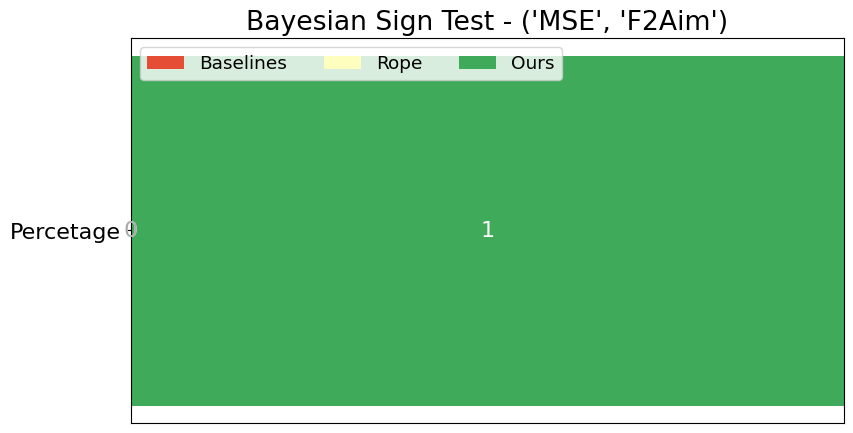

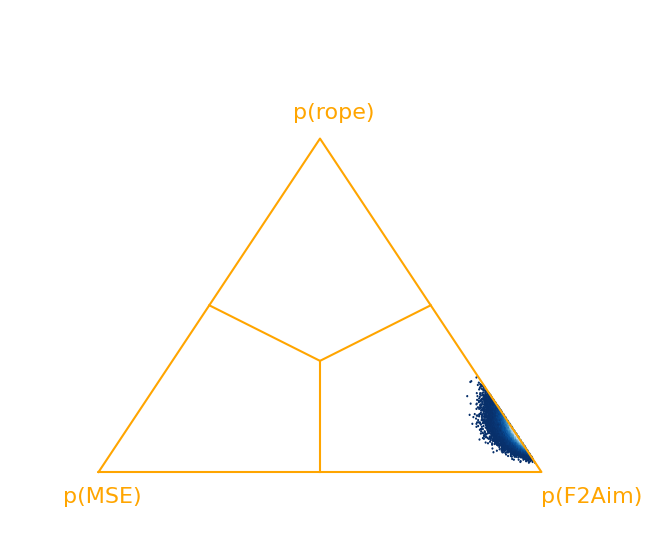

7
('BCE', 'F2Aim')
P(BCE > F2Aim) = 0.0, P(rope) = 0.0, P(F2Aim > BCE) = 1.0
0.0 0.0 1.0


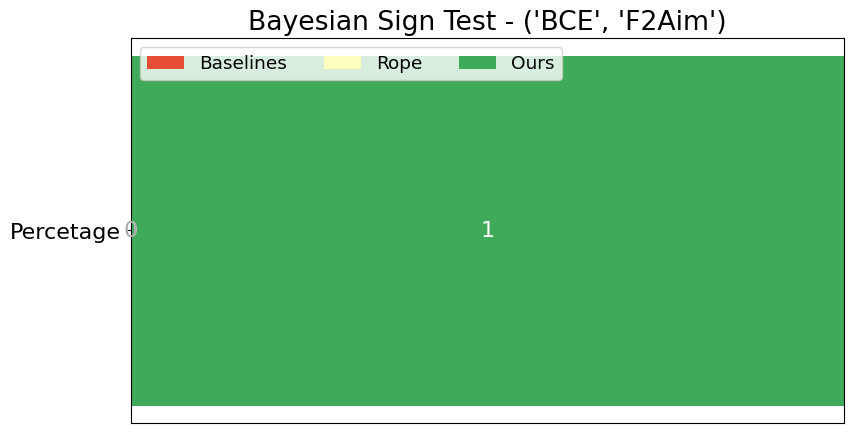

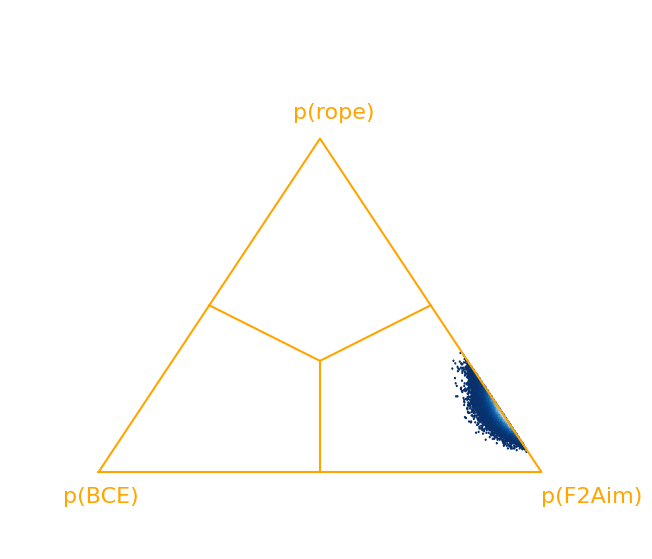

8
('MSE', 'GAim')
P(MSE > GAim) = 0.0, P(rope) = 0.0, P(GAim > MSE) = 1.0
0.0 0.0 1.0


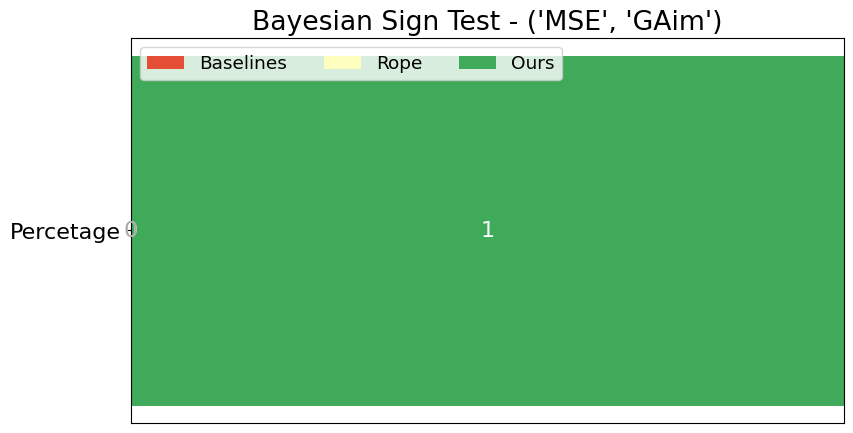

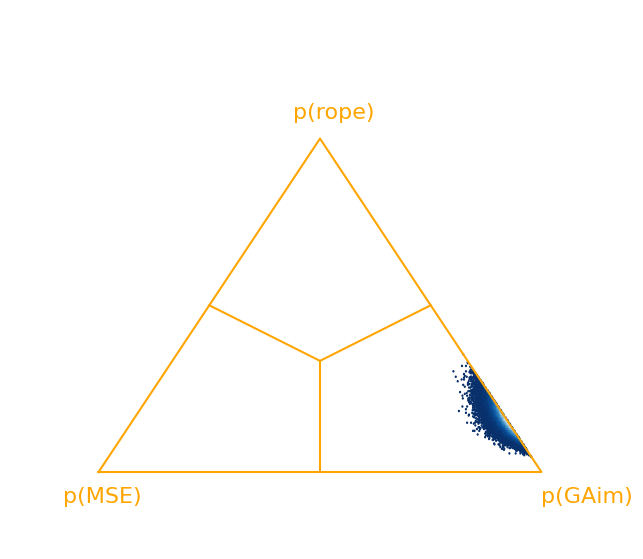

9
('BCE', 'GAim')
P(BCE > GAim) = 0.0, P(rope) = 0.0, P(GAim > BCE) = 1.0
0.0 0.0 1.0


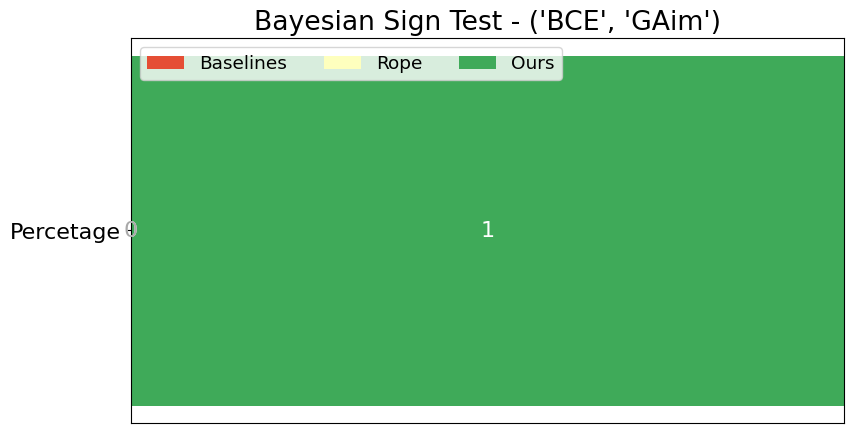

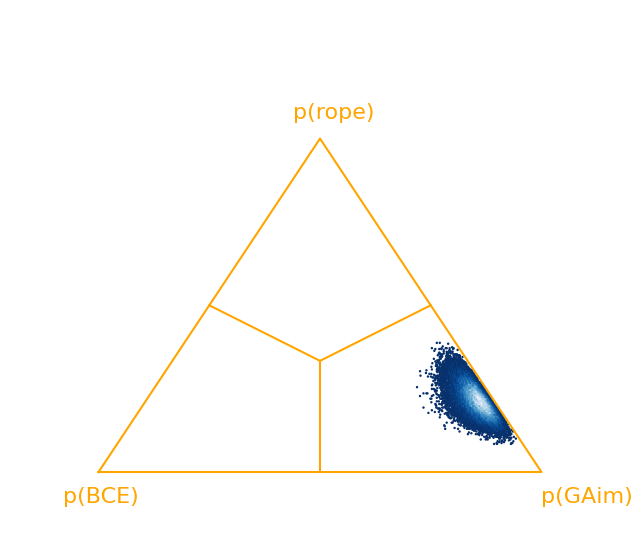

10
('MSE', 'BAim')
P(MSE > BAim) = 0.0, P(rope) = 0.0, P(BAim > MSE) = 1.0
0.0 0.0 1.0


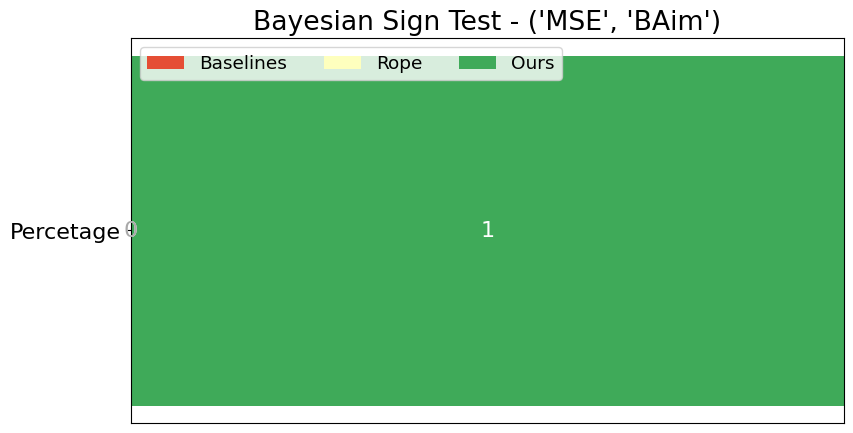

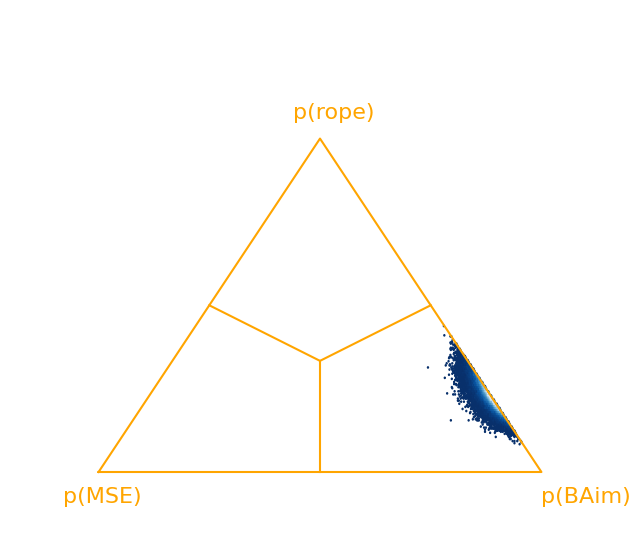

11
('BCE', 'BAim')
P(BCE > BAim) = 0.0, P(rope) = 2e-05, P(BAim > BCE) = 0.99998
0.0 2e-05 0.99998


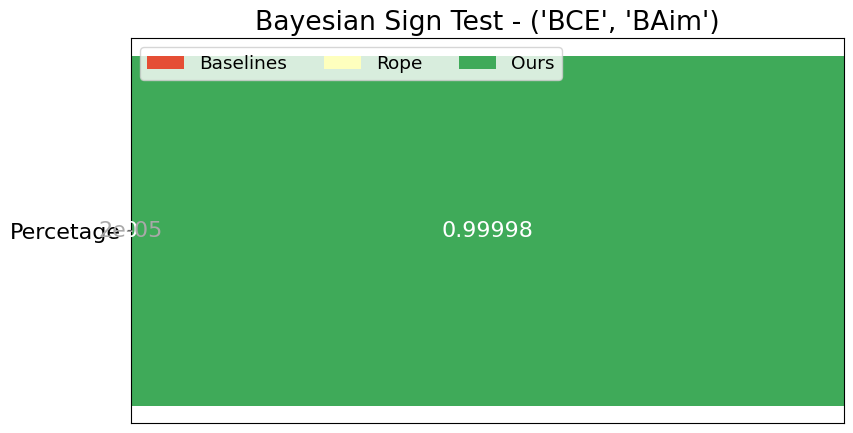

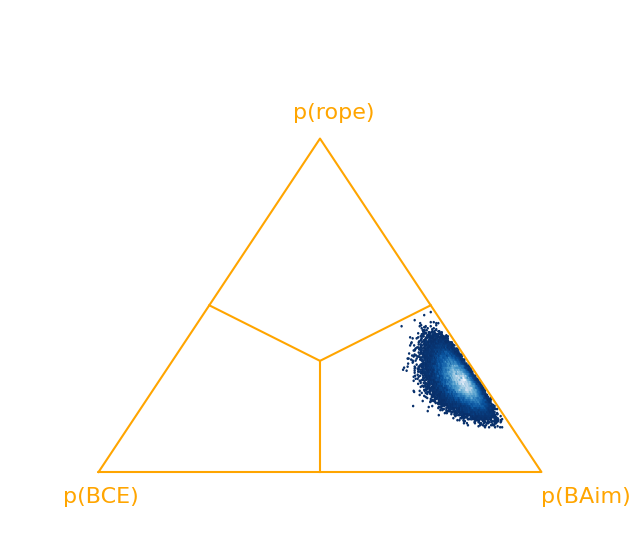

In [18]:
comp = []
basewin = []
draw = []
ourswin = []
z = 0
for i in range(len(ours)):
    for j in range(len(baselines)):
        print(z)
        names = (baselines[j],ours[i])
        print(names)
        comp.append(names)
        X = np.array(dfs[i][[baselines[j],ours[i]]])
        left, within, right = bt.signtest(X, rope=0.01, verbose=True, names=names)
        print(left, within, right)
        basewin.append(left)
        draw.append(within)
        ourswin.append(right)
        stacked_bar({"Percetage": [left, within, right]}, ["Baselines", "Rope", "Ours"])
        plt.title("Bayesian Sign Test - {}".format(names))
        z +=1
        %matplotlib inline
        samples = bt.signtest_MC(X, rope=0.01)
        fig = bt.plot_posterior(samples,names)
        plt.savefig('triangle.png',facecolor="black")
        plt.show()

In [19]:
print(comp)
print(basewin)
print(draw)
print(ourswin)

[('MSE', 'AccAim'), ('BCE', 'AccAim'), ('MSE', 'F1Aim'), ('BCE', 'F1Aim'), ('MSE', 'F.5Aim'), ('BCE', 'F.5Aim'), ('MSE', 'F2Aim'), ('BCE', 'F2Aim'), ('MSE', 'GAim'), ('BCE', 'GAim'), ('MSE', 'BAim'), ('BCE', 'BAim')]
[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
[np.float64(0.99488), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(2e-05), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(2e-05)]
[np.float64(0.00512), np.float64(0.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(0.99998), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(0.99998)]


In [20]:
# r = 0.01
results = pd.DataFrame(comp, columns = ["Baseline","Ours"])
results["Basewin_prob"] = basewin
results["Draw_prob"] = draw
results["Ourswin_prob"] = ourswin
results

Baseline    Ours  Basewin_prob  Draw_prob  Ourswin_prob
0       MSE  AccAim           0.0    0.99488       0.00512
1       BCE  AccAim           0.0    1.00000       0.00000
2       MSE   F1Aim           0.0    0.00000       1.00000
3       BCE   F1Aim           0.0    0.00000       1.00000
4       MSE  F.5Aim           0.0    0.00000       1.00000
5       BCE  F.5Aim           0.0    0.00002       0.99998
6       MSE   F2Aim           0.0    0.00000       1.00000
7       BCE   F2Aim           0.0    0.00000       1.00000
8       MSE    GAim           0.0    0.00000       1.00000
9       BCE    GAim           0.0    0.00000       1.00000
10      MSE    BAim           0.0    0.00000       1.00000
11      BCE    BAim           0.0    0.00002       0.99998

In [21]:
plt.rcParams["figure.dpi"] = 100
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 19
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)


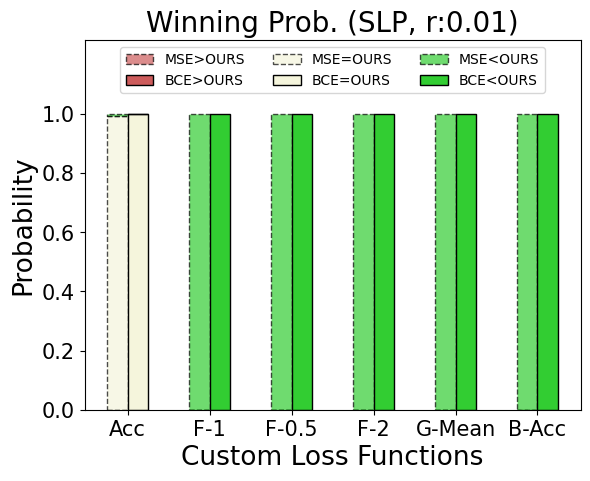

In [22]:
label = ['Acc','F-1','F-0.5','F-2','G-Mean','B-Acc']
index = np.arange(len(label))
bar_width = 0.25
a1 = 0.7
a2 = 1.0
c1 = "black"
c2 = "black"

MSE_win = results[results["Baseline"]=='MSE']['Basewin_prob']
MSE_draw = results[results["Baseline"]=='MSE']['Draw_prob']
MSE_lose = results[results["Baseline"]=='MSE']['Ourswin_prob']
BCE_win = results[results["Baseline"]=='BCE']['Basewin_prob']
BCE_draw = results[results["Baseline"]=='BCE']['Draw_prob']
BCE_lose = results[results["Baseline"]=='BCE']['Ourswin_prob']

# MSE
p1 = plt.bar(index-bar_width*0.5, MSE_win, bar_width, alpha = a1, color="indianred", label="MSE>OURS", edgecolor=c1, ls='--')
p2 = plt.bar(index-bar_width*0.5, MSE_draw, bar_width, alpha = a1, color="beige", bottom=MSE_win, label="MSE=OURS", edgecolor=c1, ls='--')
p3 = plt.bar(index-bar_width*0.5, MSE_lose, bar_width, alpha = a1, color="limegreen", bottom=MSE_win+MSE_draw, label="MSE<OURS", edgecolor=c1, ls='--')
# Lable
plt.bar(label, 0, 0)
# BCE
p4 = plt.bar(index+bar_width*0.5, BCE_win, bar_width, alpha = a2, color="indianred", label="BCE>OURS", edgecolor=c2)
p5 = plt.bar(index+bar_width*0.5, BCE_draw, bar_width, alpha = a2, color="beige", bottom=BCE_win, label="BCE=OURS", edgecolor=c2)
p6 = plt.bar(index+bar_width*0.5, BCE_lose, bar_width, alpha = a2, color="limegreen", bottom=BCE_win+BCE_draw, label="BCE<OURS", edgecolor=c2)

plt.ylim(0.0 ,1.25)
plt.yticks(np.arange(0, 1.1, 0.2))
plt.legend(ncol=3, fontsize=10, loc='upper center', handles=(p1,p4,p2,p5,p3,p6),)
plt.title("Winning Prob. (SLP, r:0.01)")
plt.xlabel("Custom Loss Functions")
plt.ylabel("Probability")
plt.show()

In [23]:
results

Baseline    Ours  Basewin_prob  Draw_prob  Ourswin_prob
0       MSE  AccAim           0.0    0.99488       0.00512
1       BCE  AccAim           0.0    1.00000       0.00000
2       MSE   F1Aim           0.0    0.00000       1.00000
3       BCE   F1Aim           0.0    0.00000       1.00000
4       MSE  F.5Aim           0.0    0.00000       1.00000
5       BCE  F.5Aim           0.0    0.00002       0.99998
6       MSE   F2Aim           0.0    0.00000       1.00000
7       BCE   F2Aim           0.0    0.00000       1.00000
8       MSE    GAim           0.0    0.00000       1.00000
9       BCE    GAim           0.0    0.00000       1.00000
10      MSE    BAim           0.0    0.00000       1.00000
11      BCE    BAim           0.0    0.00002       0.99998

In [24]:
results = results[results.Ours.isin(["AccAim", "F1Aim", "BAim"])]
results

Baseline    Ours  Basewin_prob  Draw_prob  Ourswin_prob
0       MSE  AccAim           0.0    0.99488       0.00512
1       BCE  AccAim           0.0    1.00000       0.00000
2       MSE   F1Aim           0.0    0.00000       1.00000
3       BCE   F1Aim           0.0    0.00000       1.00000
10      MSE    BAim           0.0    0.00000       1.00000
11      BCE    BAim           0.0    0.00002       0.99998

In [25]:
plt.rcParams["figure.dpi"] = 100
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 20
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)


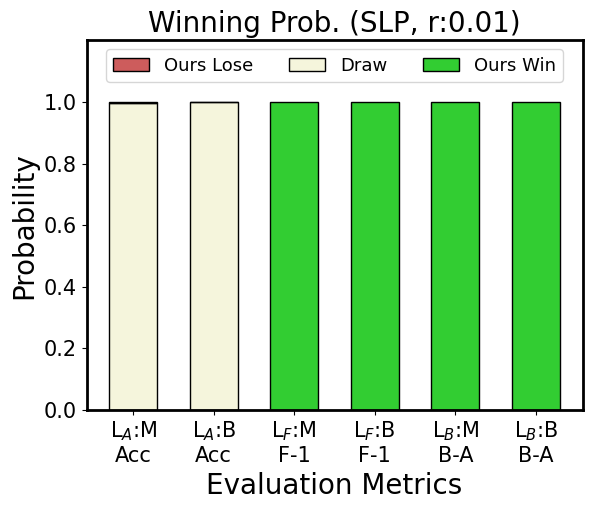

In [26]:


label = ['L$_{A}$:M\nAcc','L$_{A}$:B\nAcc','L$_{F}$:M\nF-1','L$_{F}$:B\nF-1',
         'L$_{B}$:M\nB-A','L$_{B}$:B\nB-A']
index = np.arange(len(label))
bar_width = 0.6
a1 = 0.7
a2 = 1.0
c1 = "black"
c2 = "black"

lose = results['Basewin_prob']
draw = results['Draw_prob']
win = results['Ourswin_prob']

# OURS lose
p1 = plt.bar(index, lose, bar_width, color="indianred", label="Ours Lose", edgecolor=c1)

# OURS draw
p2 = plt.bar(index, draw, bar_width, color="beige", bottom=lose, label="Draw", edgecolor=c1)

# OURS win
p3 = plt.bar(index, win, bar_width, color="limegreen", bottom=lose+draw, label="Ours Win", edgecolor=c2)

plt.xticks(index, label)
plt.ylim(0.0 ,1.2)
plt.yticks(np.arange(0, 1.1, 0.2))
plt.legend(ncol=3, fontsize=13, loc='upper center', handles=(p1,p2,p3),)
plt.title("Winning Prob. (SLP, r:0.01)")
plt.xlabel("Evaluation Metrics")
plt.ylabel("Probability")
plt.show()

0
('MSE', 'AccAim')
P(MSE > AccAim) = 0.0, P(rope) = 1.0, P(AccAim > MSE) = 0.0
0.0 1.0 0.0


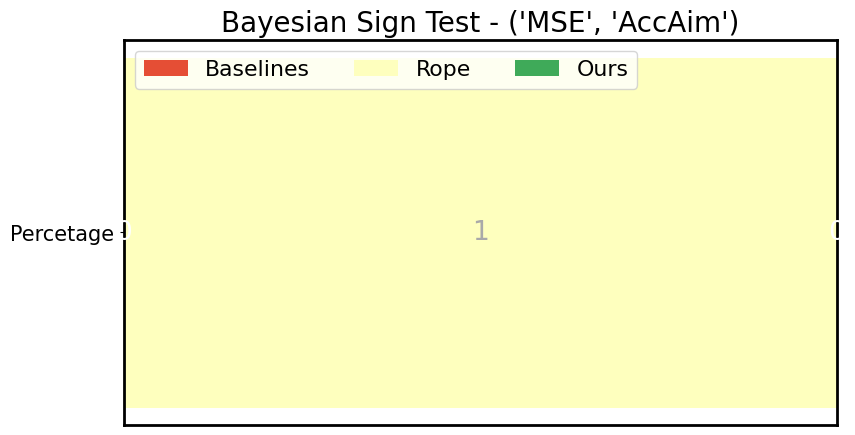

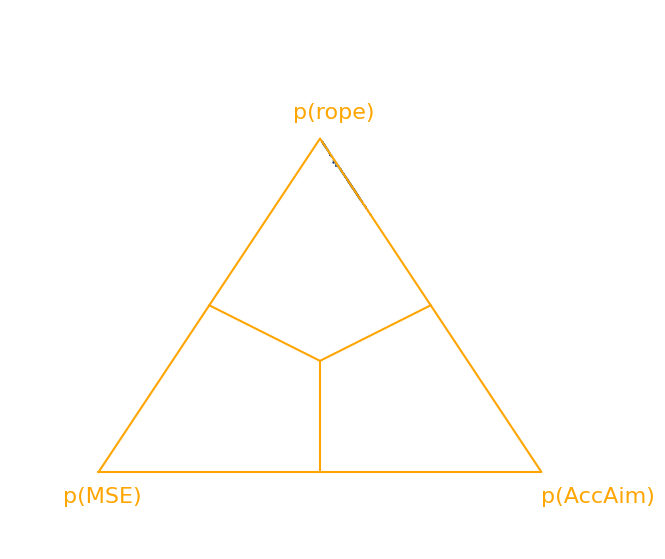

1
('BCE', 'AccAim')
P(BCE > AccAim) = 0.0, P(rope) = 1.0, P(AccAim > BCE) = 0.0
0.0 1.0 0.0


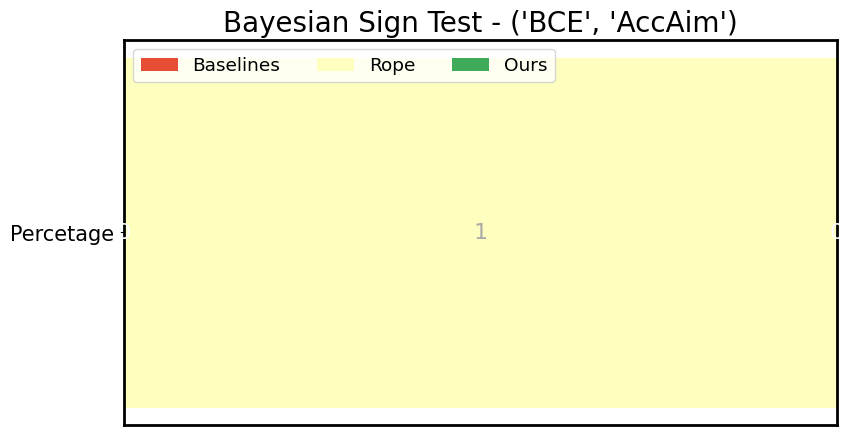

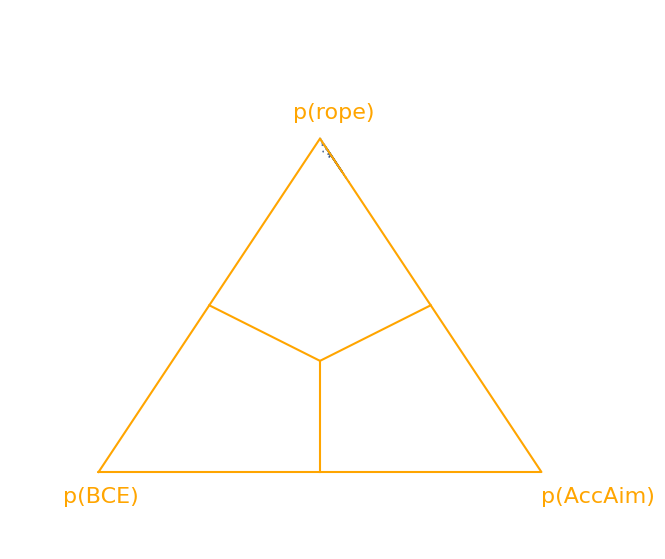

2
('MSE', 'F1Aim')
P(MSE > F1Aim) = 0.0, P(rope) = 0.00102, P(F1Aim > MSE) = 0.99898
0.0 0.00102 0.99898


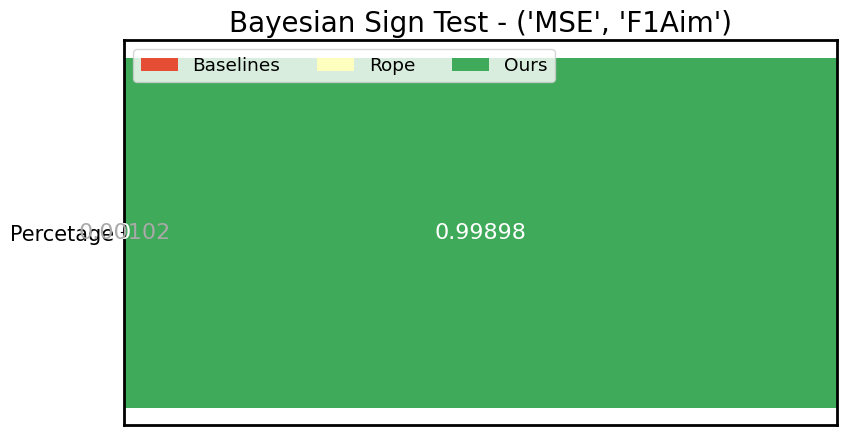

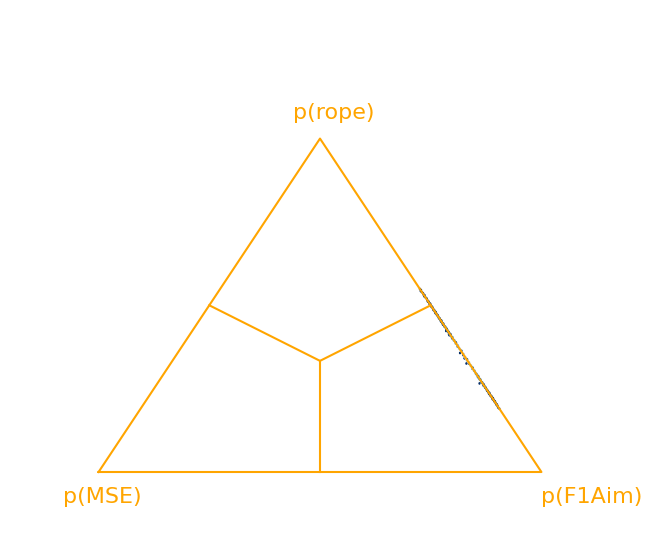

3
('BCE', 'F1Aim')
P(BCE > F1Aim) = 0.0, P(rope) = 0.24238, P(F1Aim > BCE) = 0.75762
0.0 0.24238 0.75762


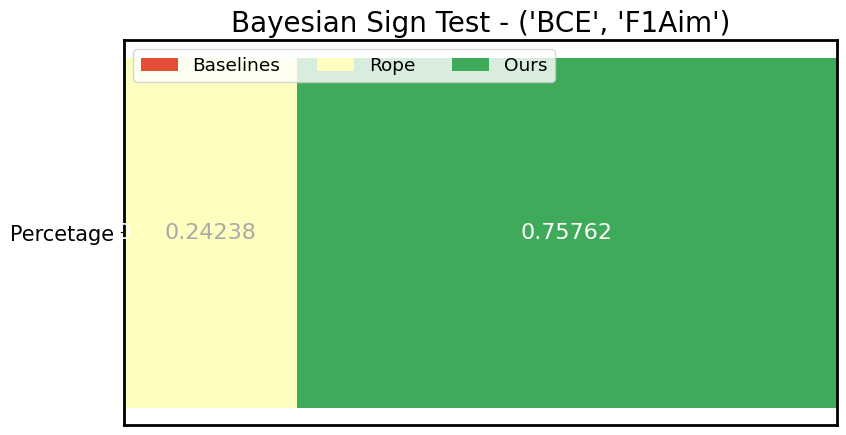

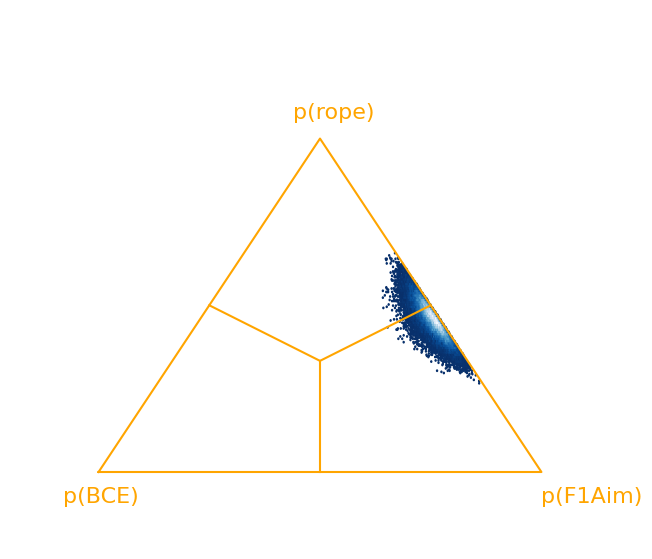

4
('MSE', 'F.5Aim')
P(MSE > F.5Aim) = 0.0, P(rope) = 0.27364, P(F.5Aim > MSE) = 0.72636
0.0 0.27364 0.72636


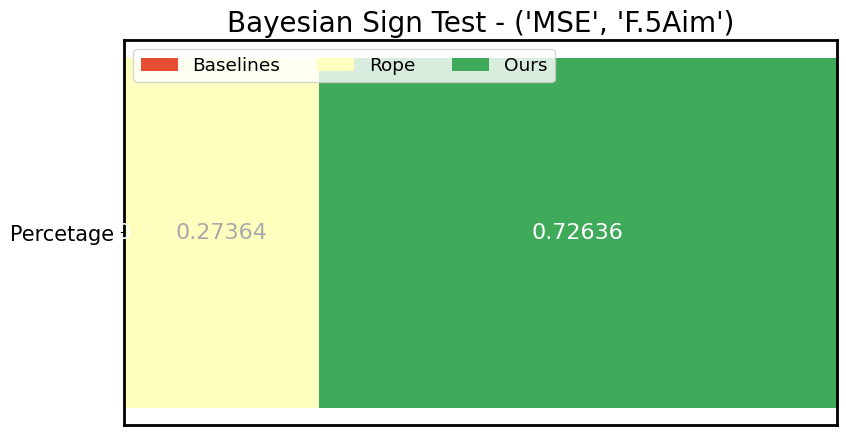

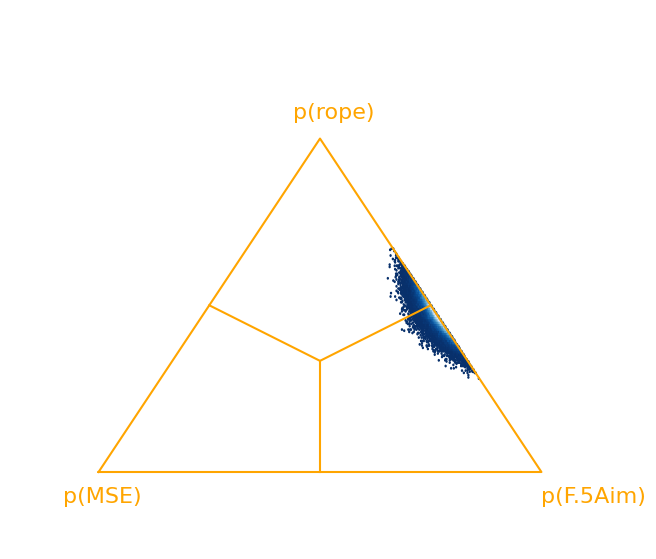

5
('BCE', 'F.5Aim')
P(BCE > F.5Aim) = 0.0, P(rope) = 0.99812, P(F.5Aim > BCE) = 0.00188
0.0 0.99812 0.00188


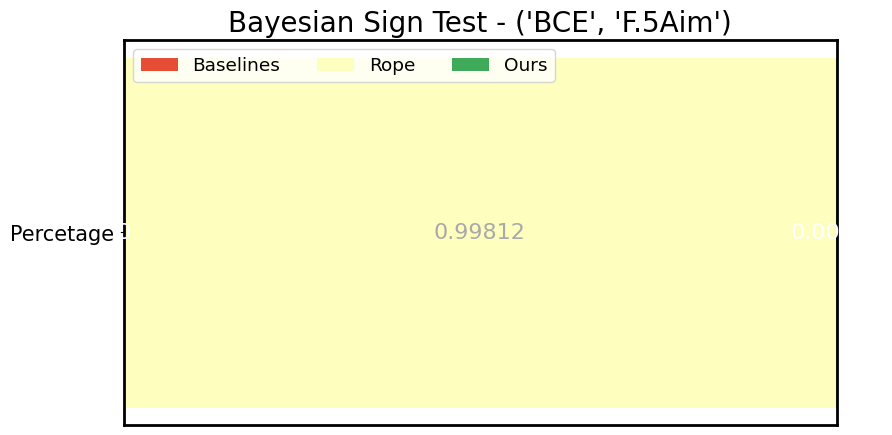

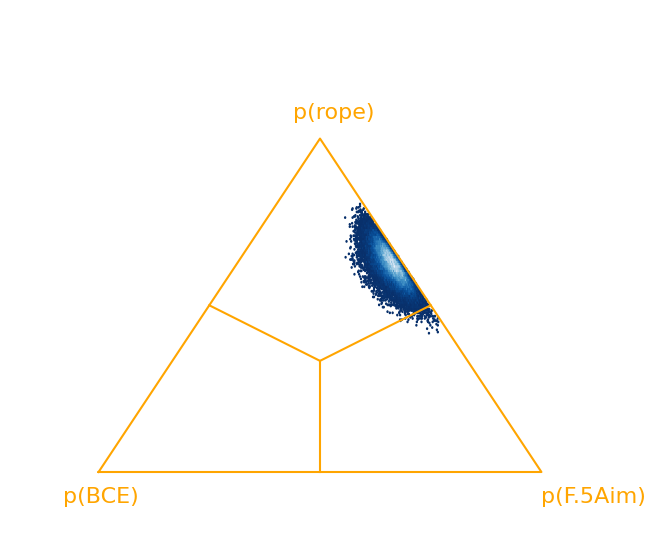

6
('MSE', 'F2Aim')
P(MSE > F2Aim) = 0.0, P(rope) = 0.0, P(F2Aim > MSE) = 1.0
0.0 0.0 1.0


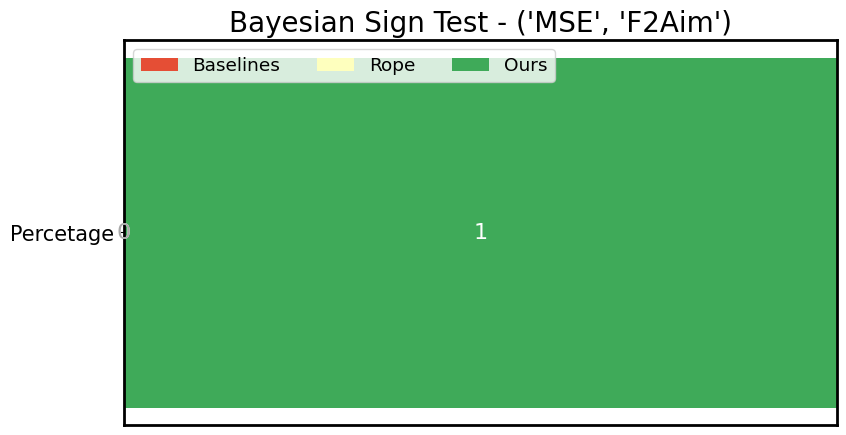

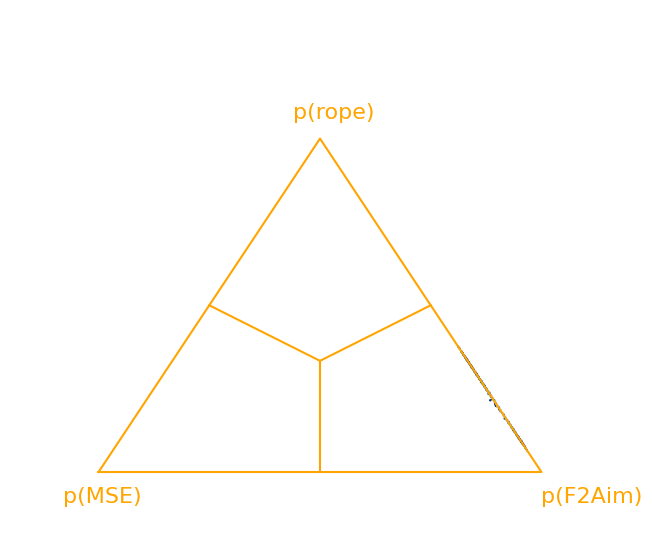

7
('BCE', 'F2Aim')
P(BCE > F2Aim) = 0.0, P(rope) = 2e-05, P(F2Aim > BCE) = 0.99998
0.0 2e-05 0.99998


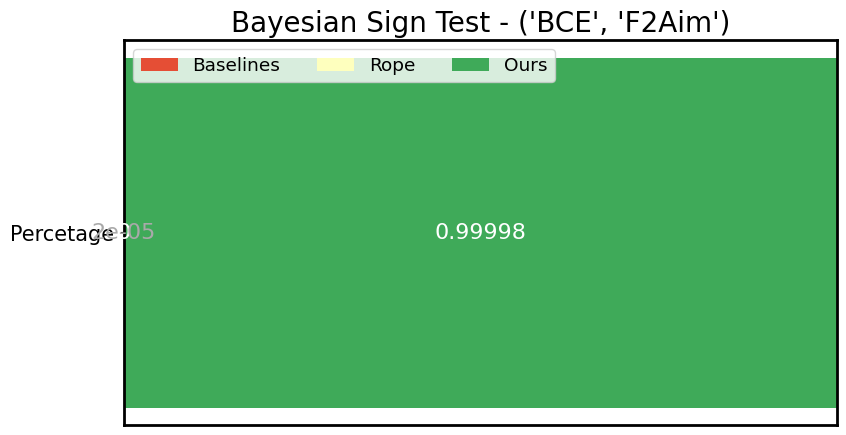

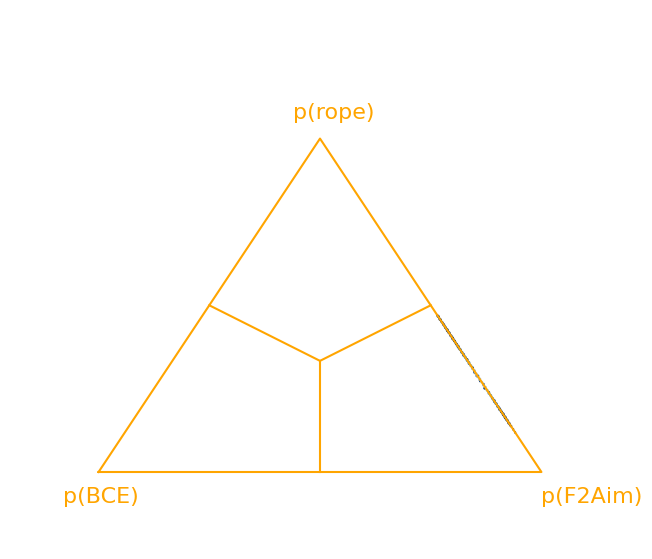

8
('MSE', 'GAim')
P(MSE > GAim) = 0.0, P(rope) = 0.00012, P(GAim > MSE) = 0.99988
0.0 0.00012 0.99988


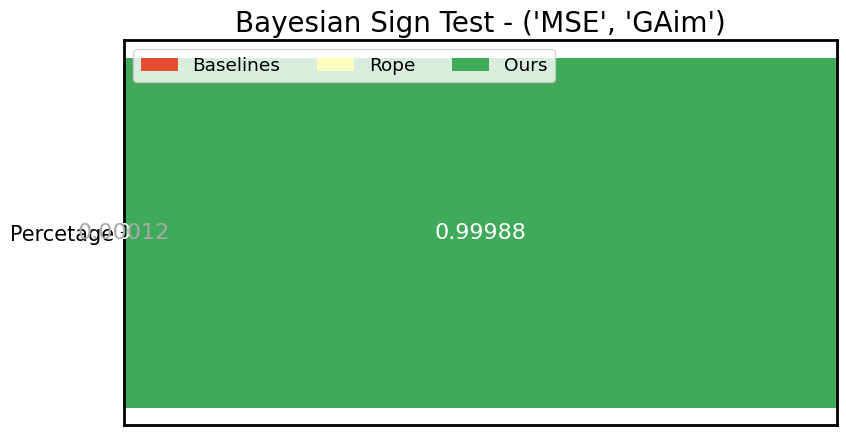

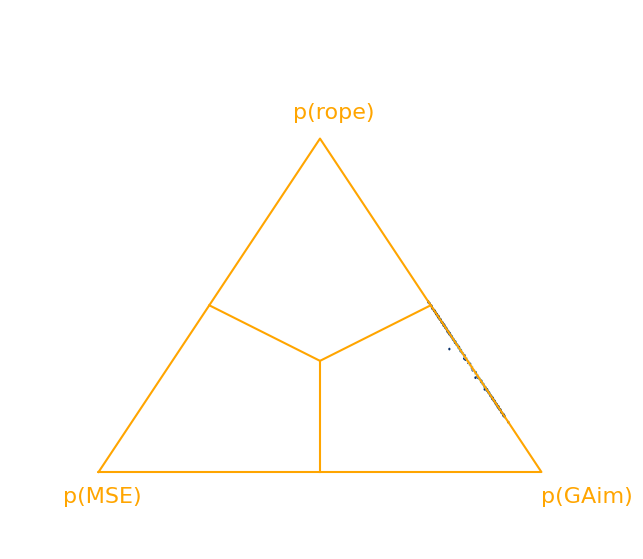

9
('BCE', 'GAim')
P(BCE > GAim) = 0.0, P(rope) = 0.06826, P(GAim > BCE) = 0.93174
0.0 0.06826 0.93174


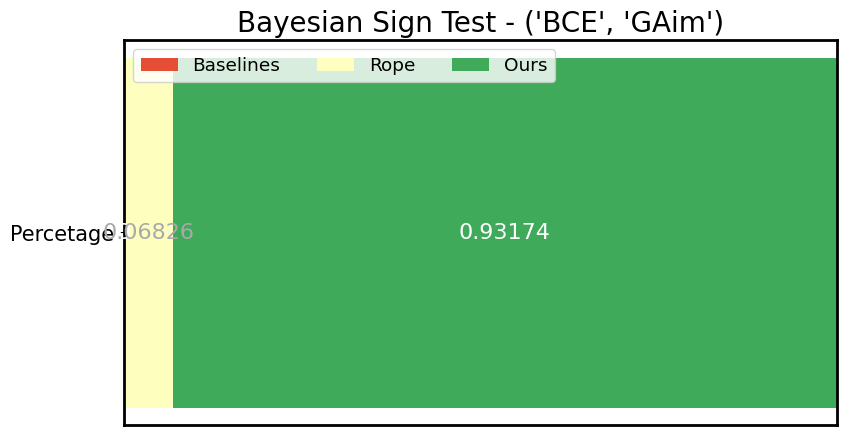

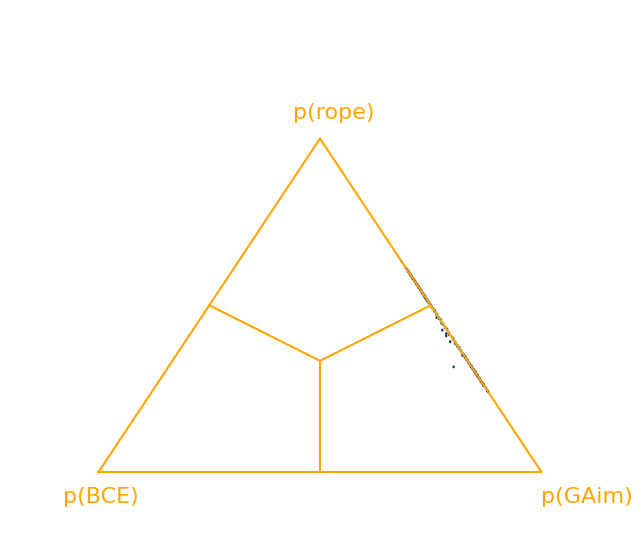

10
('MSE', 'BAim')
P(MSE > BAim) = 0.0, P(rope) = 0.06844, P(BAim > MSE) = 0.93156
0.0 0.06844 0.93156


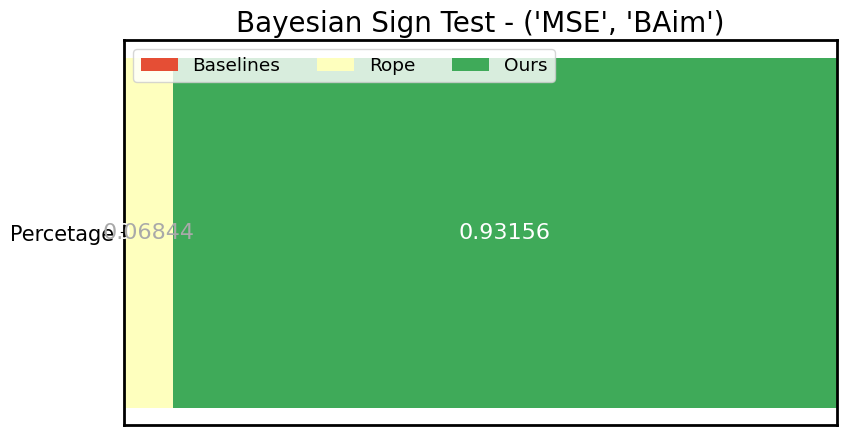

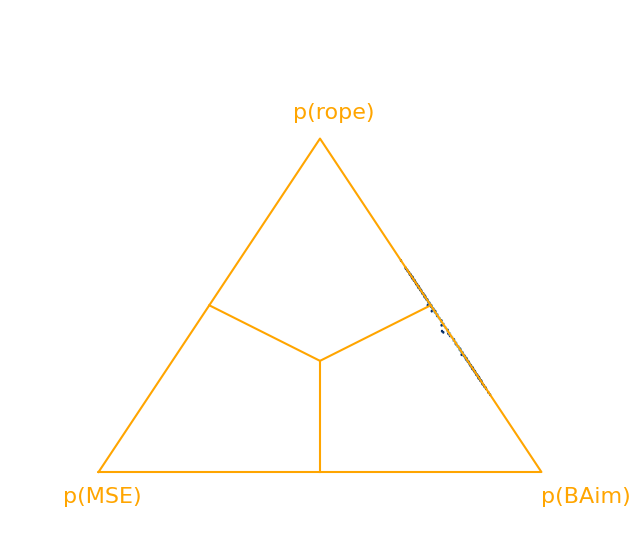

11
('BCE', 'BAim')
P(BCE > BAim) = 0.0, P(rope) = 0.86306, P(BAim > BCE) = 0.13694
0.0 0.86306 0.13694


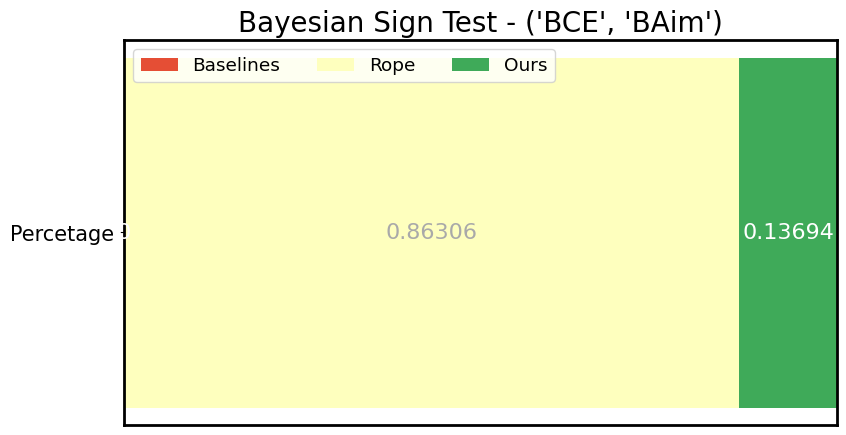

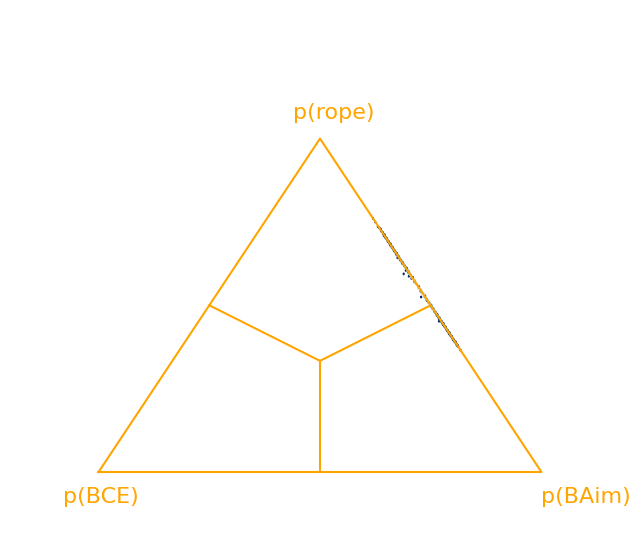

In [27]:
comp = []
basewin = []
draw = []
ourswin = []
z = 0
for i in range(len(ours)):
    for j in range(len(baselines)):
        print(z)
        names = (baselines[j],ours[i])
        print(names)
        comp.append(names)
        X = np.array(dfs[i][[baselines[j],ours[i]]])
        left, within, right = bt.signtest(X, rope=0.05, verbose=True, names=names)
        print(left, within, right)
        basewin.append(left)
        draw.append(within)
        ourswin.append(right)
        stacked_bar({"Percetage": [left, within, right]}, ["Baselines", "Rope", "Ours"])
        plt.title("Bayesian Sign Test - {}".format(names))
        z +=1

        %matplotlib inline
        samples = bt.signtest_MC(X, rope=0.05)
        fig = bt.plot_posterior(samples,names)
        plt.savefig('triangle.png',facecolor="black")
        plt.show()

In [28]:
print(comp)
print(basewin)
print(draw)
print(ourswin)

[('MSE', 'AccAim'), ('BCE', 'AccAim'), ('MSE', 'F1Aim'), ('BCE', 'F1Aim'), ('MSE', 'F.5Aim'), ('BCE', 'F.5Aim'), ('MSE', 'F2Aim'), ('BCE', 'F2Aim'), ('MSE', 'GAim'), ('BCE', 'GAim'), ('MSE', 'BAim'), ('BCE', 'BAim')]
[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
[np.float64(1.0), np.float64(1.0), np.float64(0.00102), np.float64(0.24238), np.float64(0.27364), np.float64(0.99812), np.float64(0.0), np.float64(2e-05), np.float64(0.00012), np.float64(0.06826), np.float64(0.06844), np.float64(0.86306)]
[np.float64(0.0), np.float64(0.0), np.float64(0.99898), np.float64(0.75762), np.float64(0.72636), np.float64(0.00188), np.float64(1.0), np.float64(0.99998), np.float64(0.99988), np.float64(0.93174), np.float64(0.93156), np.float64(0.13694)]


In [29]:
# r = 0.05
results = pd.DataFrame(comp, columns = ["Baseline","Ours"])
results["Basewin_prob"] = basewin
results["Draw_prob"] = draw
results["Ourswin_prob"] = ourswin
results

Baseline    Ours  Basewin_prob  Draw_prob  Ourswin_prob
0       MSE  AccAim           0.0    1.00000       0.00000
1       BCE  AccAim           0.0    1.00000       0.00000
2       MSE   F1Aim           0.0    0.00102       0.99898
3       BCE   F1Aim           0.0    0.24238       0.75762
4       MSE  F.5Aim           0.0    0.27364       0.72636
5       BCE  F.5Aim           0.0    0.99812       0.00188
6       MSE   F2Aim           0.0    0.00000       1.00000
7       BCE   F2Aim           0.0    0.00002       0.99998
8       MSE    GAim           0.0    0.00012       0.99988
9       BCE    GAim           0.0    0.06826       0.93174
10      MSE    BAim           0.0    0.06844       0.93156
11      BCE    BAim           0.0    0.86306       0.13694

In [30]:
plt.rcParams["figure.dpi"] = 100
plt.rcParams['axes.titlesize'] = 20

plt.rcParams['font.size'] = 19
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

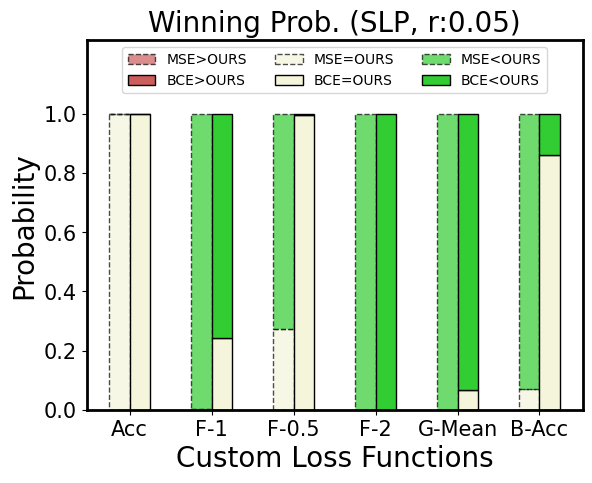

In [31]:
label = ['Acc','F-1','F-0.5','F-2','G-Mean','B-Acc']
index = np.arange(len(label))
bar_width = 0.25
a1 = 0.7
a2 = 1.0
c1 = "black"
c2 = "black"

MSE_win = results[results["Baseline"]=='MSE']['Basewin_prob']
MSE_draw = results[results["Baseline"]=='MSE']['Draw_prob']
MSE_lose = results[results["Baseline"]=='MSE']['Ourswin_prob']
BCE_win = results[results["Baseline"]=='BCE']['Basewin_prob']
BCE_draw = results[results["Baseline"]=='BCE']['Draw_prob']
BCE_lose = results[results["Baseline"]=='BCE']['Ourswin_prob']

# MSE
p1 = plt.bar(index-bar_width*0.5, MSE_win, bar_width, alpha = a1, color="indianred", label="MSE>OURS", edgecolor=c1, ls='--')
p2 = plt.bar(index-bar_width*0.5, MSE_draw, bar_width, alpha = a1, color="beige", bottom=MSE_win, label="MSE=OURS", edgecolor=c1, ls='--')
p3 = plt.bar(index-bar_width*0.5, MSE_lose, bar_width, alpha = a1, color="limegreen", bottom=MSE_win+MSE_draw, label="MSE<OURS", edgecolor=c1, ls='--')
# Lable
plt.bar(label, 0, 0)
# BCE
p4 = plt.bar(index+bar_width*0.5, BCE_win, bar_width, alpha = a2, color="indianred", label="BCE>OURS", edgecolor=c2)
p5 = plt.bar(index+bar_width*0.5, BCE_draw, bar_width, alpha = a2, color="beige", bottom=BCE_win, label="BCE=OURS", edgecolor=c2)
p6 = plt.bar(index+bar_width*0.5, BCE_lose, bar_width, alpha = a2, color="limegreen", bottom=BCE_win+BCE_draw, label="BCE<OURS", edgecolor=c2)

plt.ylim(0.0 ,1.25)
plt.yticks(np.arange(0, 1.1, 0.2))
plt.legend(ncol=3, fontsize=10, loc='upper center', handles=(p1,p4,p2,p5,p3,p6),)
plt.title("Winning Prob. (SLP, r:0.05)")
plt.xlabel("Custom Loss Functions")
plt.ylabel("Probability")
plt.show()

In [32]:
results = results[results.Ours.isin(["AccAim", "F1Aim", "BAim"])]
results

Baseline    Ours  Basewin_prob  Draw_prob  Ourswin_prob
0       MSE  AccAim           0.0    1.00000       0.00000
1       BCE  AccAim           0.0    1.00000       0.00000
2       MSE   F1Aim           0.0    0.00102       0.99898
3       BCE   F1Aim           0.0    0.24238       0.75762
10      MSE    BAim           0.0    0.06844       0.93156
11      BCE    BAim           0.0    0.86306       0.13694

In [33]:
plt.rcParams["figure.dpi"] = 100
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 20
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)


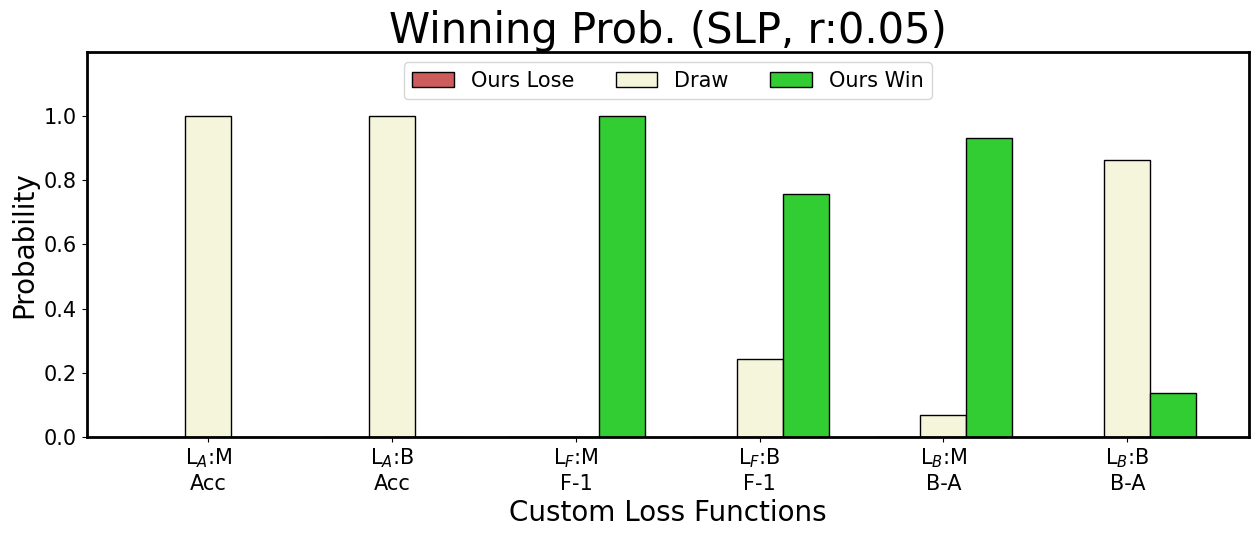

In [34]:
plt.figure(figsize=(15, 5))

label = ['L$_{A}$:M\nAcc','L$_{A}$:B\nAcc','L$_{F}$:M\nF-1','L$_{F}$:B\nF-1',
         'L$_{B}$:M\nB-A','L$_{B}$:B\nB-A']
index = np.arange(len(label))
bar_width = 0.25
a1 = 0.7
a2 = 1.0
c1 = "black"
c2 = "black"

lose = results['Basewin_prob']
draw = results['Draw_prob']
win = results['Ourswin_prob']

# OURS lose
p1 = plt.bar(index-bar_width*1, lose, bar_width, color="indianred", label="Ours Lose", edgecolor=c1)

# OURS draw
p2 = plt.bar(index, draw, bar_width, color="beige", label="Draw", edgecolor=c1)

# OURS win
p3 = plt.bar(index+bar_width*1, win, bar_width, color="limegreen", label="Ours Win", edgecolor=c2)

plt.xticks(index, label)
plt.ylim(0.0 ,1.2)
plt.yticks(np.arange(0, 1.1, 0.2))
plt.legend(ncol=3, fontsize=15, loc='upper center', handles=(p1,p2,p3),)
plt.title("Winning Prob. (SLP, r:0.05)")
plt.xlabel("Custom Loss Functions")
plt.ylabel("Probability")
plt.show()

In [35]:
plt.rcParams["figure.dpi"] = 100
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 20
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)


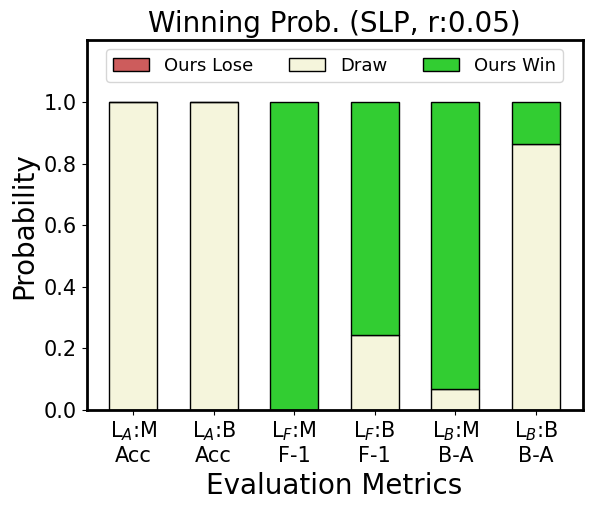

In [36]:

label = ['L$_{A}$:M\nAcc','L$_{A}$:B\nAcc','L$_{F}$:M\nF-1','L$_{F}$:B\nF-1',
         'L$_{B}$:M\nB-A','L$_{B}$:B\nB-A']
index = np.arange(len(label))
bar_width = 0.6
a1 = 0.7
a2 = 1.0
c1 = "black"
c2 = "black"

lose = results['Basewin_prob']
draw = results['Draw_prob']
win = results['Ourswin_prob']

# OURS lose
p1 = plt.bar(index, lose, bar_width, color="indianred", label="Ours Lose", edgecolor=c1)

# OURS draw
p2 = plt.bar(index, draw, bar_width, color="beige", bottom=lose, label="Draw", edgecolor=c1)

# OURS win
p3 = plt.bar(index, win, bar_width, color="limegreen", bottom=lose+draw, label="Ours Win", edgecolor=c2)

plt.xticks(index, label)
plt.ylim(0.0 ,1.2)
plt.yticks(np.arange(0, 1.1, 0.2))
plt.legend(ncol=3, fontsize=13, loc='upper center', handles=(p1,p2,p3),)
plt.title("Winning Prob. (SLP, r:0.05)")
plt.xlabel("Evaluation Metrics")
plt.ylabel("Probability")
plt.show()

0
('MSE', 'AccAim')
P(MSE > AccAim) = 0.0, P(rope) = 1.0, P(AccAim > MSE) = 0.0
0.0 1.0 0.0


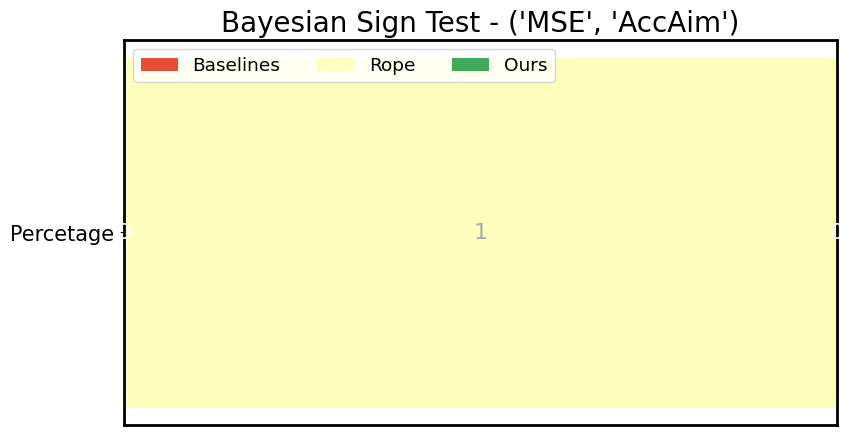

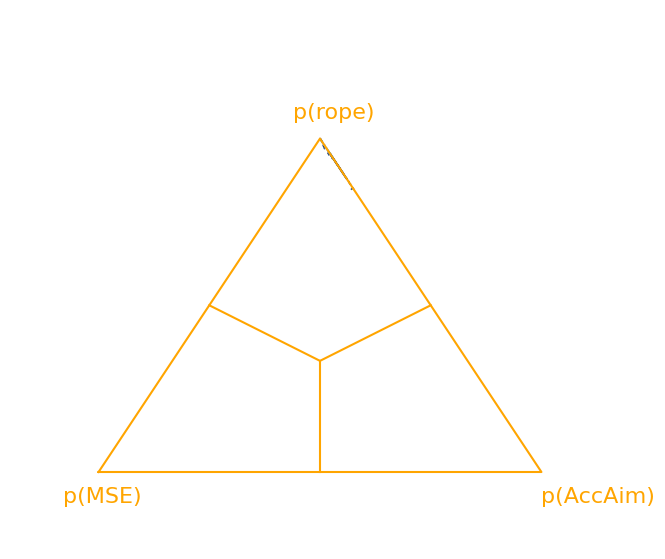

1
('BCE', 'AccAim')
P(BCE > AccAim) = 0.0, P(rope) = 1.0, P(AccAim > BCE) = 0.0
0.0 1.0 0.0


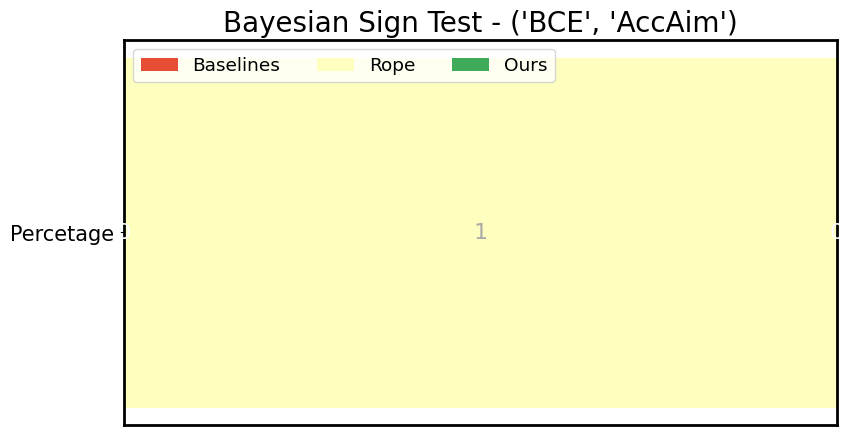

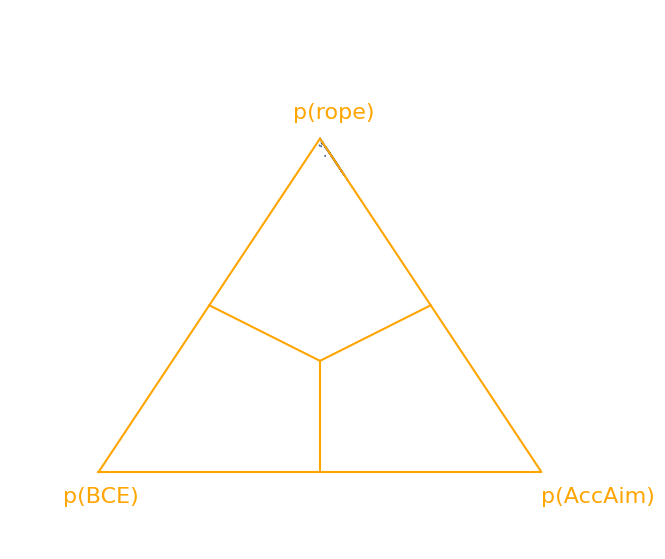

2
('MSE', 'F1Aim')
P(MSE > F1Aim) = 0.0, P(rope) = 0.1, P(F1Aim > MSE) = 0.9
0.0 0.1 0.9


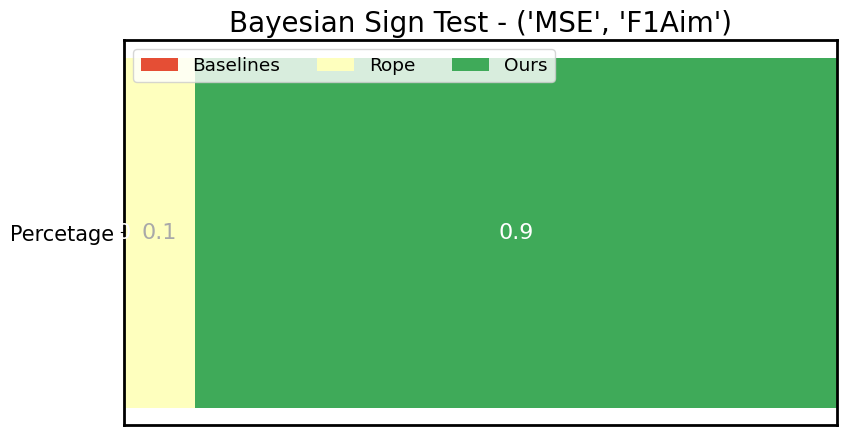

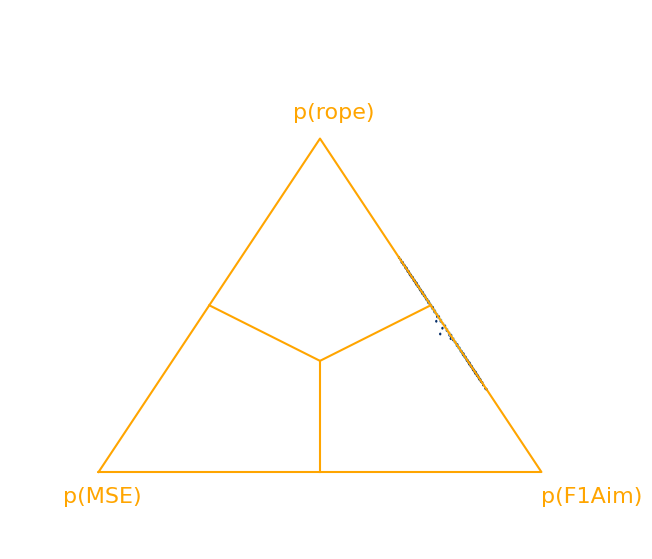

3
('BCE', 'F1Aim')
P(BCE > F1Aim) = 0.0, P(rope) = 0.9322, P(F1Aim > BCE) = 0.0678
0.0 0.9322 0.0678


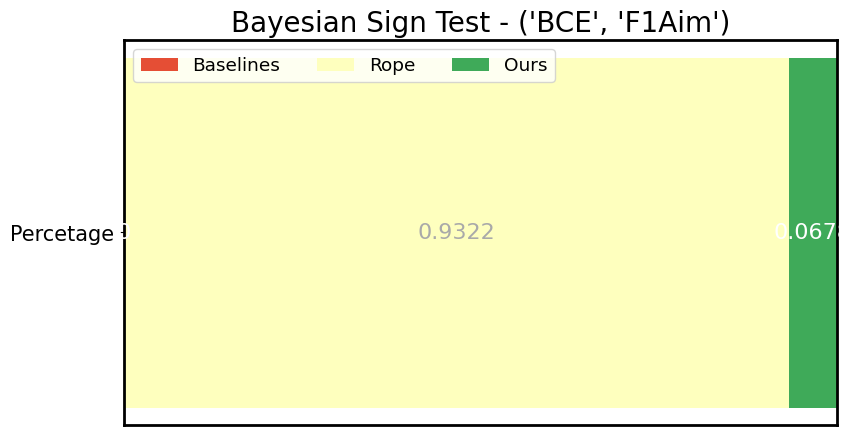

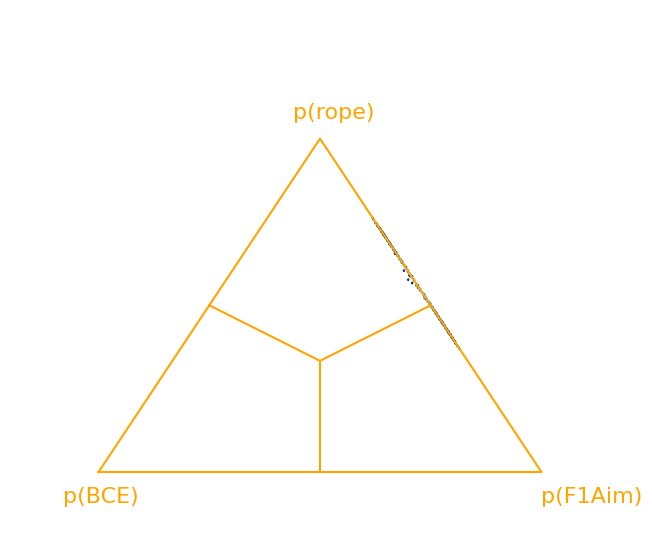

4
('MSE', 'F.5Aim')
P(MSE > F.5Aim) = 0.0, P(rope) = 0.99344, P(F.5Aim > MSE) = 0.00656
0.0 0.99344 0.00656


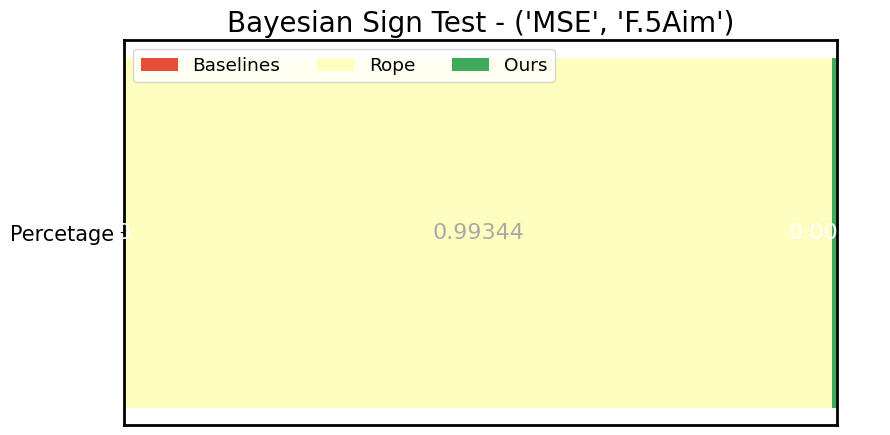

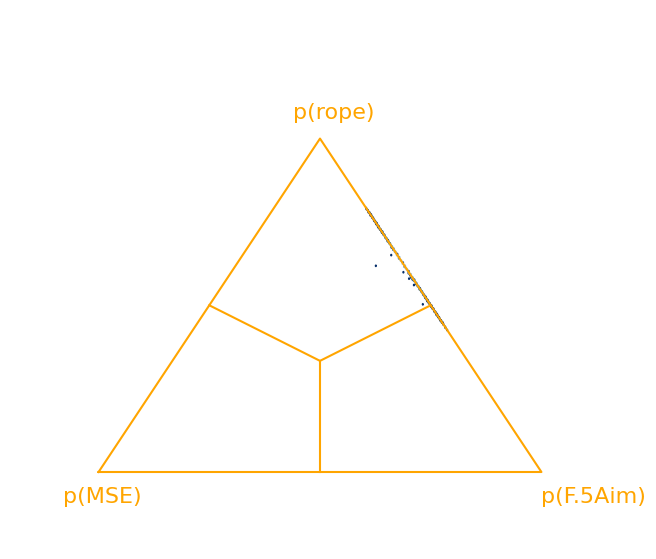

5
('BCE', 'F.5Aim')
P(BCE > F.5Aim) = 0.0, P(rope) = 1.0, P(F.5Aim > BCE) = 0.0
0.0 1.0 0.0


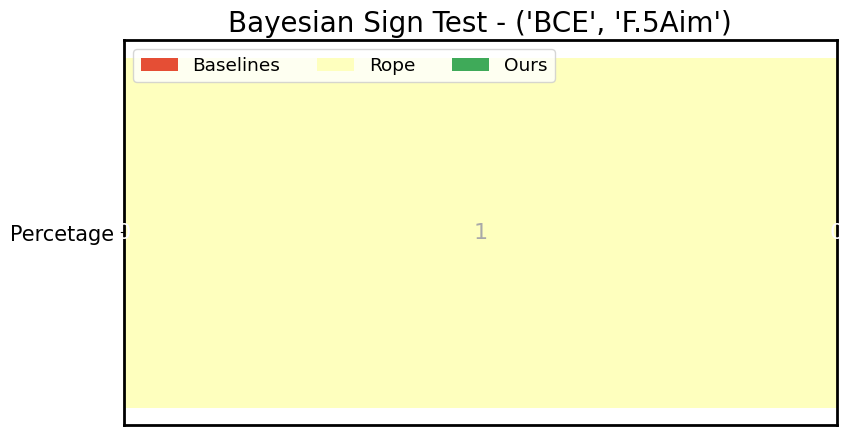

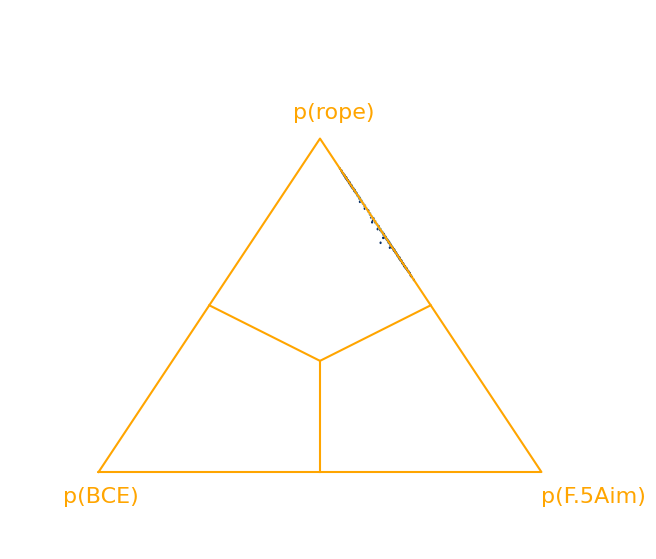

6
('MSE', 'F2Aim')
P(MSE > F2Aim) = 0.0, P(rope) = 0.0, P(F2Aim > MSE) = 1.0
0.0 0.0 1.0


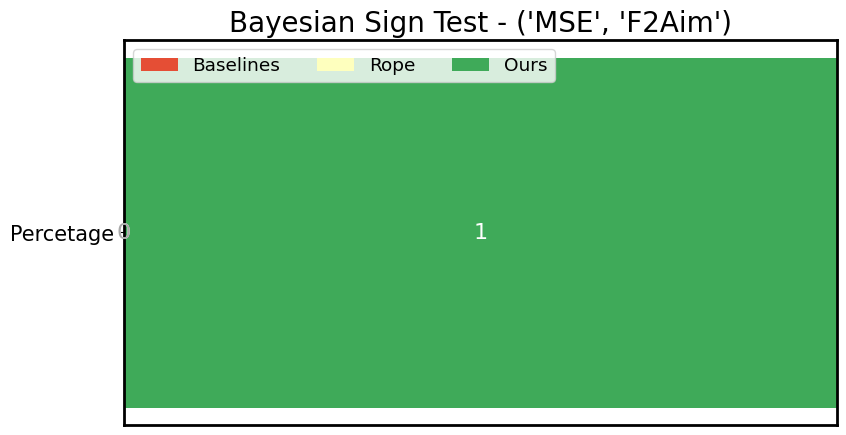

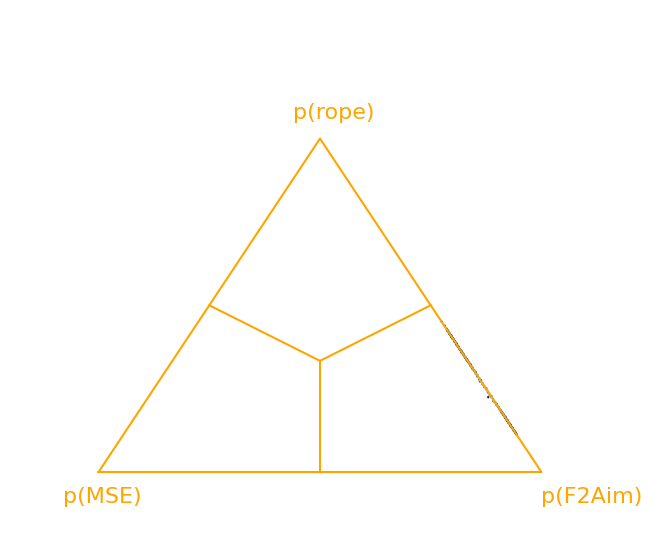

7
('BCE', 'F2Aim')
P(BCE > F2Aim) = 0.0, P(rope) = 0.04566, P(F2Aim > BCE) = 0.95434
0.0 0.04566 0.95434


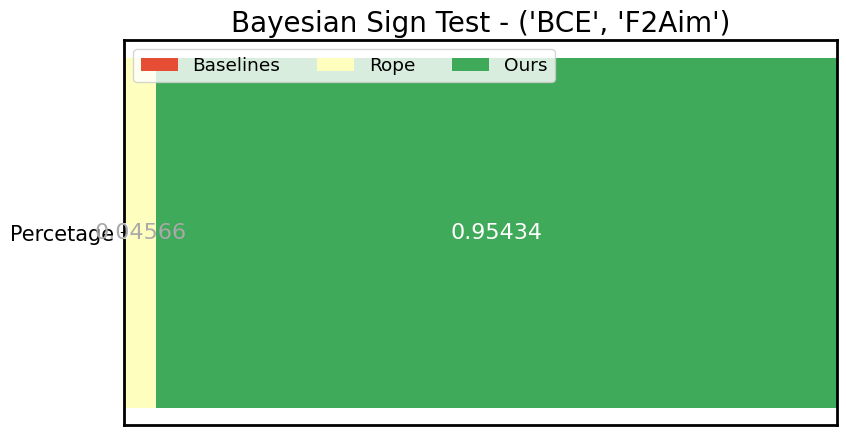

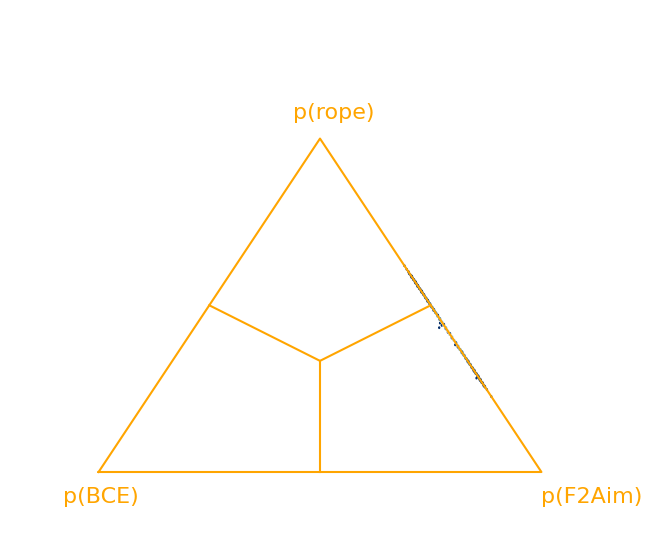

8
('MSE', 'GAim')
P(MSE > GAim) = 0.0, P(rope) = 0.06834, P(GAim > MSE) = 0.93166
0.0 0.06834 0.93166


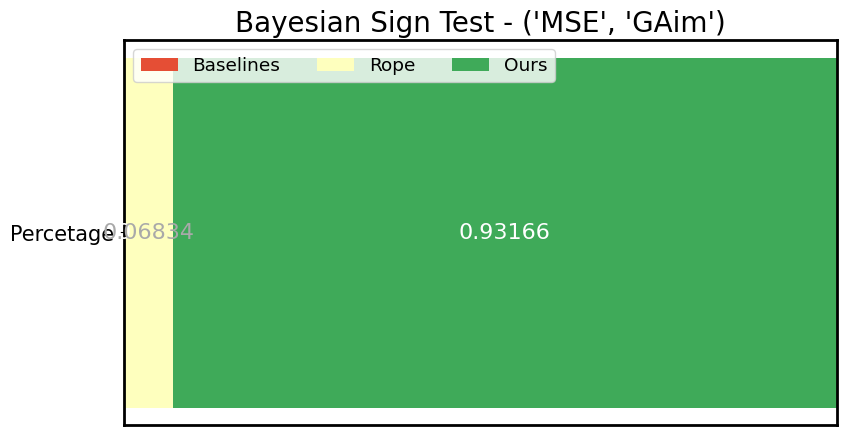

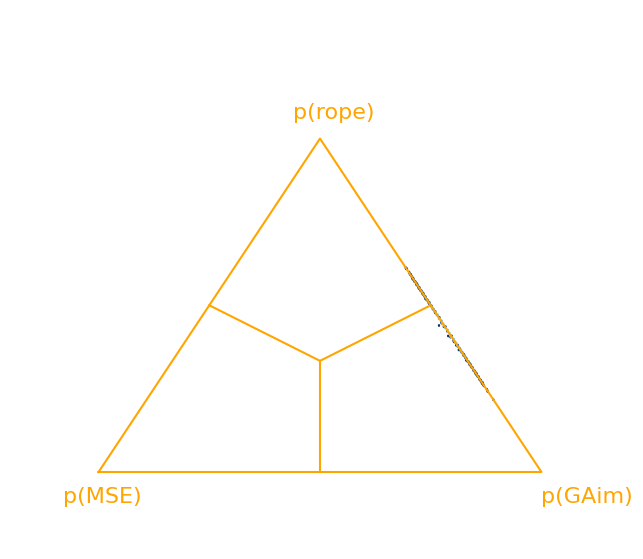

9
('BCE', 'GAim')
P(BCE > GAim) = 0.0, P(rope) = 0.53796, P(GAim > BCE) = 0.46204
0.0 0.53796 0.46204


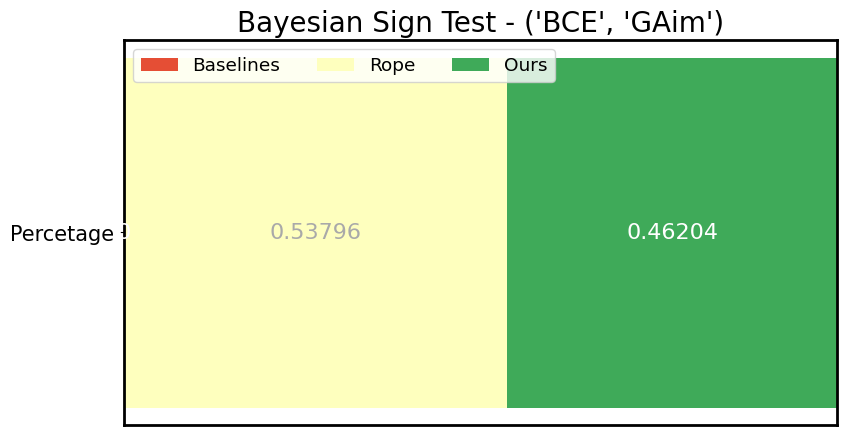

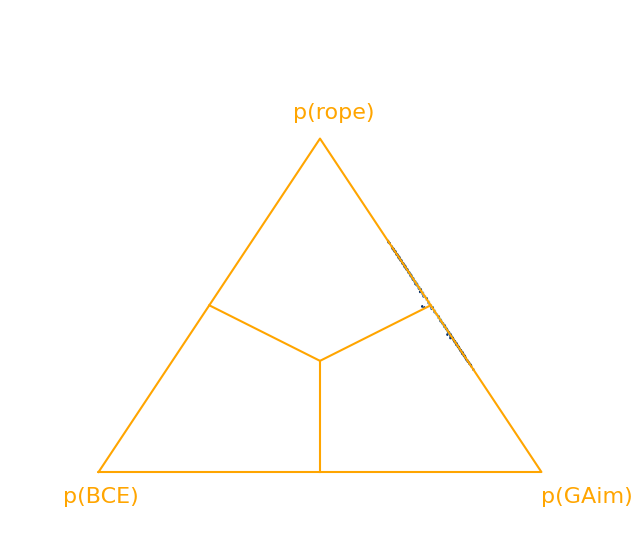

10
('MSE', 'BAim')
P(MSE > BAim) = 0.0, P(rope) = 0.6856, P(BAim > MSE) = 0.3144
0.0 0.6856 0.3144


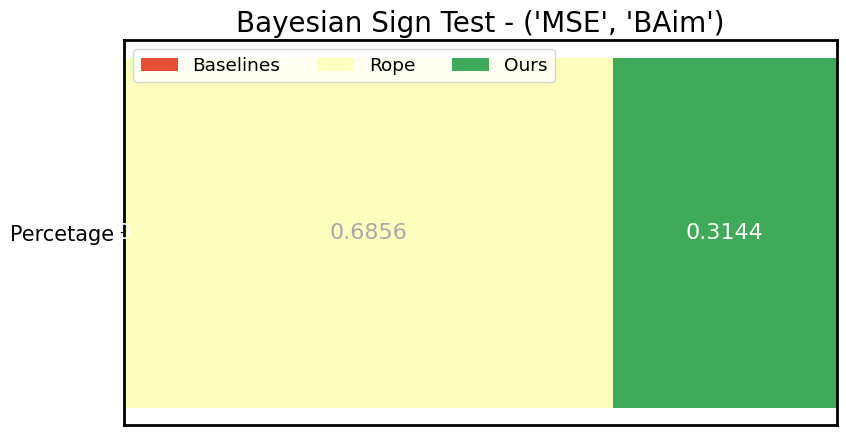

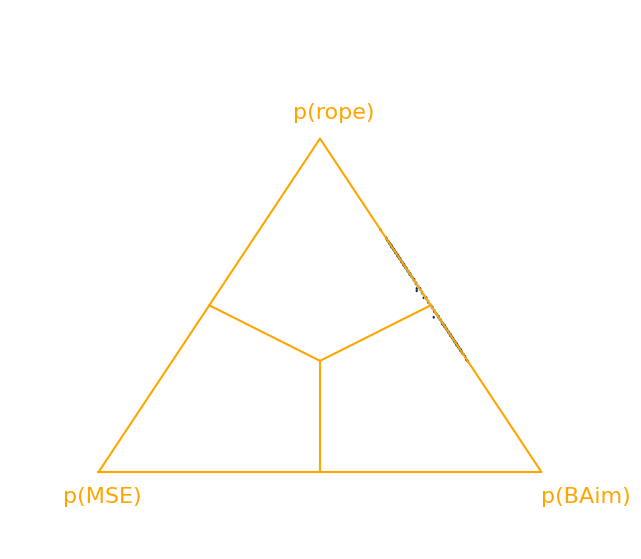

11
('BCE', 'BAim')
P(BCE > BAim) = 0.0, P(rope) = 0.99958, P(BAim > BCE) = 0.00042
0.0 0.99958 0.00042


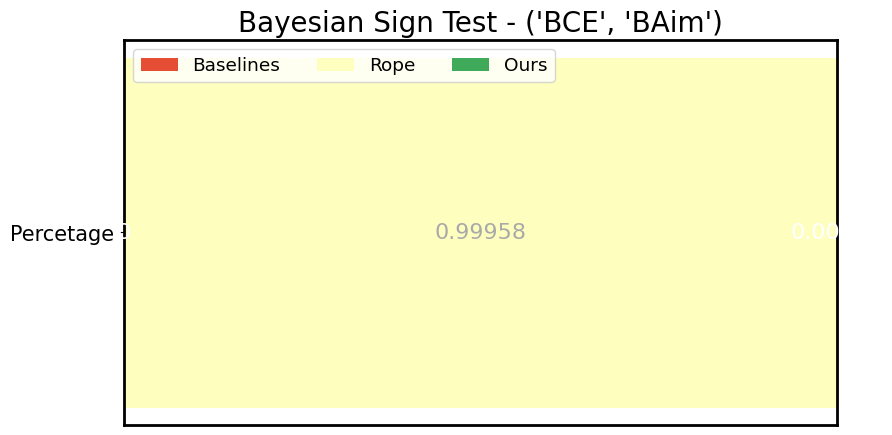

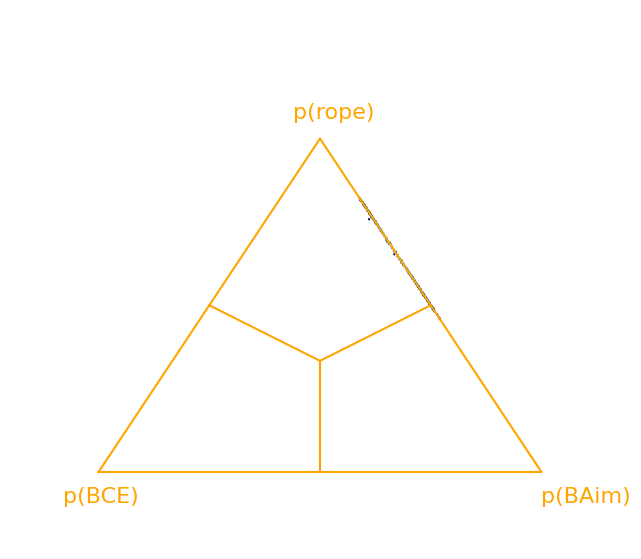

In [38]:
comp = []
basewin = []
draw = []
ourswin = []
z = 0
for i in range(len(ours)):
    for j in range(len(baselines)):
        print(z)
        names = (baselines[j],ours[i])
        print(names)
        comp.append(names)
        X = np.array(dfs[i][[baselines[j],ours[i]]])
        left, within, right = bt.signtest(X, rope=0.1, verbose=True, names=names)
        print(left, within, right)
        basewin.append(left)
        draw.append(within)
        ourswin.append(right)
        stacked_bar({"Percetage": [left, within, right]}, ["Baselines", "Rope", "Ours"])
        plt.title("Bayesian Sign Test - {}".format(names))
        z +=1

        %matplotlib inline
        samples = bt.signtest_MC(X, rope=0.1)
        fig = bt.plot_posterior(samples,names)
        plt.savefig('triangle.png',facecolor="black")
        plt.show()

In [39]:
print(comp)
print(basewin)
print(draw)
print(ourswin)

[('MSE', 'AccAim'), ('BCE', 'AccAim'), ('MSE', 'F1Aim'), ('BCE', 'F1Aim'), ('MSE', 'F.5Aim'), ('BCE', 'F.5Aim'), ('MSE', 'F2Aim'), ('BCE', 'F2Aim'), ('MSE', 'GAim'), ('BCE', 'GAim'), ('MSE', 'BAim'), ('BCE', 'BAim')]
[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
[np.float64(1.0), np.float64(1.0), np.float64(0.1), np.float64(0.9322), np.float64(0.99344), np.float64(1.0), np.float64(0.0), np.float64(0.04566), np.float64(0.06834), np.float64(0.53796), np.float64(0.6856), np.float64(0.99958)]
[np.float64(0.0), np.float64(0.0), np.float64(0.9), np.float64(0.0678), np.float64(0.00656), np.float64(0.0), np.float64(1.0), np.float64(0.95434), np.float64(0.93166), np.float64(0.46204), np.float64(0.3144), np.float64(0.00042)]


In [40]:
# r = 0.1
results = pd.DataFrame(comp, columns = ["Baseline","Ours"])
results["Basewin_prob"] = basewin
results["Draw_prob"] = draw
results["Ourswin_prob"] = ourswin
results

Baseline    Ours  Basewin_prob  Draw_prob  Ourswin_prob
0       MSE  AccAim           0.0    1.00000       0.00000
1       BCE  AccAim           0.0    1.00000       0.00000
2       MSE   F1Aim           0.0    0.10000       0.90000
3       BCE   F1Aim           0.0    0.93220       0.06780
4       MSE  F.5Aim           0.0    0.99344       0.00656
5       BCE  F.5Aim           0.0    1.00000       0.00000
6       MSE   F2Aim           0.0    0.00000       1.00000
7       BCE   F2Aim           0.0    0.04566       0.95434
8       MSE    GAim           0.0    0.06834       0.93166
9       BCE    GAim           0.0    0.53796       0.46204
10      MSE    BAim           0.0    0.68560       0.31440
11      BCE    BAim           0.0    0.99958       0.00042

In [41]:
plt.rcParams["figure.dpi"] = 100
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 19
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)


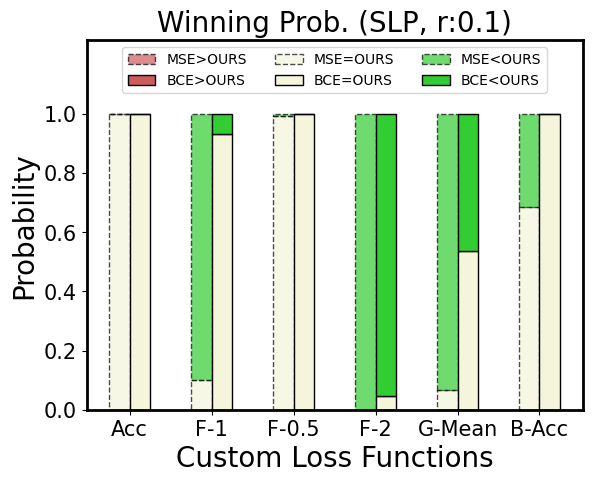

In [42]:
label = ['Acc','F-1','F-0.5','F-2','G-Mean','B-Acc']
index = np.arange(len(label))
bar_width = 0.25
a1 = 0.7
a2 = 1.0
c1 = "black"
c2 = "black"

MSE_win = results[results["Baseline"]=='MSE']['Basewin_prob']
MSE_draw = results[results["Baseline"]=='MSE']['Draw_prob']
MSE_lose = results[results["Baseline"]=='MSE']['Ourswin_prob']
BCE_win = results[results["Baseline"]=='BCE']['Basewin_prob']
BCE_draw = results[results["Baseline"]=='BCE']['Draw_prob']
BCE_lose = results[results["Baseline"]=='BCE']['Ourswin_prob']

# MSE
p1 = plt.bar(index-bar_width*0.5, MSE_win, bar_width, alpha = a1, color="indianred", label="MSE>OURS", edgecolor=c1, ls='--')
p2 = plt.bar(index-bar_width*0.5, MSE_draw, bar_width, alpha = a1, color="beige", bottom=MSE_win, label="MSE=OURS", edgecolor=c1, ls='--')
p3 = plt.bar(index-bar_width*0.5, MSE_lose, bar_width, alpha = a1, color="limegreen", bottom=MSE_win+MSE_draw, label="MSE<OURS", edgecolor=c1, ls='--')
# Lable
plt.bar(label, 0, 0)
# BCE
p4 = plt.bar(index+bar_width*0.5, BCE_win, bar_width, alpha = a2, color="indianred", label="BCE>OURS", edgecolor=c2)
p5 = plt.bar(index+bar_width*0.5, BCE_draw, bar_width, alpha = a2, color="beige", bottom=BCE_win, label="BCE=OURS", edgecolor=c2)
p6 = plt.bar(index+bar_width*0.5, BCE_lose, bar_width, alpha = a2, color="limegreen", bottom=BCE_win+BCE_draw, label="BCE<OURS", edgecolor=c2)

plt.ylim(0.0 ,1.25)
plt.yticks(np.arange(0, 1.1, 0.2))
plt.legend(ncol=3, fontsize=10, loc='upper center', handles=(p1,p4,p2,p5,p3,p6),)
plt.title("Winning Prob. (SLP, r:0.1)")
plt.xlabel("Custom Loss Functions")
plt.ylabel("Probability")
plt.show()

In [43]:
import bayesiantests as bt

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Major-project-8th-sem/10CV_MLP_15datasets.csv')
df

Unnamed: 0 Dataset   Delta     BCE  AccAim   F1Aim  F.5Aim   F2Aim  \
0          Acc       D   0.696   0.692   0.716   0.648   0.688   0.664   
1           F1       S  0.5996  0.6421  0.6415  0.6767  0.6296  0.6702   
2          F.5       1  0.5793  0.5918   0.603   0.572  0.5799  0.5772   
3           F2       C  0.6295  0.7087  0.6914  0.8323  0.6967  0.8039   
4        Gmean       S  0.6736  0.6965  0.7105  0.6316  0.6893  0.6794   
..         ...     ...     ...     ...     ...     ...     ...     ...   
708         F1       S  0.8876  0.9425  0.9522  0.9456  0.9388  0.9349   
709        F.5     105  0.9026  0.9467  0.9535  0.9463  0.9602  0.9099   
710         F2       C  0.8734  0.9387  0.9511  0.9451  0.9187  0.9615   
711      Gmean       S  0.9221  0.9628  0.9705  0.9669  0.9495  0.9787   
712      B_Acc       V  0.9241  0.9632  0.9708  0.9673  0.9506  0.9788   

       GAim    BAim  
0     0.724   0.688  
1    0.6929  0.6889  
2    0.6224  0.5959  
3    0.7857  0.8204  
4    0.7409  0.7094  
..      ...     ...  
708  0.9272  0.9345  
709  0.8946  0.9099  
710  0.9625  0.9606  
711  0.9799  0.9782  
712    0.98  0.9782  

[713 rows x 10 columns]

In [46]:
df.rename(columns={'Unnamed: 0':'Metrics'}, inplace=True)
df.rename(columns={'Delta':'MSE'}, inplace=True)
df_a = df.drop('Dataset', axis=1)
df_a

Metrics     MSE     BCE  AccAim   F1Aim  F.5Aim   F2Aim    GAim    BAim
0       Acc   0.696   0.692   0.716   0.648   0.688   0.664   0.724   0.688
1        F1  0.5996  0.6421  0.6415  0.6767  0.6296  0.6702  0.6929  0.6889
2       F.5  0.5793  0.5918   0.603   0.572  0.5799  0.5772  0.6224  0.5959
3        F2  0.6295  0.7087  0.6914  0.8323  0.6967  0.8039  0.7857  0.8204
4     Gmean  0.6736  0.6965  0.7105  0.6316  0.6893  0.6794  0.7409  0.7094
..      ...     ...     ...     ...     ...     ...     ...     ...     ...
708      F1  0.8876  0.9425  0.9522  0.9456  0.9388  0.9349  0.9272  0.9345
709     F.5  0.9026  0.9467  0.9535  0.9463  0.9602  0.9099  0.8946  0.9099
710      F2  0.8734  0.9387  0.9511  0.9451  0.9187  0.9615  0.9625  0.9606
711   Gmean  0.9221  0.9628  0.9705  0.9669  0.9495  0.9787  0.9799  0.9782
712   B_Acc  0.9241  0.9632  0.9708  0.9673  0.9506  0.9788    0.98  0.9782

[713 rows x 9 columns]

In [ ]:
df.isnull().sum()

Metrics    101
Dataset      0
MSE          0
BCE          0
AccAim       0
F1Aim        0
F.5Aim       0
F2Aim        0
GAim         0
BAim         0
dtype: int64

In [47]:
df_b = df_a.fillna(0)
df_b[:5]

Metrics     MSE     BCE  AccAim   F1Aim  F.5Aim   F2Aim    GAim    BAim
0     Acc   0.696   0.692   0.716   0.648   0.688   0.664   0.724   0.688
1      F1  0.5996  0.6421  0.6415  0.6767  0.6296  0.6702  0.6929  0.6889
2     F.5  0.5793  0.5918   0.603   0.572  0.5799  0.5772  0.6224  0.5959
3      F2  0.6295  0.7087  0.6914  0.8323  0.6967  0.8039  0.7857  0.8204
4   Gmean  0.6736  0.6965  0.7105  0.6316  0.6893  0.6794  0.7409  0.7094

In [49]:
df_b = df_b[df_b.Metrics != 0]
df_b = df_b.reset_index(drop=True)
df_b[:10]

Metrics     MSE     BCE  AccAim   F1Aim  F.5Aim   F2Aim    GAim    BAim
0     Acc   0.696   0.692   0.716   0.648   0.688   0.664   0.724   0.688
1      F1  0.5996  0.6421  0.6415  0.6767  0.6296  0.6702  0.6929  0.6889
2     F.5  0.5793  0.5918   0.603   0.572  0.5799  0.5772  0.6224  0.5959
3      F2  0.6295  0.7087  0.6914  0.8323  0.6967  0.8039  0.7857  0.8204
4   Gmean  0.6736  0.6965  0.7105  0.6316  0.6893  0.6794  0.7409  0.7094
5   B_Acc  0.6872  0.7083  0.7198  0.7226  0.7028  0.7229  0.7552  0.7441
6     Acc    0.84   0.832   0.856   0.384   0.848   0.852   0.848   0.796
7      F1  0.7692  0.7663  0.7916  0.5546  0.7781  0.7881  0.7813  0.7331
8     F.5  0.8137  0.7913    0.84  0.4379  0.8317  0.8267  0.8239  0.7481
9      F2  0.7351  0.7475  0.7512  0.7566  0.7336  0.7562  0.7471  0.7268

In [50]:
Data = []
for i in range(df_b.shape[0]):
    Data.append((i//6)+1)
print(Data)

[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 44, 44, 44, 44, 44, 4

In [57]:
df_b.head()

Dataset Metrics     MSE     BCE  AccAim   F1Aim  F.5Aim   F2Aim    GAim  \
0        1     Acc   0.696   0.692   0.716   0.648   0.688   0.664   0.724   
1        1      F1  0.5996  0.6421  0.6415  0.6767  0.6296  0.6702  0.6929   
2        1     F.5  0.5793  0.5918   0.603   0.572  0.5799  0.5772  0.6224   
3        1      F2  0.6295  0.7087  0.6914  0.8323  0.6967  0.8039  0.7857   
4        1   Gmean  0.6736  0.6965  0.7105  0.6316  0.6893  0.6794  0.7409   

     BAim  
0   0.688  
1  0.6889  
2  0.5959  
3  0.8204  
4  0.7094

In [58]:
df_b.iloc[:,2:] = df_b.iloc[:,2:].apply(pd.to_numeric)
df_b.dtypes

Dataset     int64
Metrics    object
MSE        object
BCE        object
AccAim     object
F1Aim      object
F.5Aim     object
F2Aim      object
GAim       object
BAim       object
dtype: object

In [59]:
# Accuracy
df_acc = df_b[df_b['Metrics'] == "Acc"][['Dataset','Metrics','MSE','BCE','AccAim']]
df_acc = df_acc.reset_index(drop=True)
# F1
df_F1 = df_b[df_b['Metrics'] == "F1"][['Dataset','Metrics','MSE','BCE','F1Aim']]
df_F1 = df_F1.reset_index(drop=True)
# F.5
df_F05 = df_b[df_b['Metrics'] == "F.5"][['Dataset','Metrics','MSE','BCE','F.5Aim']]
df_F05 = df_F05.reset_index(drop=True)
# F2
df_F2 = df_b[df_b['Metrics'] == "F2"][['Dataset','Metrics','MSE','BCE','F2Aim']]
df_F2 = df_F2.reset_index(drop=True)
# Gmean
df_Gmean = df_b[df_b['Metrics'] == "Gmean"][['Dataset','Metrics','MSE','BCE','GAim']]
df_Gmean = df_Gmean.reset_index(drop=True)
# B_Acc
df_B_Acc = df_b[df_b['Metrics'] == "B_Acc"][['Dataset','Metrics','MSE','BCE','BAim']]
df_B_Acc = df_B_Acc.reset_index(drop=True)

In [60]:
df_acc

Dataset Metrics     MSE     BCE  AccAim
0          1     Acc   0.696   0.692   0.716
1          2     Acc    0.84   0.832   0.856
2          3     Acc  0.7649  0.7681  0.7452
3          4     Acc  0.8516  0.8742   0.829
4          5     Acc  0.6937   0.675  0.6875
..       ...     ...     ...     ...     ...
97        98     Acc  0.9319  0.9317  0.9304
98        99     Acc  0.9137  0.9159  0.9183
99       100     Acc   0.932  0.9351  0.9342
100      101     Acc  0.8209  0.8212  0.8204
101      102     Acc  0.9646  0.9815  0.9845

[102 rows x 5 columns]

In [61]:
def stacked_bar(results, category_names):

    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncols=len(category_names), bbox_to_anchor=(0, 1),
              loc='upper left', fontsize='small')

    return fig, ax

In [62]:
baselines = ['MSE','BCE']
ours = ['AccAim','F1Aim','F.5Aim','F2Aim','GAim','BAim']
dfs = [df_acc,df_F1,df_F05,df_F2,df_Gmean,df_B_Acc]

0
('MSE', 'AccAim')
P(MSE > AccAim) = 0.0, P(rope) = 1.0, P(AccAim > MSE) = 0.0
0.0 1.0 0.0


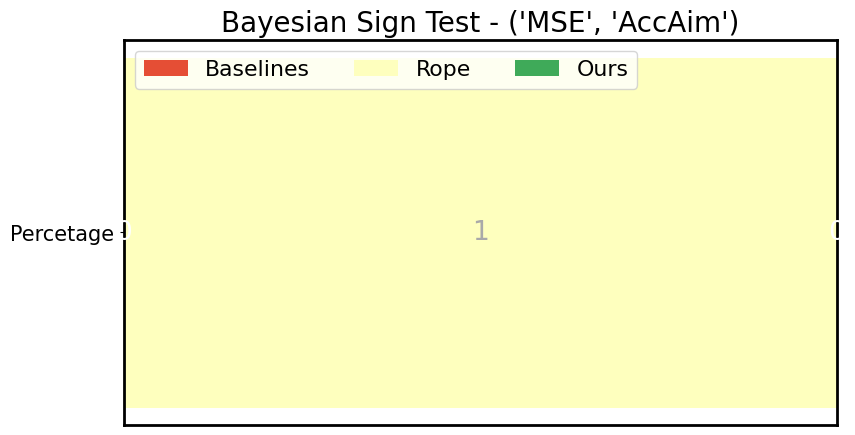

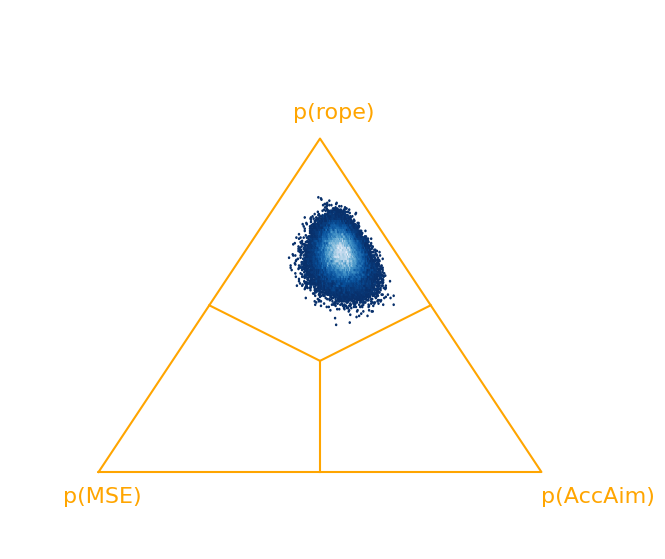

1
('BCE', 'AccAim')
P(BCE > AccAim) = 0.0, P(rope) = 0.99998, P(AccAim > BCE) = 2e-05
0.0 0.99998 2e-05


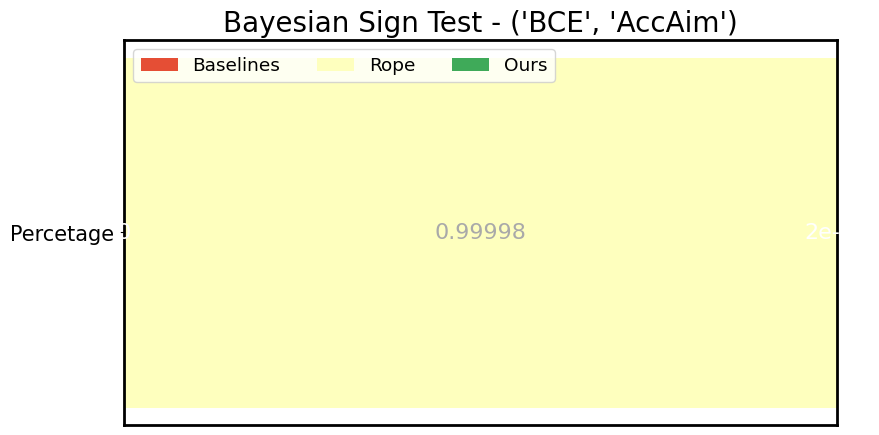

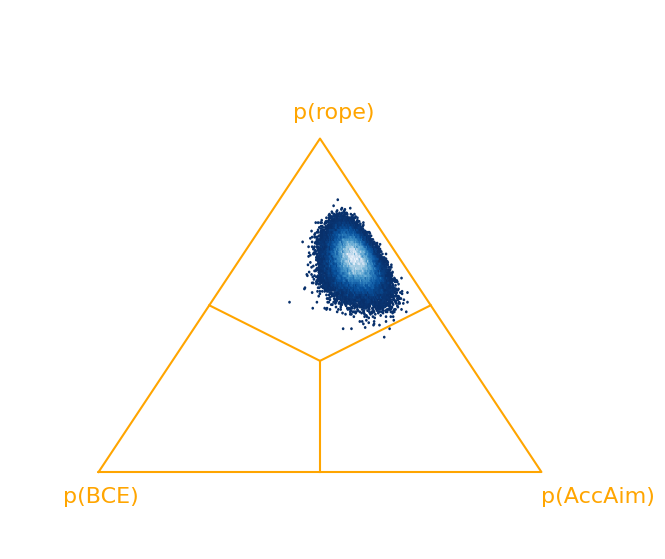

2
('MSE', 'F1Aim')
P(MSE > F1Aim) = 0.0, P(rope) = 0.0, P(F1Aim > MSE) = 1.0
0.0 0.0 1.0


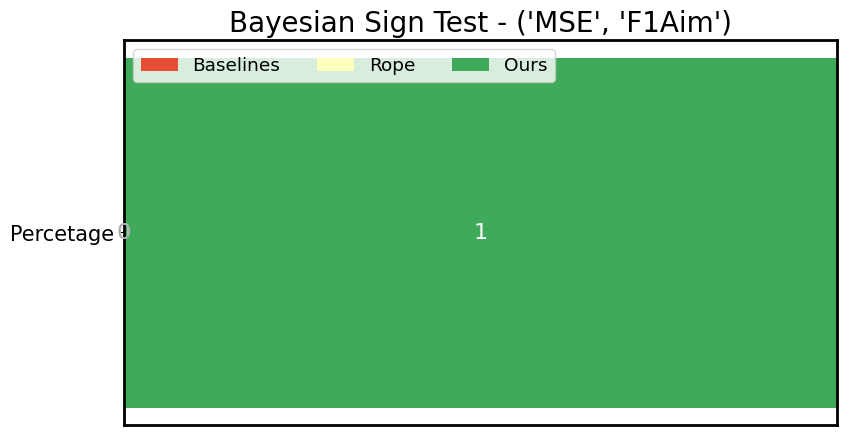

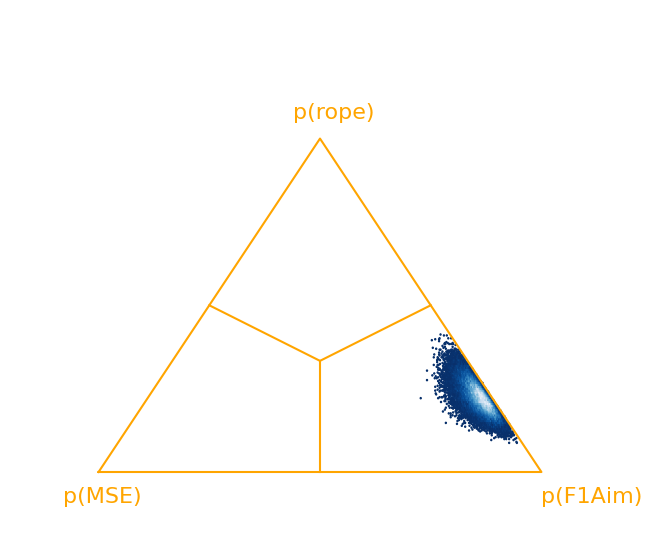

3
('BCE', 'F1Aim')
P(BCE > F1Aim) = 0.0, P(rope) = 0.0, P(F1Aim > BCE) = 1.0
0.0 0.0 1.0


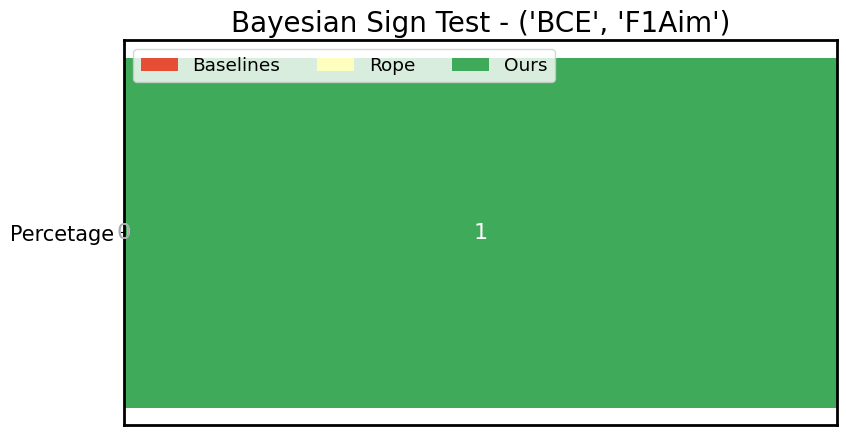

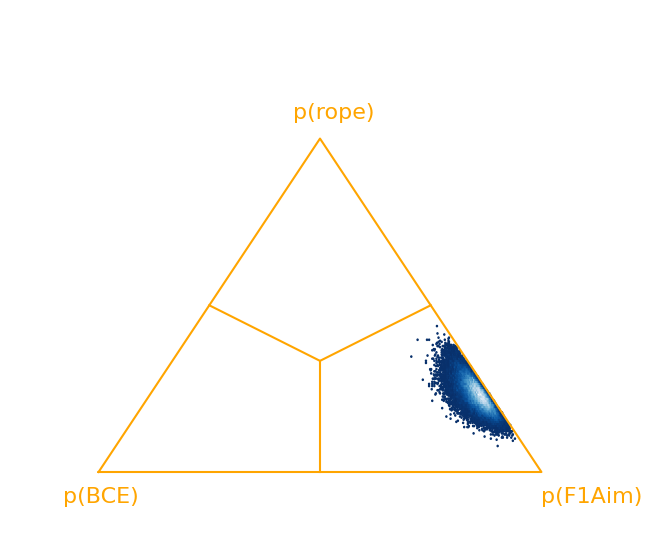

4
('MSE', 'F.5Aim')
P(MSE > F.5Aim) = 0.0, P(rope) = 0.00148, P(F.5Aim > MSE) = 0.99852
0.0 0.00148 0.99852


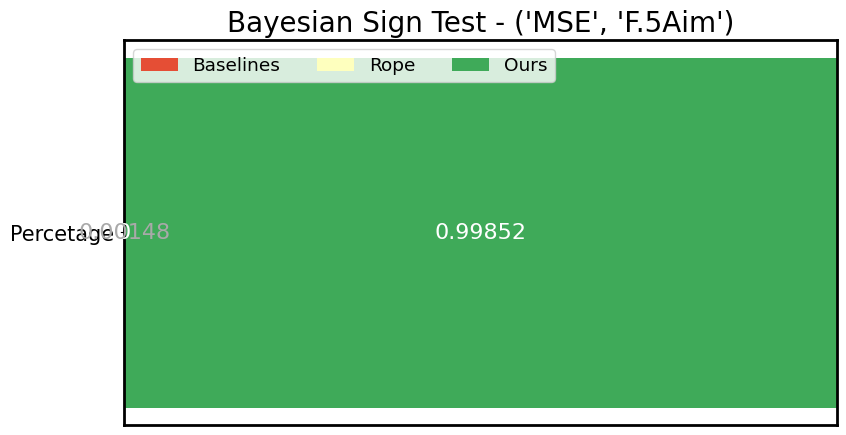

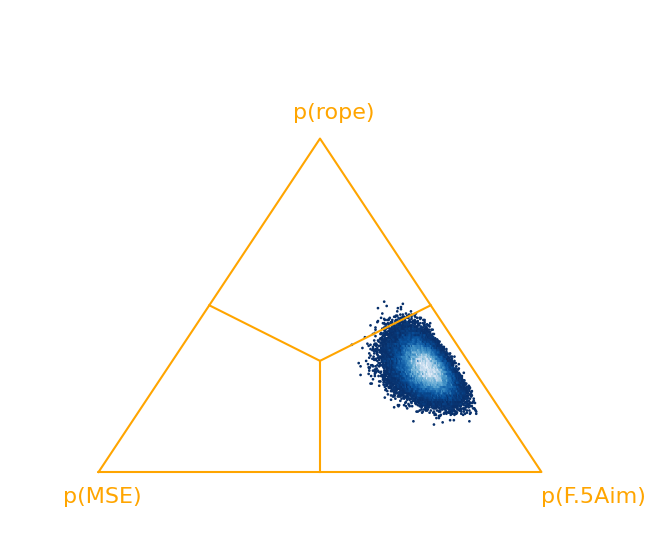

5
('BCE', 'F.5Aim')
P(BCE > F.5Aim) = 0.0, P(rope) = 0.00148, P(F.5Aim > BCE) = 0.99852
0.0 0.00148 0.99852


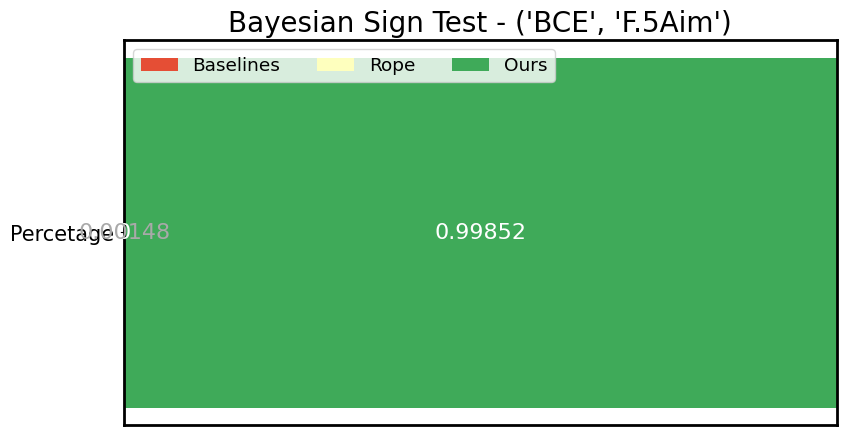

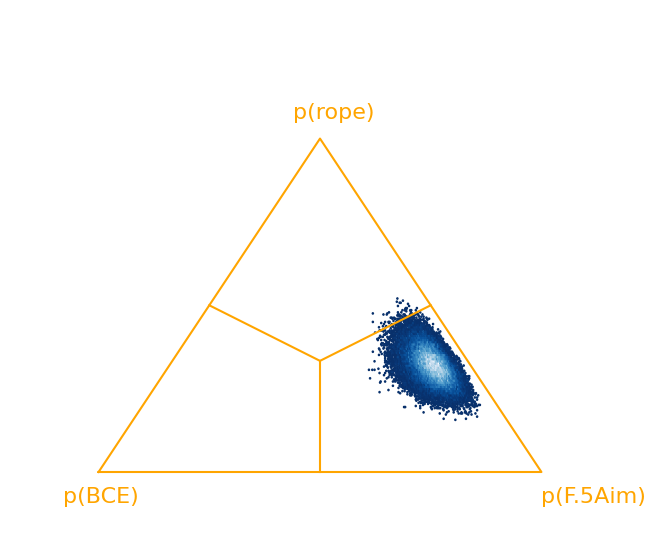

6
('MSE', 'F2Aim')
P(MSE > F2Aim) = 0.0, P(rope) = 0.0, P(F2Aim > MSE) = 1.0
0.0 0.0 1.0


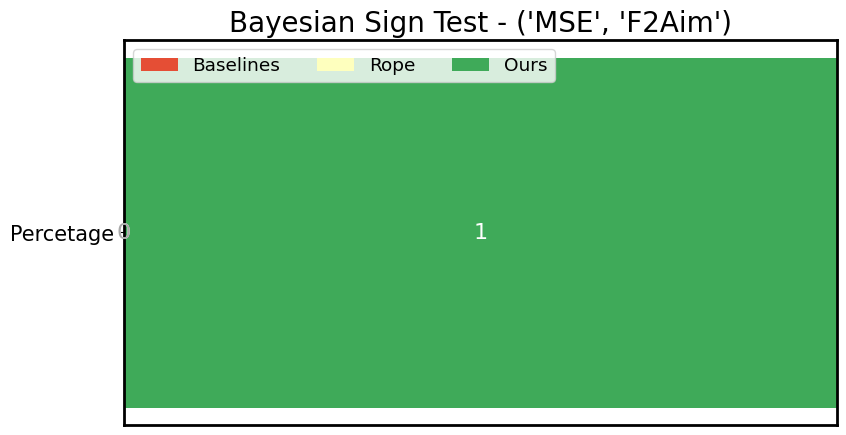

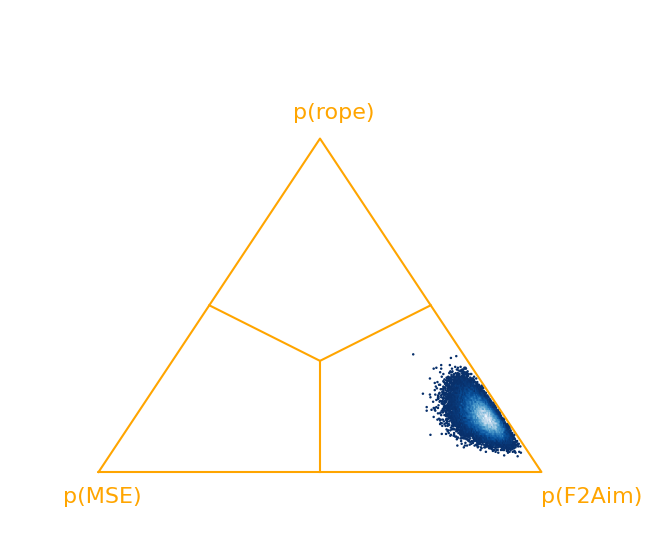

7
('BCE', 'F2Aim')
P(BCE > F2Aim) = 0.0, P(rope) = 0.0, P(F2Aim > BCE) = 1.0
0.0 0.0 1.0


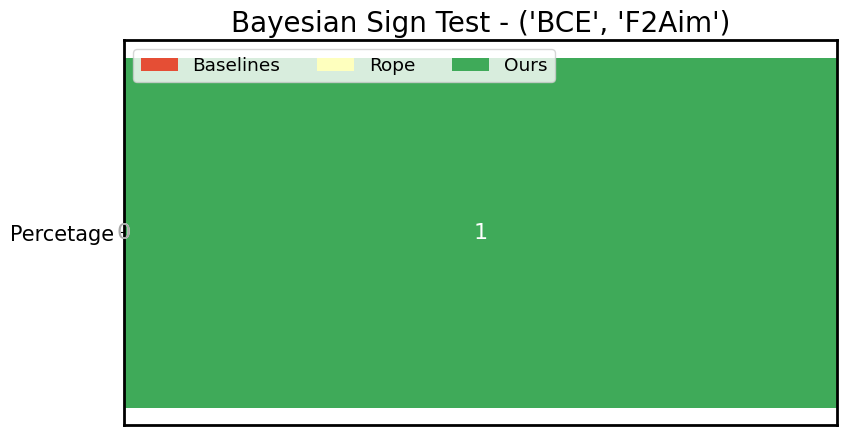

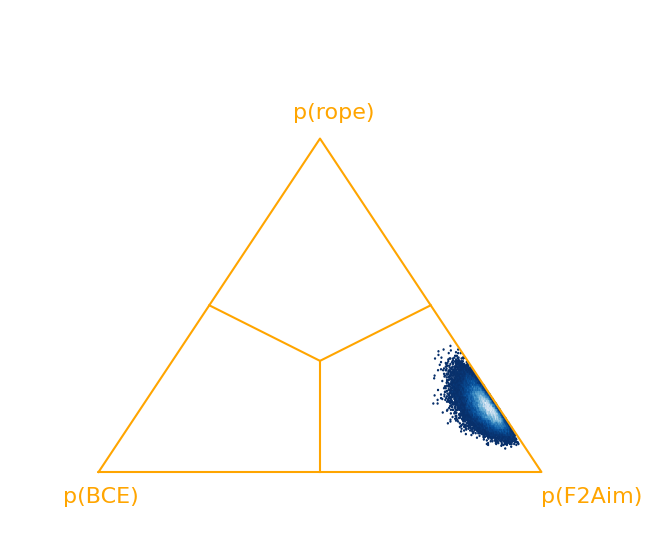

8
('MSE', 'GAim')
P(MSE > GAim) = 0.0, P(rope) = 0.0, P(GAim > MSE) = 1.0
0.0 0.0 1.0


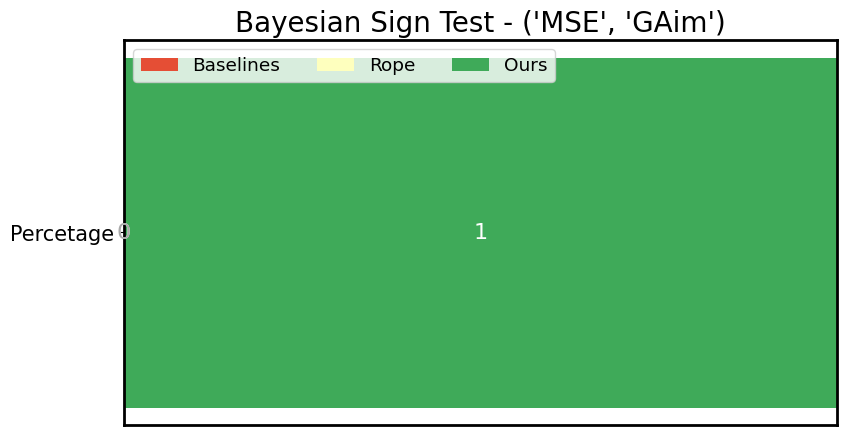

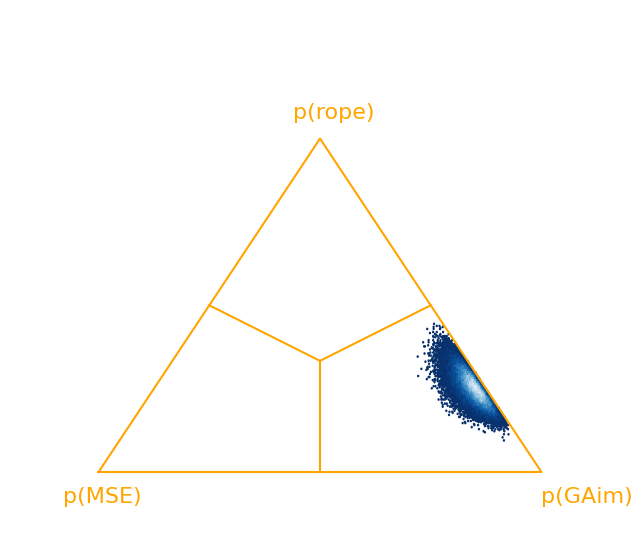

9
('BCE', 'GAim')
P(BCE > GAim) = 0.0, P(rope) = 0.0, P(GAim > BCE) = 1.0
0.0 0.0 1.0


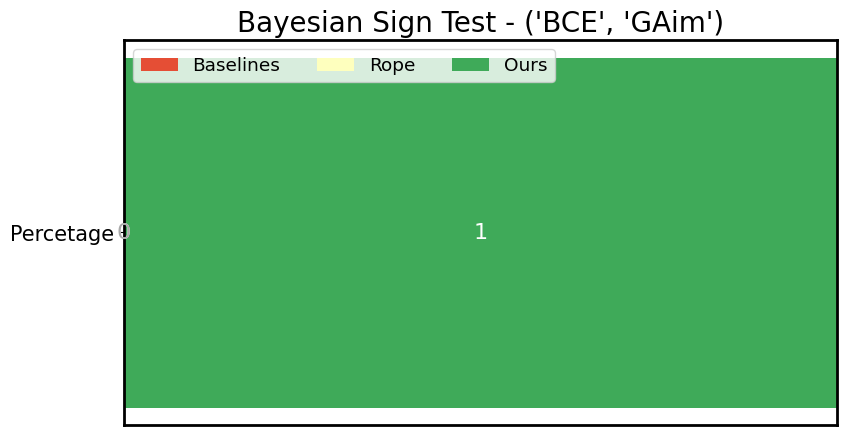

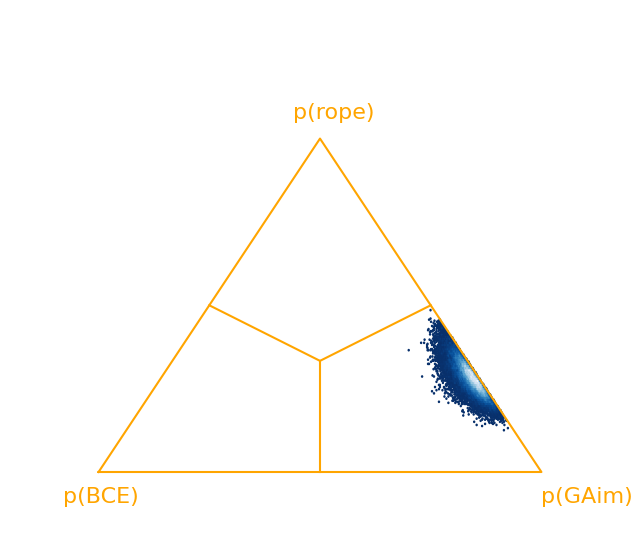

10
('MSE', 'BAim')
P(MSE > BAim) = 0.0, P(rope) = 0.0, P(BAim > MSE) = 1.0
0.0 0.0 1.0


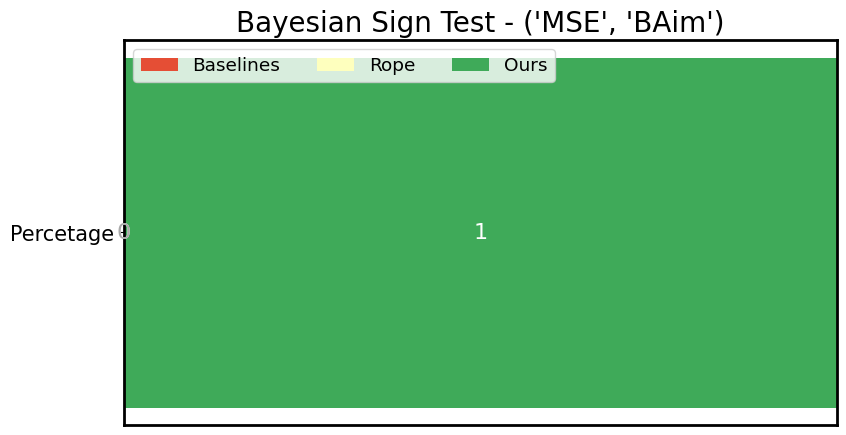

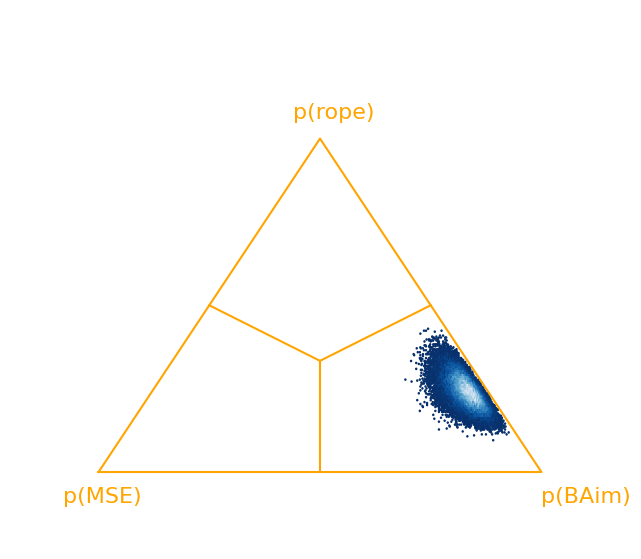

11
('BCE', 'BAim')
P(BCE > BAim) = 0.0, P(rope) = 0.0, P(BAim > BCE) = 1.0
0.0 0.0 1.0


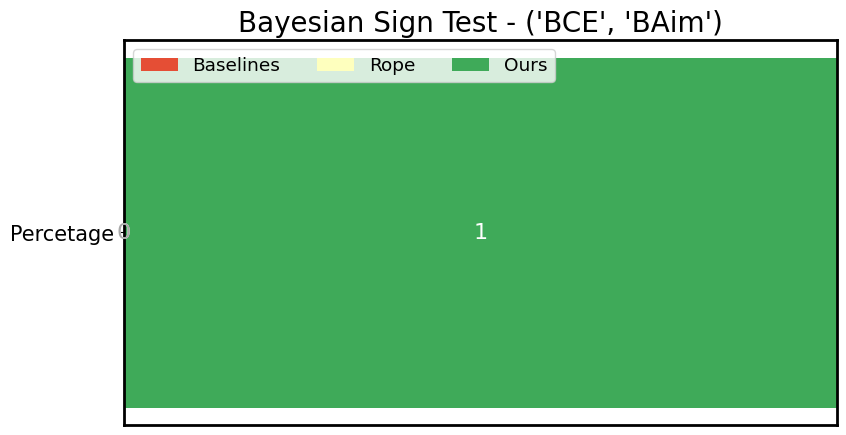

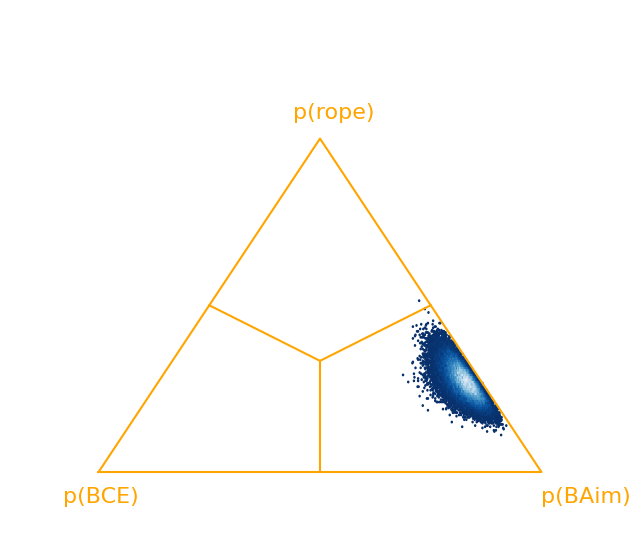

In [63]:
comp = []
basewin = []
draw = []
ourswin = []
z = 0
for i in range(len(ours)):
    for j in range(len(baselines)):
        print(z)
        names = (baselines[j],ours[i])
        print(names)
        comp.append(names)
        X = np.array(dfs[i][[baselines[j],ours[i]]])
        left, within, right = bt.signtest(X, rope=0.01, verbose=True, names=names)
        print(left, within, right)
        basewin.append(left)
        draw.append(within)
        ourswin.append(right)
        stacked_bar({"Percetage": [left, within, right]}, ["Baselines", "Rope", "Ours"])
        plt.title("Bayesian Sign Test - {}".format(names))
        z +=1

        %matplotlib inline
        samples = bt.signtest_MC(X, rope=0.01)
        fig = bt.plot_posterior(samples,names)
        plt.savefig('triangle.png',facecolor="black")
        plt.show()

In [64]:
print(comp)
print(basewin)
print(draw)
print(ourswin)

[('MSE', 'AccAim'), ('BCE', 'AccAim'), ('MSE', 'F1Aim'), ('BCE', 'F1Aim'), ('MSE', 'F.5Aim'), ('BCE', 'F.5Aim'), ('MSE', 'F2Aim'), ('BCE', 'F2Aim'), ('MSE', 'GAim'), ('BCE', 'GAim'), ('MSE', 'BAim'), ('BCE', 'BAim')]
[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
[np.float64(1.0), np.float64(0.99998), np.float64(0.0), np.float64(0.0), np.float64(0.00148), np.float64(0.00148), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
[np.float64(0.0), np.float64(2e-05), np.float64(1.0), np.float64(1.0), np.float64(0.99852), np.float64(0.99852), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0)]


In [65]:
# r=0.01
results = pd.DataFrame(comp, columns = ["Baseline","Ours"])
results["Basewin_prob"] = basewin
results["Draw_prob"] = draw
results["Ourswin_prob"] = ourswin
results

Baseline    Ours  Basewin_prob  Draw_prob  Ourswin_prob
0       MSE  AccAim           0.0    1.00000       0.00000
1       BCE  AccAim           0.0    0.99998       0.00002
2       MSE   F1Aim           0.0    0.00000       1.00000
3       BCE   F1Aim           0.0    0.00000       1.00000
4       MSE  F.5Aim           0.0    0.00148       0.99852
5       BCE  F.5Aim           0.0    0.00148       0.99852
6       MSE   F2Aim           0.0    0.00000       1.00000
7       BCE   F2Aim           0.0    0.00000       1.00000
8       MSE    GAim           0.0    0.00000       1.00000
9       BCE    GAim           0.0    0.00000       1.00000
10      MSE    BAim           0.0    0.00000       1.00000
11      BCE    BAim           0.0    0.00000       1.00000

In [66]:
plt.rcParams["figure.dpi"] = 100
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 19
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)


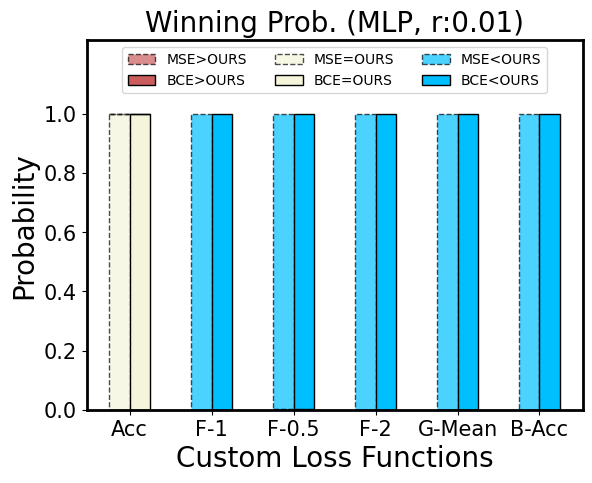

In [67]:
label = ['Acc','F-1','F-0.5','F-2','G-Mean','B-Acc']
index = np.arange(len(label))
bar_width = 0.25
a1 = 0.7
a2 = 1.0
c1 = "black"
c2 = "black"

MSE_win = results[results["Baseline"]=='MSE']['Basewin_prob']
MSE_draw = results[results["Baseline"]=='MSE']['Draw_prob']
MSE_lose = results[results["Baseline"]=='MSE']['Ourswin_prob']
BCE_win = results[results["Baseline"]=='BCE']['Basewin_prob']
BCE_draw = results[results["Baseline"]=='BCE']['Draw_prob']
BCE_lose = results[results["Baseline"]=='BCE']['Ourswin_prob']

# MSE
p1 = plt.bar(index-bar_width*0.5, MSE_win, bar_width, alpha = a1, color="indianred", label="MSE>OURS", edgecolor=c1, ls='--')
p2 = plt.bar(index-bar_width*0.5, MSE_draw, bar_width, alpha = a1, color="beige", bottom=MSE_win, label="MSE=OURS", edgecolor=c1, ls='--')
p3 = plt.bar(index-bar_width*0.5, MSE_lose, bar_width, alpha = a1, color="deepskyblue", bottom=MSE_win+MSE_draw, label="MSE<OURS", edgecolor=c1, ls='--')
# Lable
plt.bar(label, 0, 0)
# BCE
p4 = plt.bar(index+bar_width*0.5, BCE_win, bar_width, alpha = a2, color="indianred", label="BCE>OURS", edgecolor=c2)
p5 = plt.bar(index+bar_width*0.5, BCE_draw, bar_width, alpha = a2, color="beige", bottom=BCE_win, label="BCE=OURS", edgecolor=c2)
p6 = plt.bar(index+bar_width*0.5, BCE_lose, bar_width, alpha = a2, color="deepskyblue", bottom=BCE_win+BCE_draw, label="BCE<OURS", edgecolor=c2)

plt.ylim(0.0 ,1.25)
plt.yticks(np.arange(0, 1.1, 0.2))
plt.legend(ncol=3, fontsize=10, loc='upper center', handles=(p1,p4,p2,p5,p3,p6),)
plt.title("Winning Prob. (MLP, r:0.01)")
plt.xlabel("Custom Loss Functions")
plt.ylabel("Probability")
plt.show()

In [68]:
results = results[results.Ours.isin(["AccAim", "F1Aim", "BAim"])]
results

Baseline    Ours  Basewin_prob  Draw_prob  Ourswin_prob
0       MSE  AccAim           0.0    1.00000       0.00000
1       BCE  AccAim           0.0    0.99998       0.00002
2       MSE   F1Aim           0.0    0.00000       1.00000
3       BCE   F1Aim           0.0    0.00000       1.00000
10      MSE    BAim           0.0    0.00000       1.00000
11      BCE    BAim           0.0    0.00000       1.00000

In [69]:
plt.rcParams["figure.dpi"] = 100
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 20
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)


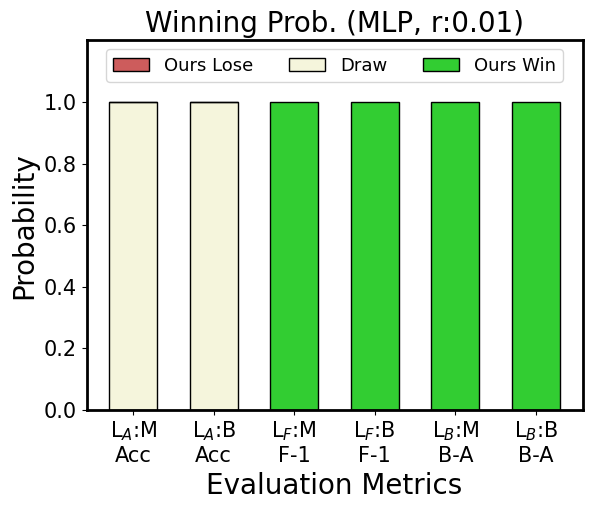

In [70]:

label = ['L$_{A}$:M\nAcc','L$_{A}$:B\nAcc','L$_{F}$:M\nF-1','L$_{F}$:B\nF-1',
         'L$_{B}$:M\nB-A','L$_{B}$:B\nB-A']
index = np.arange(len(label))
bar_width = 0.6
a1 = 0.7
a2 = 1.0
c1 = "black"
c2 = "black"

lose = results['Basewin_prob']
draw = results['Draw_prob']
win = results['Ourswin_prob']

# OURS lose
p1 = plt.bar(index, lose, bar_width, color="indianred", label="Ours Lose", edgecolor=c1)

# OURS draw
p2 = plt.bar(index, draw, bar_width, color="beige", bottom=lose, label="Draw", edgecolor=c1)

# OURS win
p3 = plt.bar(index, win, bar_width, color="limegreen", bottom=lose+draw, label="Ours Win", edgecolor=c2)

plt.xticks(index, label)
plt.ylim(0.0 ,1.2)
plt.yticks(np.arange(0, 1.1, 0.2))
plt.legend(ncol=3, fontsize=13, loc='upper center', handles=(p1,p2,p3),)
plt.title("Winning Prob. (MLP, r:0.01)")
plt.xlabel("Evaluation Metrics")
plt.ylabel("Probability")
plt.show()

0
('MSE', 'AccAim')
P(MSE > AccAim) = 0.0, P(rope) = 1.0, P(AccAim > MSE) = 0.0
0.0 1.0 0.0


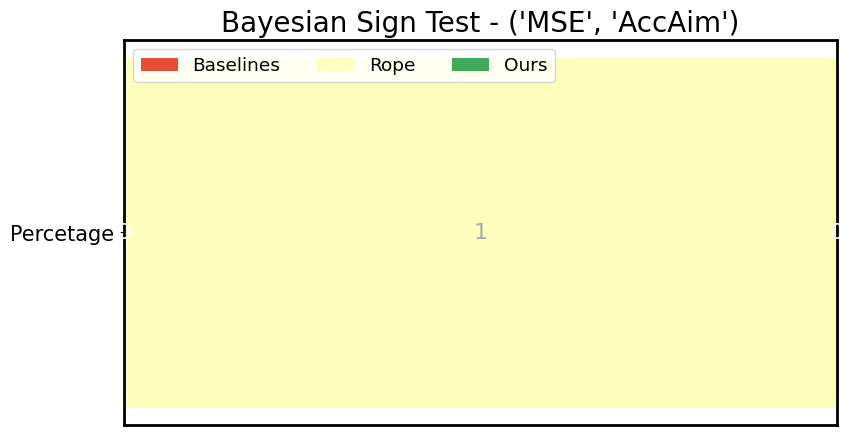

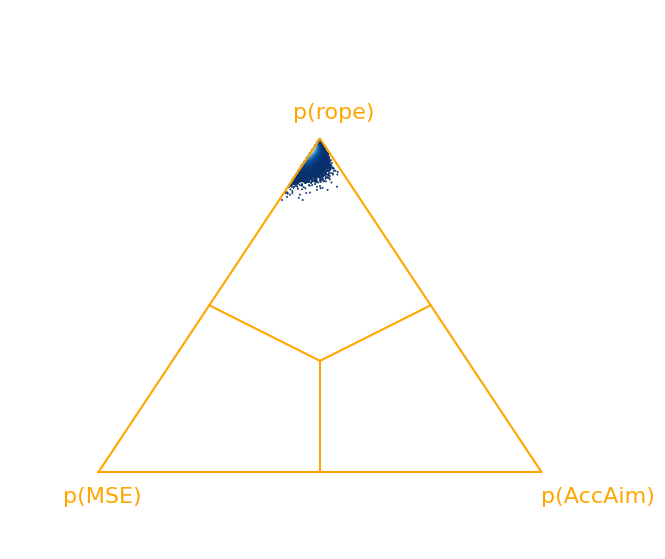

1
('BCE', 'AccAim')
P(BCE > AccAim) = 0.0, P(rope) = 1.0, P(AccAim > BCE) = 0.0
0.0 1.0 0.0


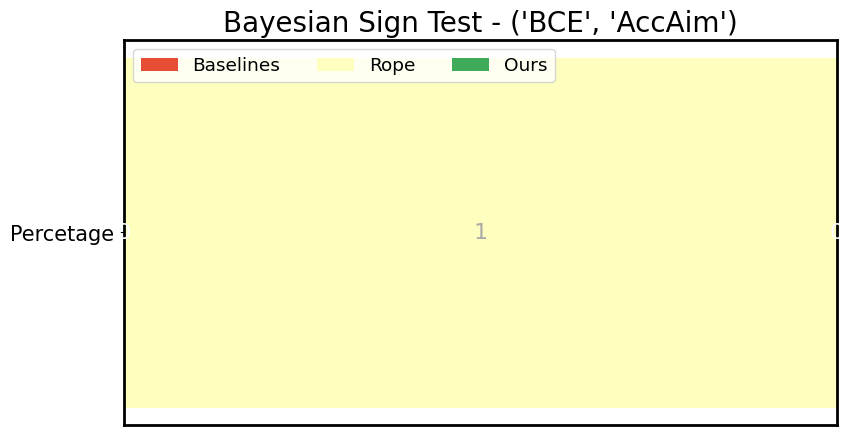

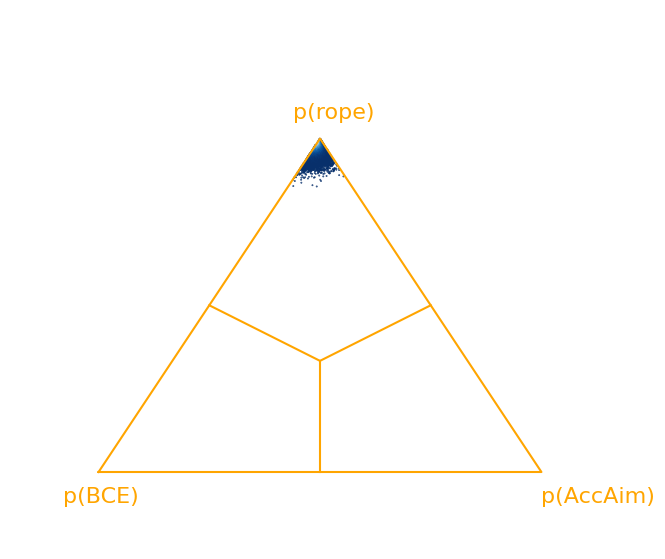

2
('MSE', 'F1Aim')
P(MSE > F1Aim) = 0.0, P(rope) = 0.15788, P(F1Aim > MSE) = 0.84212
0.0 0.15788 0.84212


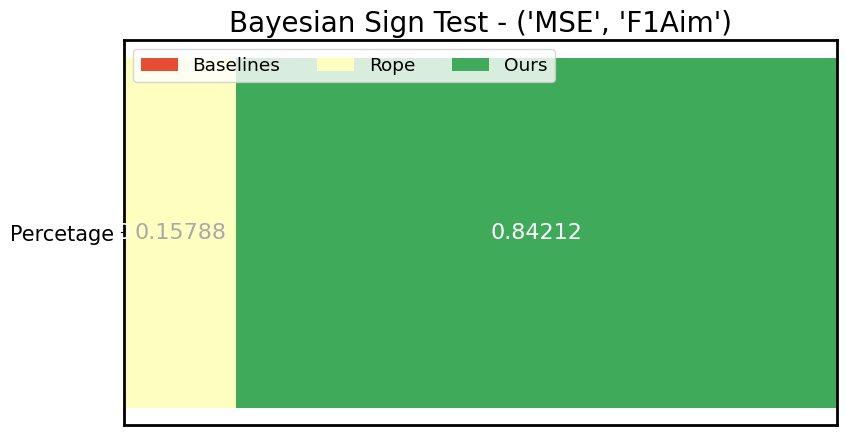

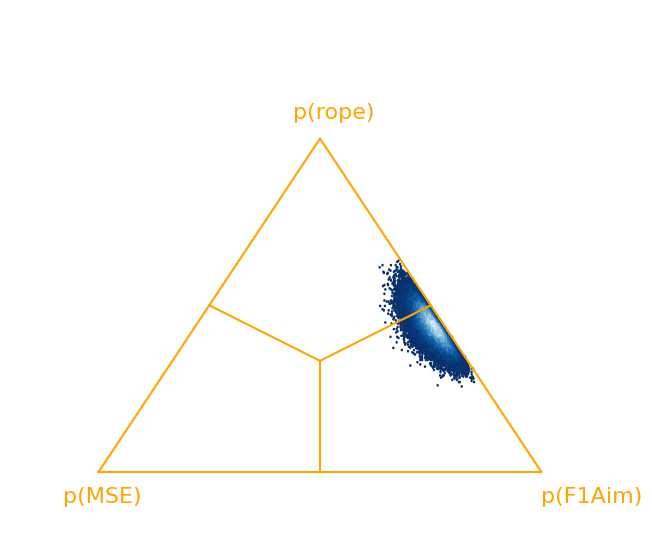

3
('BCE', 'F1Aim')
P(BCE > F1Aim) = 0.0, P(rope) = 0.50634, P(F1Aim > BCE) = 0.49366
0.0 0.50634 0.49366


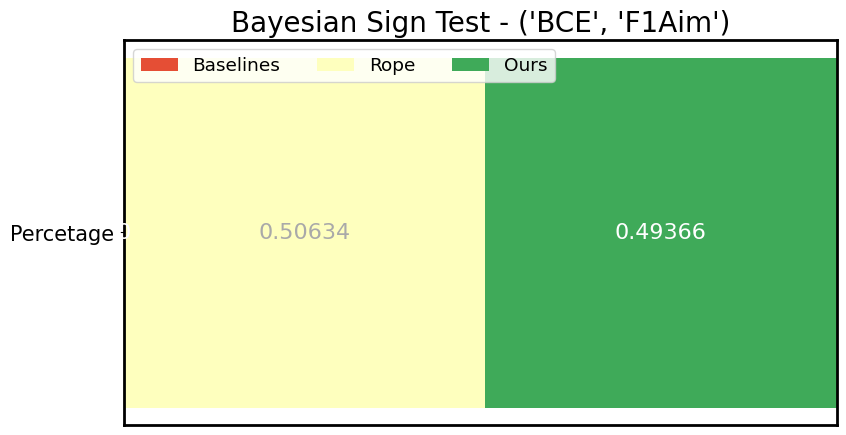

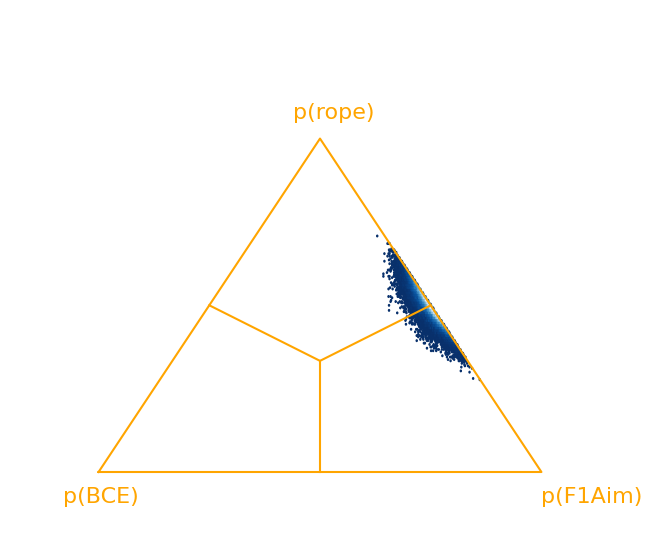

4
('MSE', 'F.5Aim')
P(MSE > F.5Aim) = 0.0, P(rope) = 0.99062, P(F.5Aim > MSE) = 0.00938
0.0 0.99062 0.00938


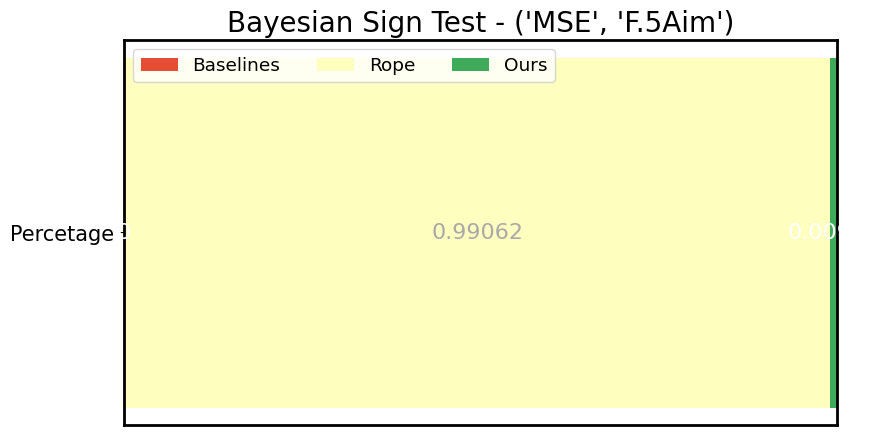

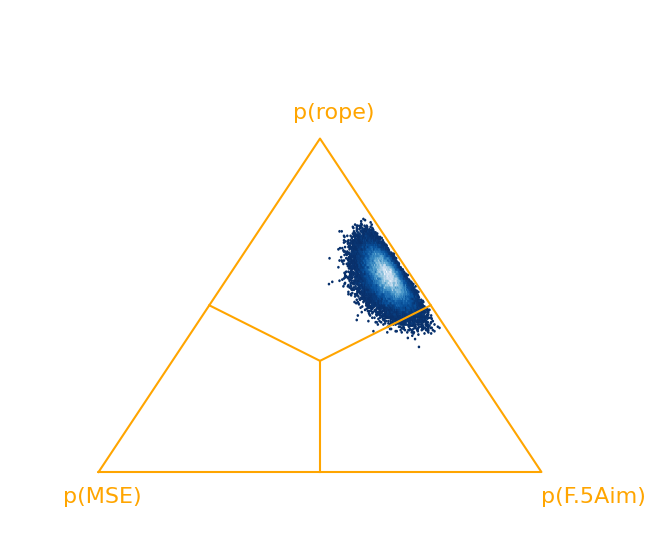

5
('BCE', 'F.5Aim')
P(BCE > F.5Aim) = 0.0, P(rope) = 0.99878, P(F.5Aim > BCE) = 0.00122
0.0 0.99878 0.00122


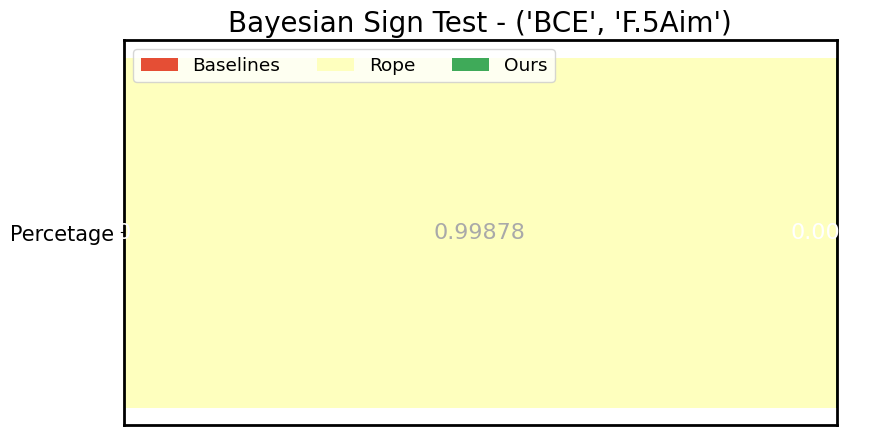

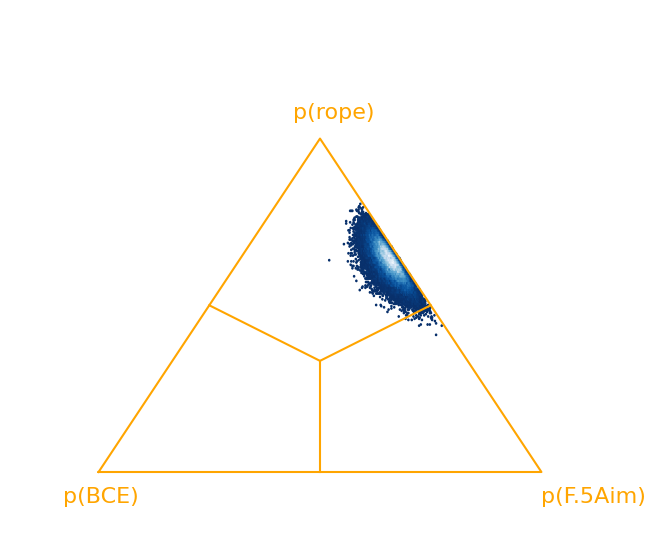

6
('MSE', 'F2Aim')
P(MSE > F2Aim) = 0.0, P(rope) = 8e-05, P(F2Aim > MSE) = 0.99992
0.0 8e-05 0.99992


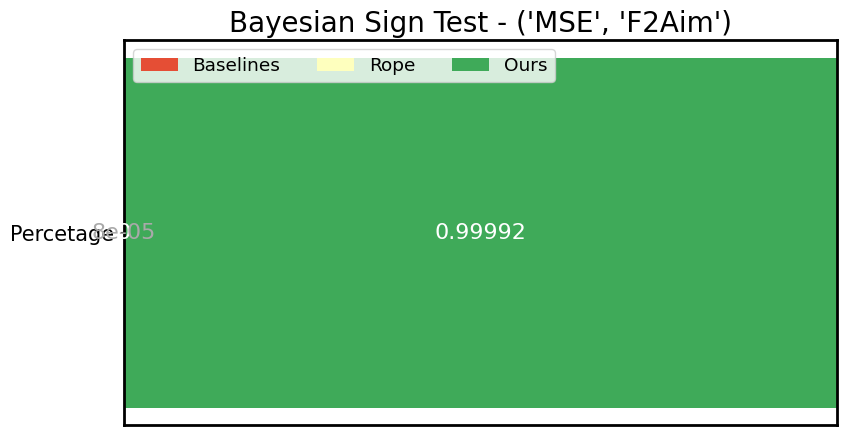

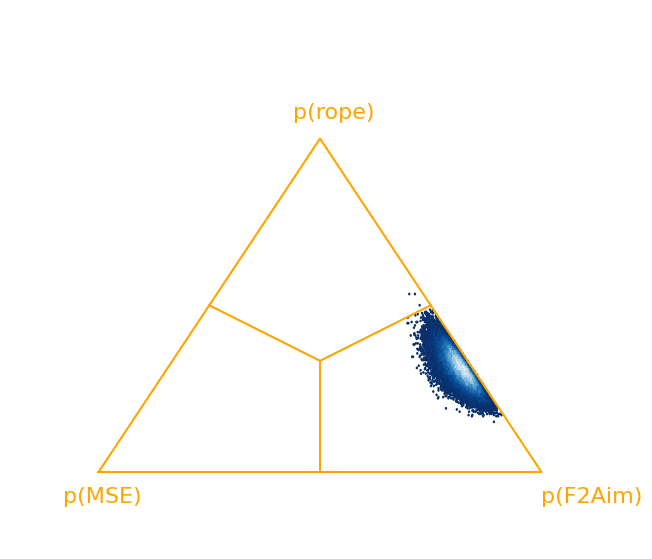

7
('BCE', 'F2Aim')
P(BCE > F2Aim) = 0.0, P(rope) = 0.00118, P(F2Aim > BCE) = 0.99882
0.0 0.00118 0.99882


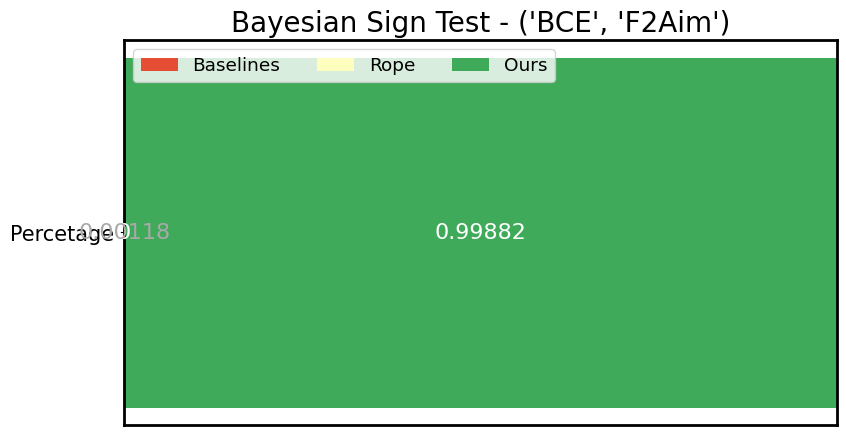

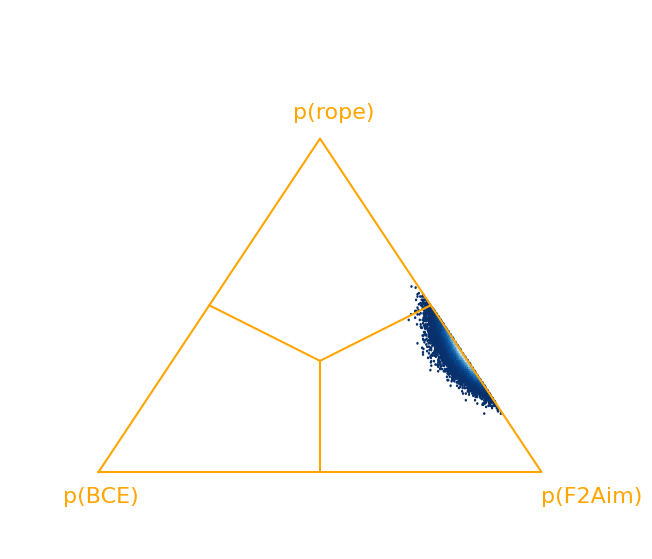

8
('MSE', 'GAim')
P(MSE > GAim) = 0.0, P(rope) = 0.31388, P(GAim > MSE) = 0.68612
0.0 0.31388 0.68612


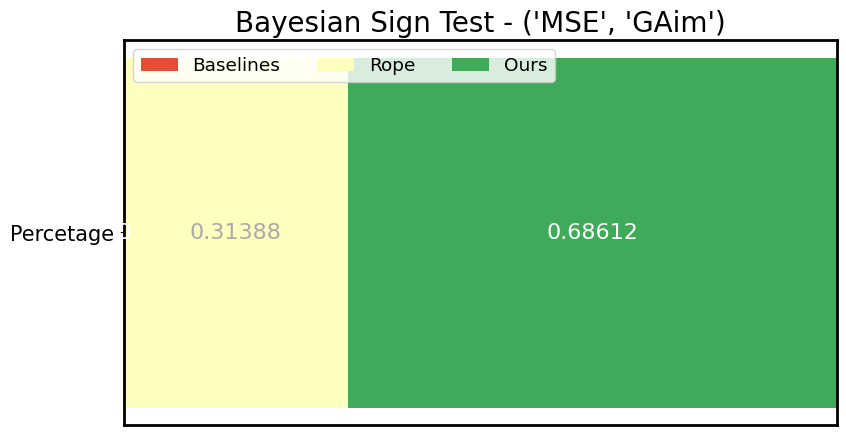

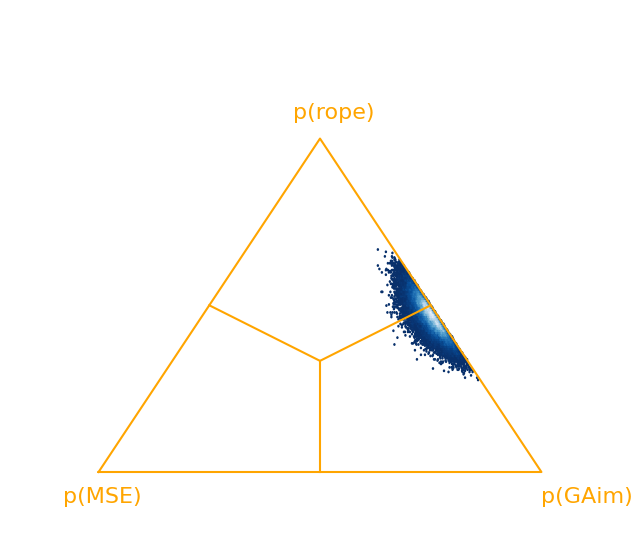

9
('BCE', 'GAim')
P(BCE > GAim) = 0.0, P(rope) = 0.31026, P(GAim > BCE) = 0.68974
0.0 0.31026 0.68974


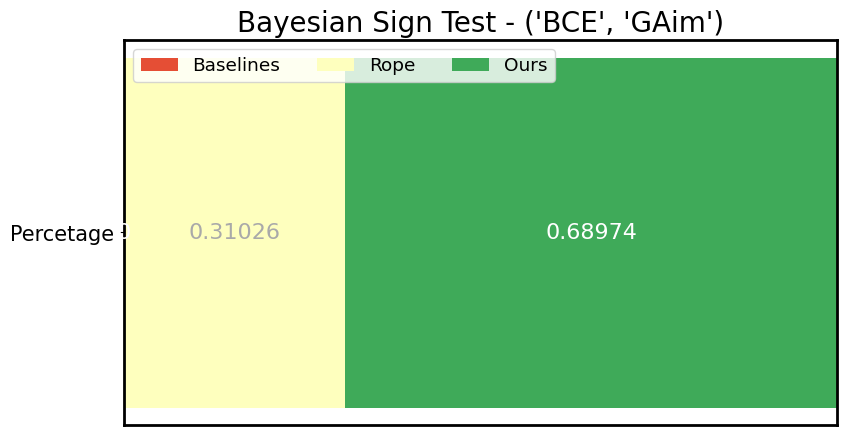

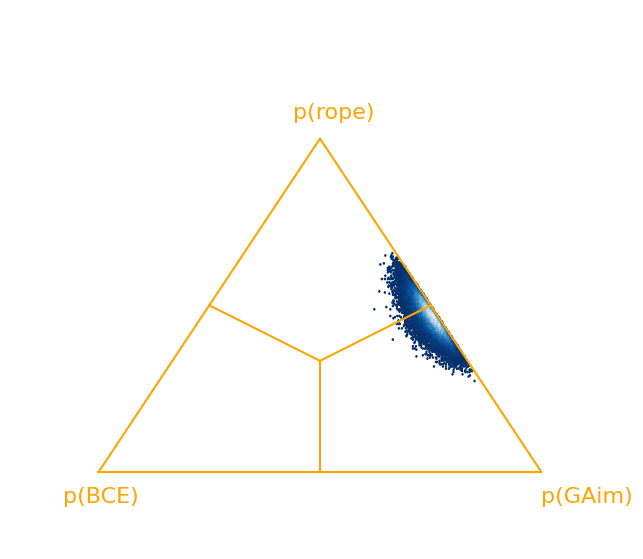

10
('MSE', 'BAim')
P(MSE > BAim) = 0.0, P(rope) = 0.81628, P(BAim > MSE) = 0.18372
0.0 0.81628 0.18372


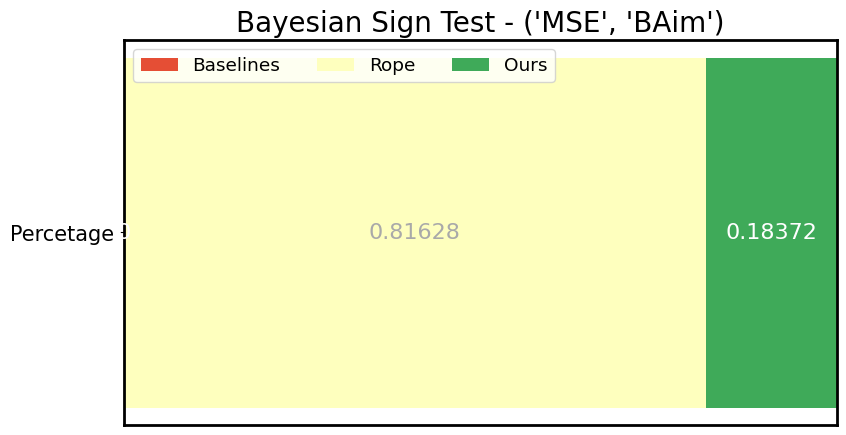

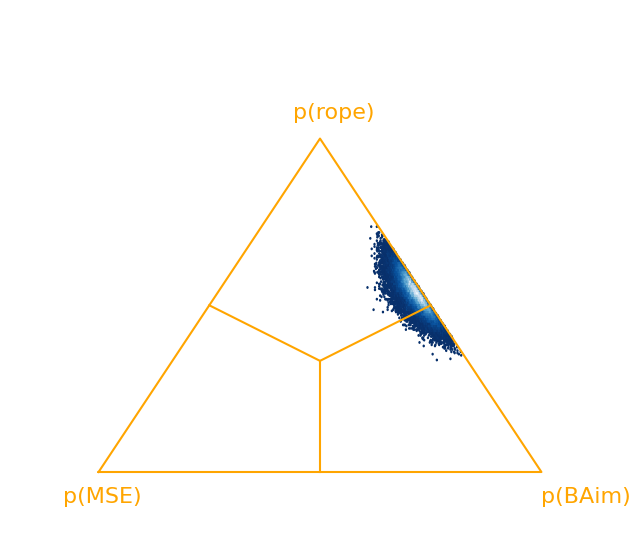

11
('BCE', 'BAim')
P(BCE > BAim) = 0.0, P(rope) = 0.90238, P(BAim > BCE) = 0.09762
0.0 0.90238 0.09762


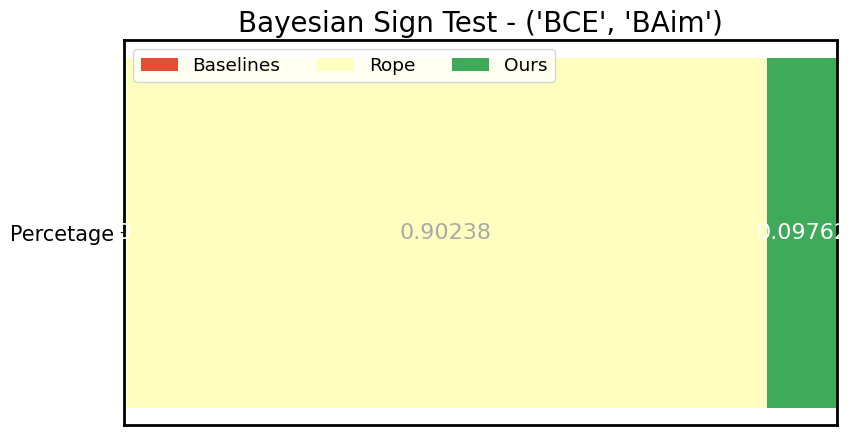

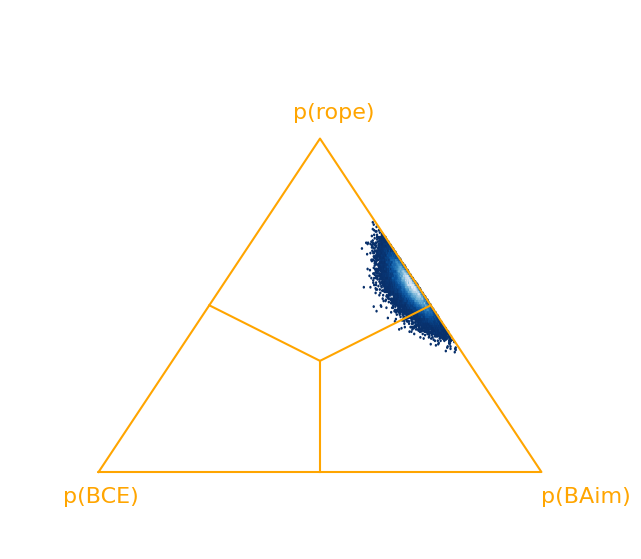

In [72]:
comp = []
basewin = []
draw = []
ourswin = []
z = 0
for i in range(len(ours)):
    for j in range(len(baselines)):
        print(z)
        names = (baselines[j],ours[i])
        print(names)
        comp.append(names)
        X = np.array(dfs[i][[baselines[j],ours[i]]])
        left, within, right = bt.signtest(X, rope=0.05, verbose=True, names=names)
        print(left, within, right)
        basewin.append(left)
        draw.append(within)
        ourswin.append(right)
        stacked_bar({"Percetage": [left, within, right]}, ["Baselines", "Rope", "Ours"])
        plt.title("Bayesian Sign Test - {}".format(names))
        z +=1


        %matplotlib inline
        samples = bt.signtest_MC(X, rope=0.05)
        fig = bt.plot_posterior(samples,names)
        plt.savefig('triangle.png',facecolor="black")
        plt.show()

In [73]:
print(comp)
print(basewin)
print(draw)
print(ourswin)

[('MSE', 'AccAim'), ('BCE', 'AccAim'), ('MSE', 'F1Aim'), ('BCE', 'F1Aim'), ('MSE', 'F.5Aim'), ('BCE', 'F.5Aim'), ('MSE', 'F2Aim'), ('BCE', 'F2Aim'), ('MSE', 'GAim'), ('BCE', 'GAim'), ('MSE', 'BAim'), ('BCE', 'BAim')]
[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
[np.float64(1.0), np.float64(1.0), np.float64(0.15788), np.float64(0.50634), np.float64(0.99062), np.float64(0.99878), np.float64(8e-05), np.float64(0.00118), np.float64(0.31388), np.float64(0.31026), np.float64(0.81628), np.float64(0.90238)]
[np.float64(0.0), np.float64(0.0), np.float64(0.84212), np.float64(0.49366), np.float64(0.00938), np.float64(0.00122), np.float64(0.99992), np.float64(0.99882), np.float64(0.68612), np.float64(0.68974), np.float64(0.18372), np.float64(0.09762)]


In [74]:
# r=0.05
results = pd.DataFrame(comp, columns = ["Baseline","Ours"])
results["Basewin_prob"] = basewin
results["Draw_prob"] = draw
results["Ourswin_prob"] = ourswin
results

Baseline    Ours  Basewin_prob  Draw_prob  Ourswin_prob
0       MSE  AccAim           0.0    1.00000       0.00000
1       BCE  AccAim           0.0    1.00000       0.00000
2       MSE   F1Aim           0.0    0.15788       0.84212
3       BCE   F1Aim           0.0    0.50634       0.49366
4       MSE  F.5Aim           0.0    0.99062       0.00938
5       BCE  F.5Aim           0.0    0.99878       0.00122
6       MSE   F2Aim           0.0    0.00008       0.99992
7       BCE   F2Aim           0.0    0.00118       0.99882
8       MSE    GAim           0.0    0.31388       0.68612
9       BCE    GAim           0.0    0.31026       0.68974
10      MSE    BAim           0.0    0.81628       0.18372
11      BCE    BAim           0.0    0.90238       0.09762

In [75]:
plt.rcParams["figure.dpi"] = 100
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 19
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

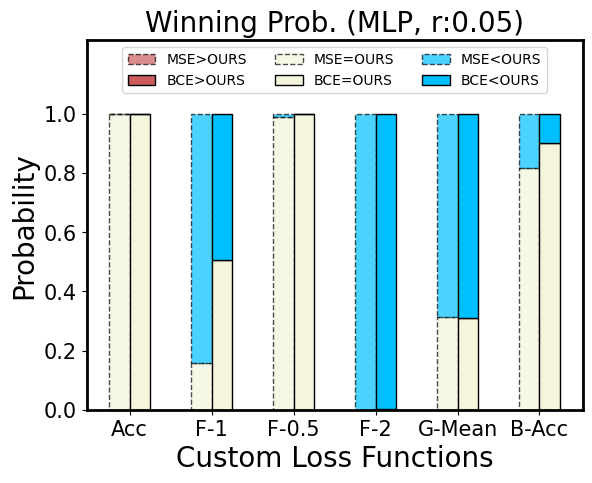

In [76]:
label = ['Acc','F-1','F-0.5','F-2','G-Mean','B-Acc']
index = np.arange(len(label))
bar_width = 0.25
a1 = 0.7
a2 = 1.0
c1 = "black"
c2 = "black"

MSE_win = results[results["Baseline"]=='MSE']['Basewin_prob']
MSE_draw = results[results["Baseline"]=='MSE']['Draw_prob']
MSE_lose = results[results["Baseline"]=='MSE']['Ourswin_prob']
BCE_win = results[results["Baseline"]=='BCE']['Basewin_prob']
BCE_draw = results[results["Baseline"]=='BCE']['Draw_prob']
BCE_lose = results[results["Baseline"]=='BCE']['Ourswin_prob']

# MSE
p1 = plt.bar(index-bar_width*0.5, MSE_win, bar_width, alpha = a1, color="indianred", label="MSE>OURS", edgecolor=c1, ls='--')
p2 = plt.bar(index-bar_width*0.5, MSE_draw, bar_width, alpha = a1, color="beige", bottom=MSE_win, label="MSE=OURS", edgecolor=c1, ls='--')
p3 = plt.bar(index-bar_width*0.5, MSE_lose, bar_width, alpha = a1, color="deepskyblue", bottom=MSE_win+MSE_draw, label="MSE<OURS", edgecolor=c1, ls='--')
# Lable
plt.bar(label, 0, 0)
# BCE
p4 = plt.bar(index+bar_width*0.5, BCE_win, bar_width, alpha = a2, color="indianred", label="BCE>OURS", edgecolor=c2)
p5 = plt.bar(index+bar_width*0.5, BCE_draw, bar_width, alpha = a2, color="beige", bottom=BCE_win, label="BCE=OURS", edgecolor=c2)
p6 = plt.bar(index+bar_width*0.5, BCE_lose, bar_width, alpha = a2, color="deepskyblue", bottom=BCE_win+BCE_draw, label="BCE<OURS", edgecolor=c2)

plt.ylim(0.0 ,1.25)
plt.yticks(np.arange(0, 1.1, 0.2))
plt.legend(ncol=3, fontsize=10, loc='upper center', handles=(p1,p4,p2,p5,p3,p6),)
plt.title("Winning Prob. (MLP, r:0.05)")
plt.xlabel("Custom Loss Functions")
plt.ylabel("Probability")
plt.show()

In [77]:
results = results[results.Ours.isin(["AccAim", "F1Aim", "BAim"])]
results

Baseline    Ours  Basewin_prob  Draw_prob  Ourswin_prob
0       MSE  AccAim           0.0    1.00000       0.00000
1       BCE  AccAim           0.0    1.00000       0.00000
2       MSE   F1Aim           0.0    0.15788       0.84212
3       BCE   F1Aim           0.0    0.50634       0.49366
10      MSE    BAim           0.0    0.81628       0.18372
11      BCE    BAim           0.0    0.90238       0.09762

In [78]:
plt.rcParams["figure.dpi"] = 100
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 20
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)


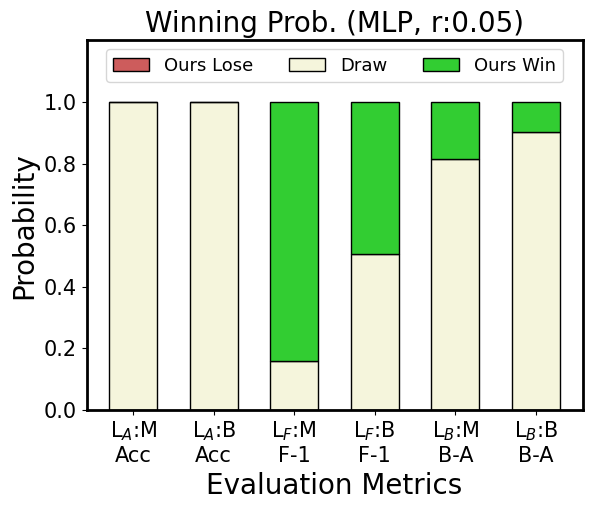

In [79]:

label = ['L$_{A}$:M\nAcc','L$_{A}$:B\nAcc','L$_{F}$:M\nF-1','L$_{F}$:B\nF-1',
         'L$_{B}$:M\nB-A','L$_{B}$:B\nB-A']
index = np.arange(len(label))
bar_width = 0.6
a1 = 0.7
a2 = 1.0
c1 = "black"
c2 = "black"

lose = results['Basewin_prob']
draw = results['Draw_prob']
win = results['Ourswin_prob']

# OURS lose
p1 = plt.bar(index, lose, bar_width, color="indianred", label="Ours Lose", edgecolor=c1)

# OURS draw
p2 = plt.bar(index, draw, bar_width, color="beige", bottom=lose, label="Draw", edgecolor=c1)

# OURS win
p3 = plt.bar(index, win, bar_width, color="limegreen", bottom=lose+draw, label="Ours Win", edgecolor=c2)

plt.xticks(index, label)
plt.ylim(0.0 ,1.2)
plt.yticks(np.arange(0, 1.1, 0.2))
plt.legend(ncol=3, fontsize=13, loc='upper center', handles=(p1,p2,p3),)
plt.title("Winning Prob. (MLP, r:0.05)")
plt.xlabel("Evaluation Metrics")
plt.ylabel("Probability")
plt.show()

0
('MSE', 'AccAim')
P(MSE > AccAim) = 0.0, P(rope) = 1.0, P(AccAim > MSE) = 0.0
0.0 1.0 0.0


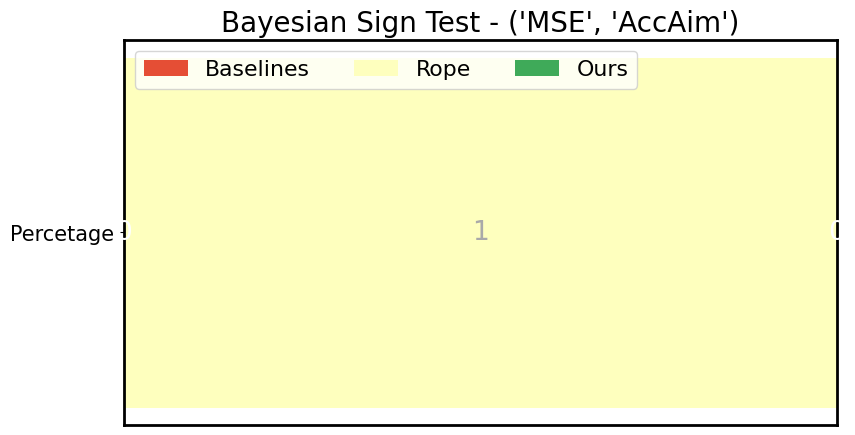

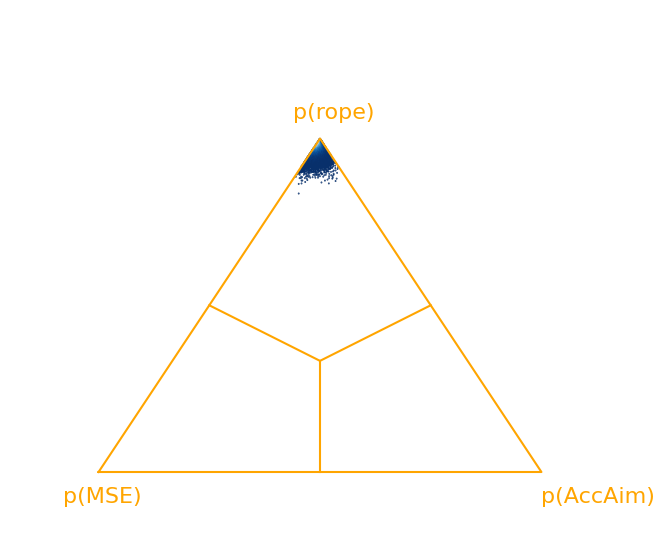

1
('BCE', 'AccAim')
P(BCE > AccAim) = 0.0, P(rope) = 1.0, P(AccAim > BCE) = 0.0
0.0 1.0 0.0


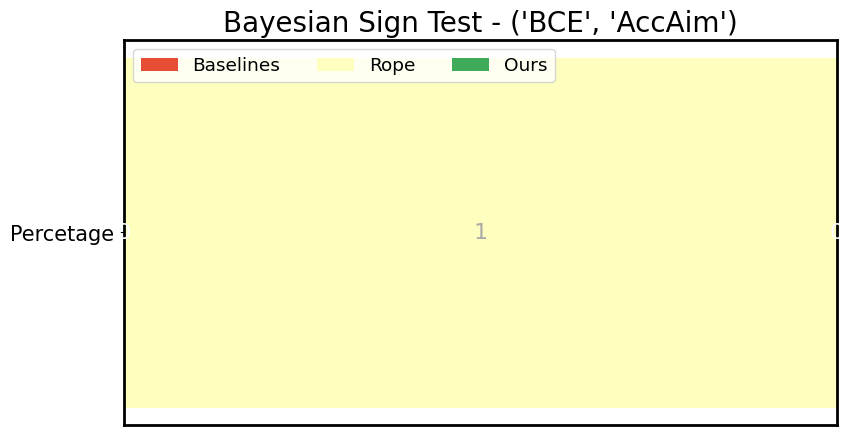

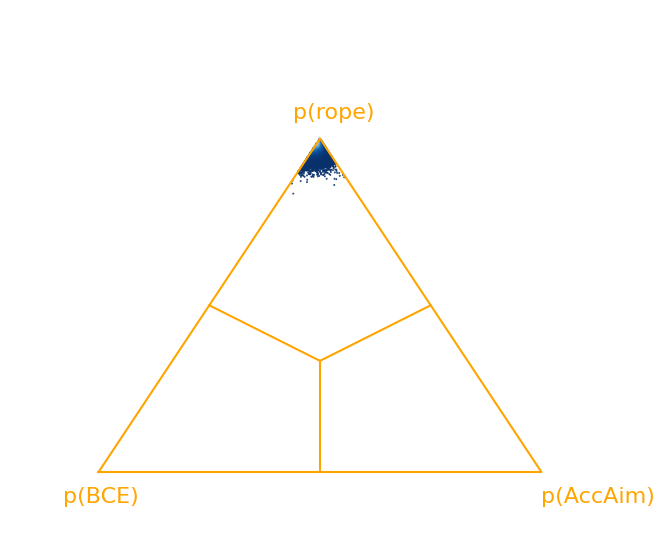

2
('MSE', 'F1Aim')
P(MSE > F1Aim) = 0.0, P(rope) = 0.97148, P(F1Aim > MSE) = 0.02852
0.0 0.97148 0.02852


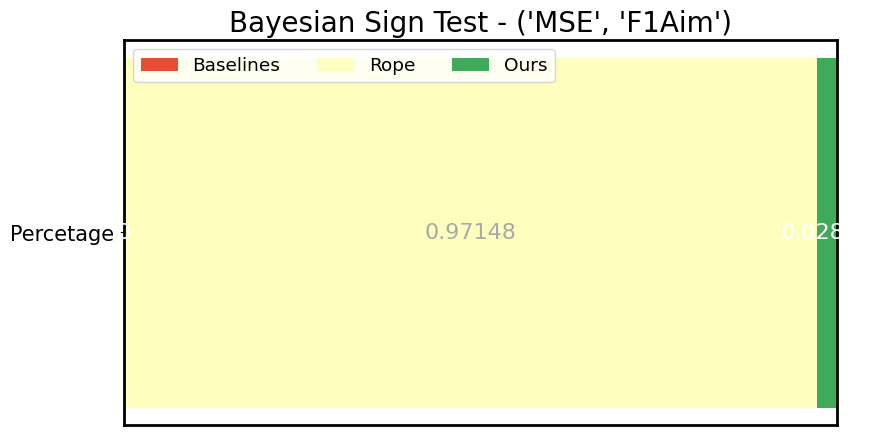

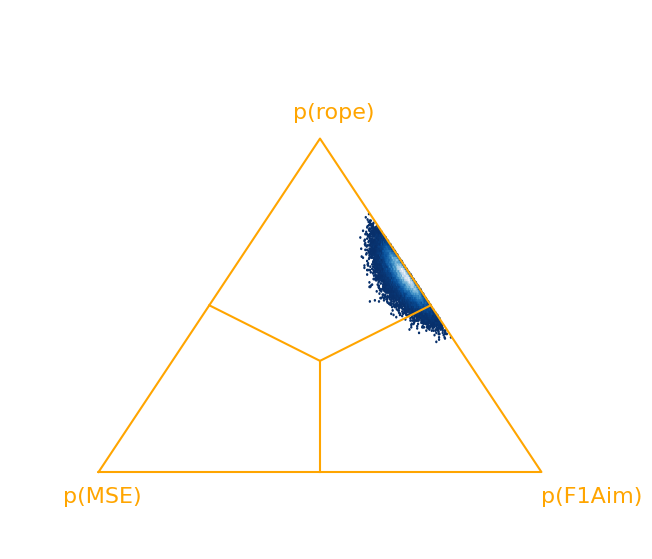

3
('BCE', 'F1Aim')
P(BCE > F1Aim) = 0.0, P(rope) = 0.97826, P(F1Aim > BCE) = 0.02174
0.0 0.97826 0.02174


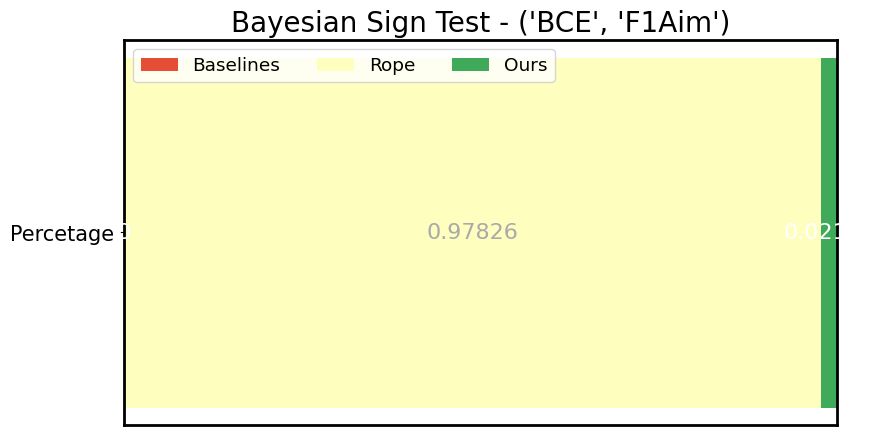

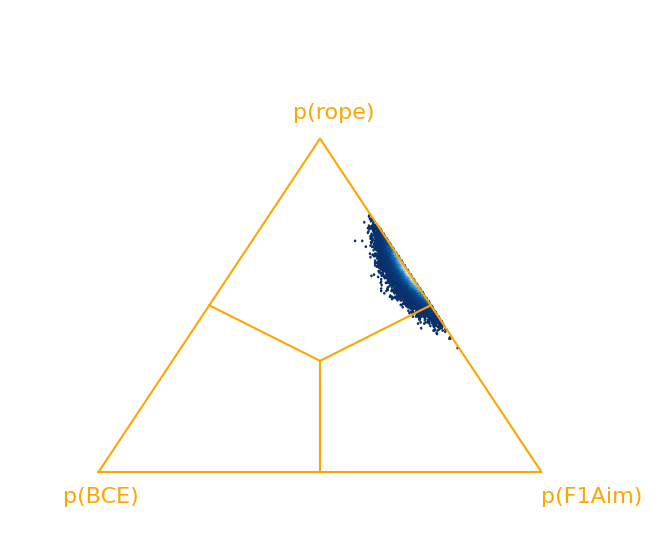

4
('MSE', 'F.5Aim')
P(MSE > F.5Aim) = 0.0, P(rope) = 1.0, P(F.5Aim > MSE) = 0.0
0.0 1.0 0.0


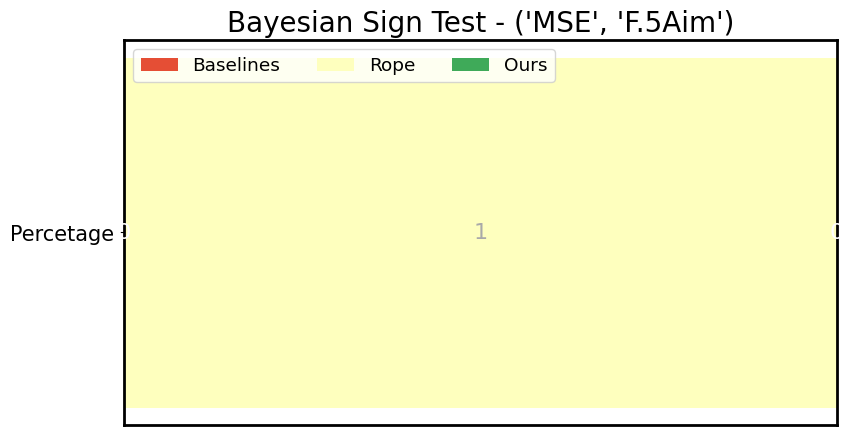

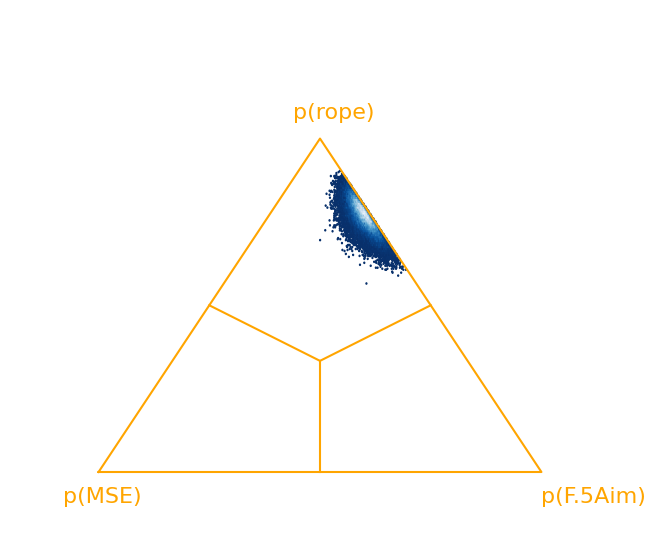

5
('BCE', 'F.5Aim')
P(BCE > F.5Aim) = 0.0, P(rope) = 1.0, P(F.5Aim > BCE) = 0.0
0.0 1.0 0.0


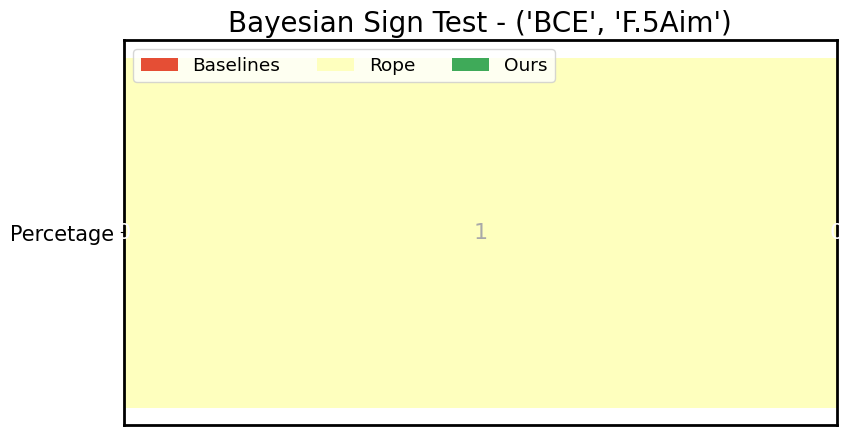

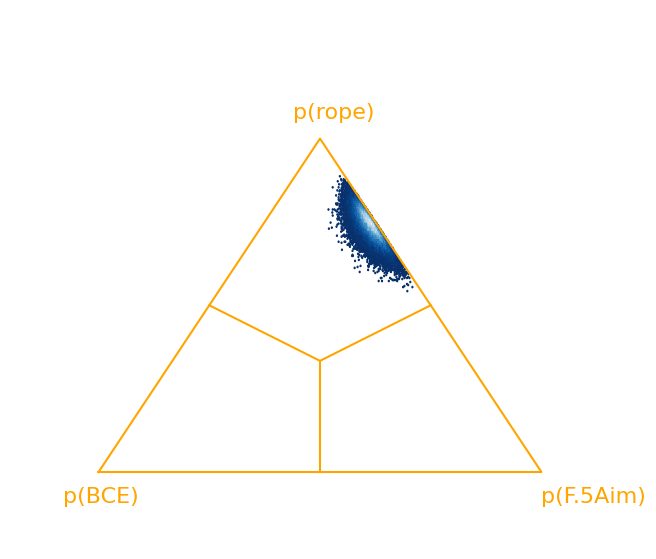

6
('MSE', 'F2Aim')
P(MSE > F2Aim) = 0.0, P(rope) = 0.27522, P(F2Aim > MSE) = 0.72478
0.0 0.27522 0.72478


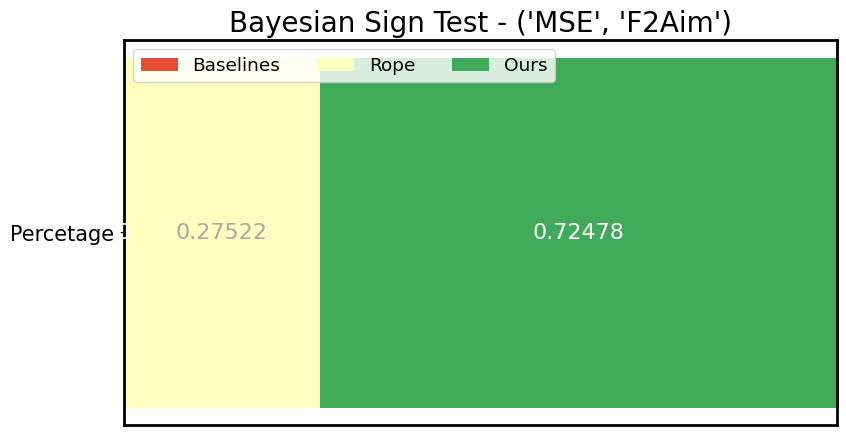

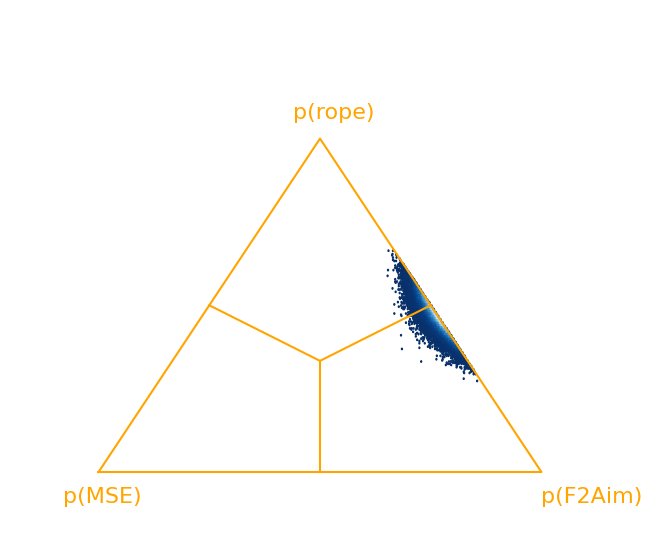

7
('BCE', 'F2Aim')
P(BCE > F2Aim) = 0.0, P(rope) = 0.5789, P(F2Aim > BCE) = 0.4211
0.0 0.5789 0.4211


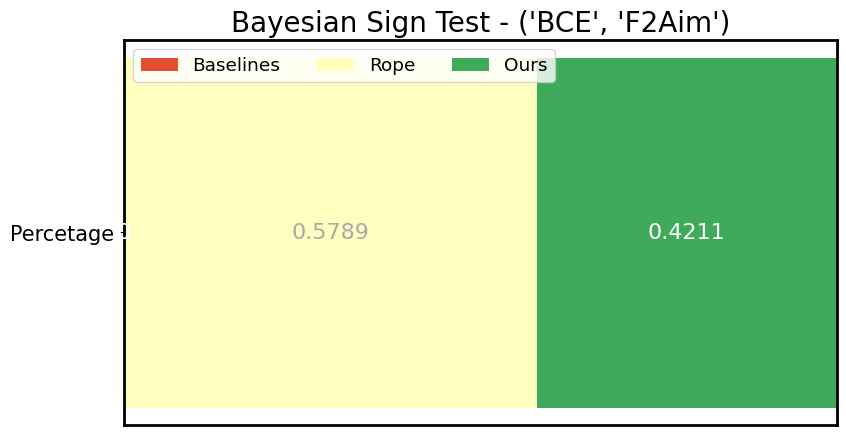

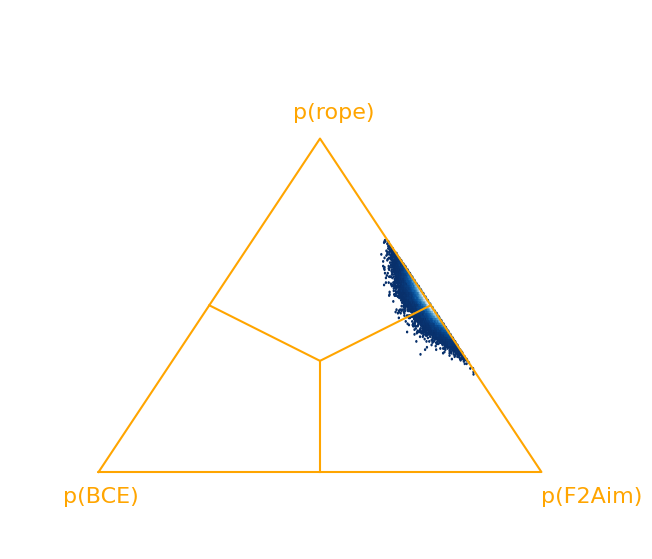

8
('MSE', 'GAim')
P(MSE > GAim) = 0.0, P(rope) = 0.95504, P(GAim > MSE) = 0.04496
0.0 0.95504 0.04496


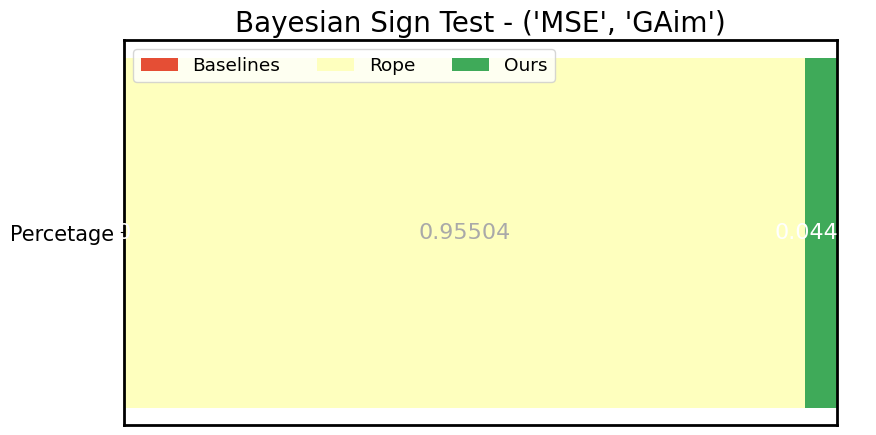

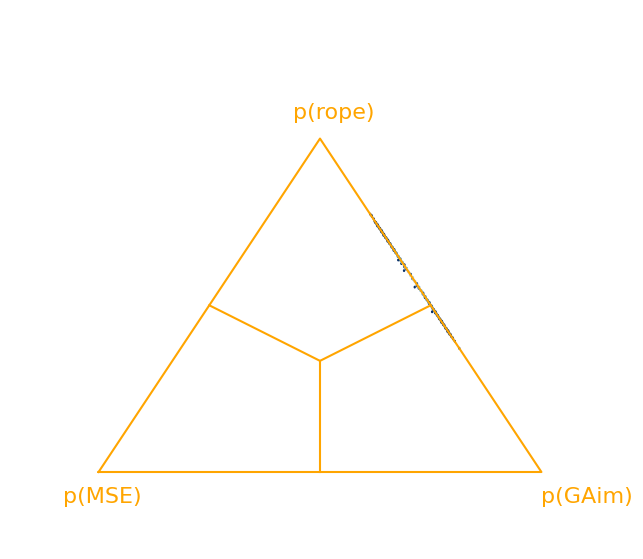

9
('BCE', 'GAim')
P(BCE > GAim) = 0.0, P(rope) = 0.98198, P(GAim > BCE) = 0.01802
0.0 0.98198 0.01802


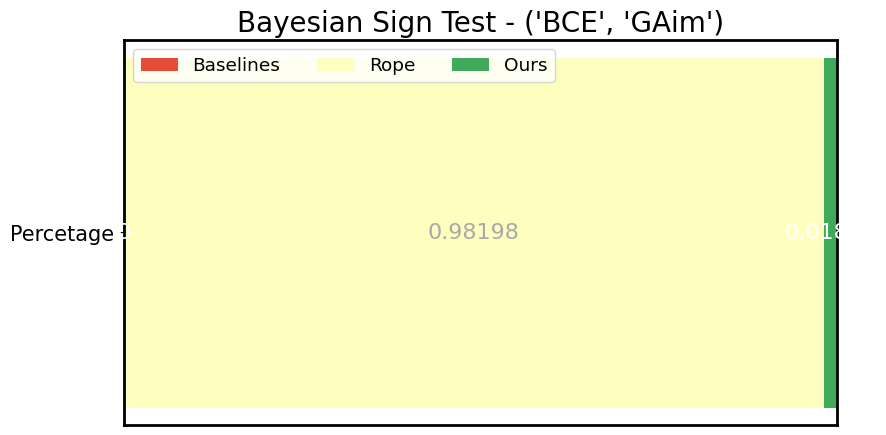

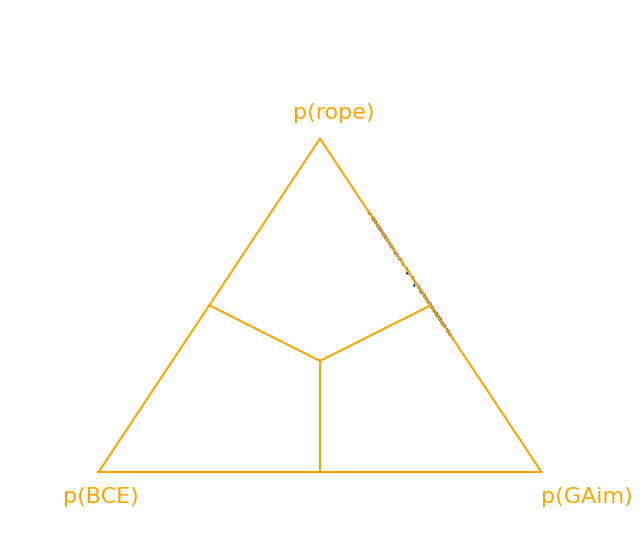

10
('MSE', 'BAim')
P(MSE > BAim) = 0.0, P(rope) = 1.0, P(BAim > MSE) = 0.0
0.0 1.0 0.0


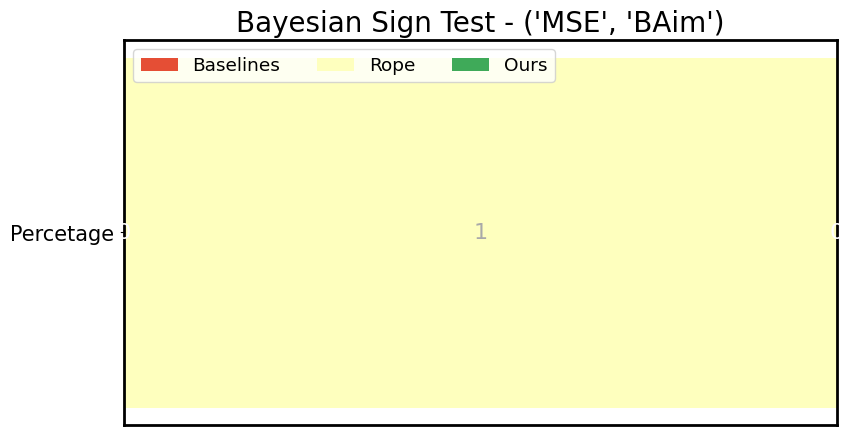

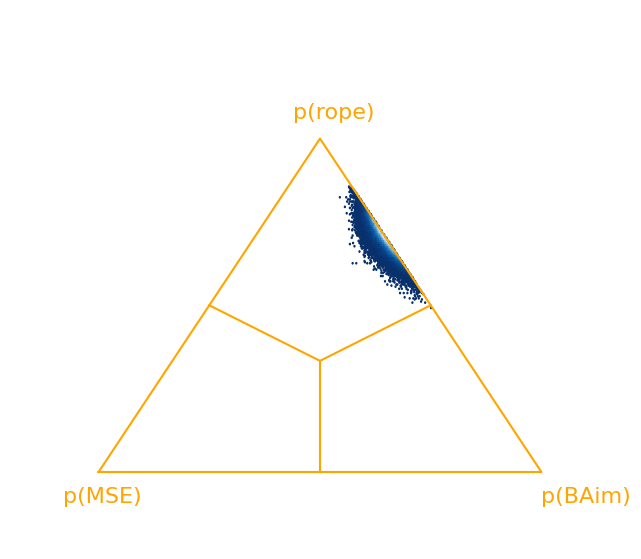

11
('BCE', 'BAim')
P(BCE > BAim) = 0.0, P(rope) = 1.0, P(BAim > BCE) = 0.0
0.0 1.0 0.0


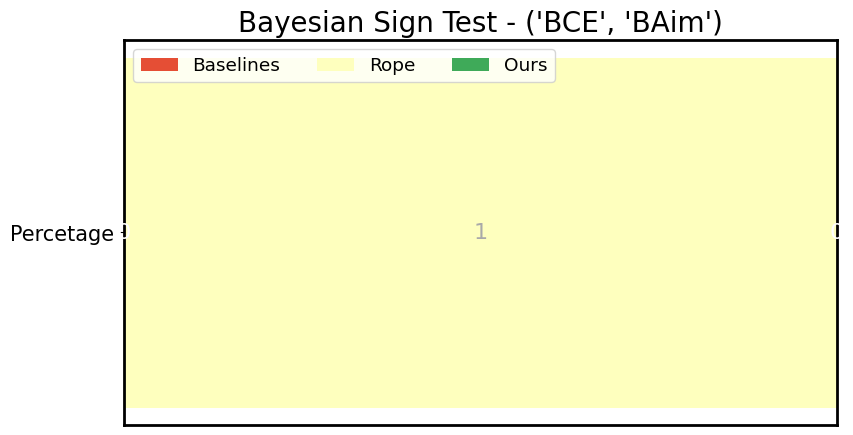

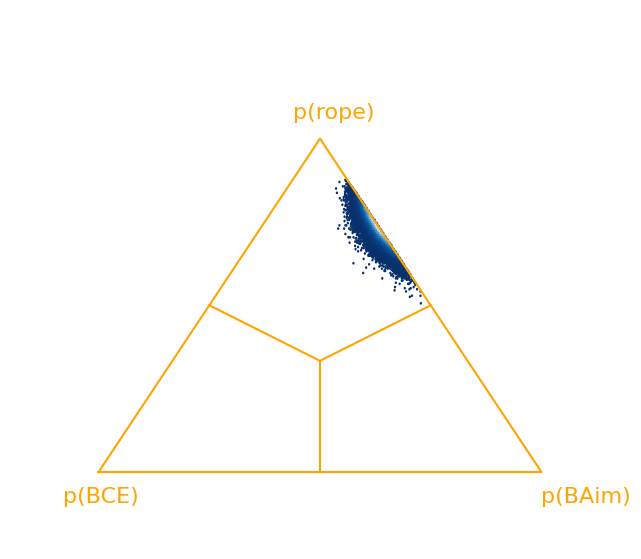

In [80]:
comp = []
basewin = []
draw = []
ourswin = []
z = 0
for i in range(len(ours)):
    for j in range(len(baselines)):
        print(z)
        names = (baselines[j],ours[i])
        print(names)
        comp.append(names)
        X = np.array(dfs[i][[baselines[j],ours[i]]])
        left, within, right = bt.signtest(X, rope=0.1, verbose=True, names=names)
        print(left, within, right)
        basewin.append(left)
        draw.append(within)
        ourswin.append(right)
        stacked_bar({"Percetage": [left, within, right]}, ["Baselines", "Rope", "Ours"])
        plt.title("Bayesian Sign Test - {}".format(names))
        z +=1

        %matplotlib inline
        samples = bt.signtest_MC(X, rope=0.1)
        fig = bt.plot_posterior(samples,names)
        plt.savefig('triangle.png',facecolor="black")
        plt.show()

In [81]:
print(comp)
print(basewin)
print(draw)
print(ourswin)

[('MSE', 'AccAim'), ('BCE', 'AccAim'), ('MSE', 'F1Aim'), ('BCE', 'F1Aim'), ('MSE', 'F.5Aim'), ('BCE', 'F.5Aim'), ('MSE', 'F2Aim'), ('BCE', 'F2Aim'), ('MSE', 'GAim'), ('BCE', 'GAim'), ('MSE', 'BAim'), ('BCE', 'BAim')]
[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
[np.float64(1.0), np.float64(1.0), np.float64(0.97148), np.float64(0.97826), np.float64(1.0), np.float64(1.0), np.float64(0.27522), np.float64(0.5789), np.float64(0.95504), np.float64(0.98198), np.float64(1.0), np.float64(1.0)]
[np.float64(0.0), np.float64(0.0), np.float64(0.02852), np.float64(0.02174), np.float64(0.0), np.float64(0.0), np.float64(0.72478), np.float64(0.4211), np.float64(0.04496), np.float64(0.01802), np.float64(0.0), np.float64(0.0)]


In [82]:
# r=0.1
results = pd.DataFrame(comp, columns = ["Baseline","Ours"])
results["Basewin_prob"] = basewin
results["Draw_prob"] = draw
results["Ourswin_prob"] = ourswin
results

Baseline    Ours  Basewin_prob  Draw_prob  Ourswin_prob
0       MSE  AccAim           0.0    1.00000       0.00000
1       BCE  AccAim           0.0    1.00000       0.00000
2       MSE   F1Aim           0.0    0.97148       0.02852
3       BCE   F1Aim           0.0    0.97826       0.02174
4       MSE  F.5Aim           0.0    1.00000       0.00000
5       BCE  F.5Aim           0.0    1.00000       0.00000
6       MSE   F2Aim           0.0    0.27522       0.72478
7       BCE   F2Aim           0.0    0.57890       0.42110
8       MSE    GAim           0.0    0.95504       0.04496
9       BCE    GAim           0.0    0.98198       0.01802
10      MSE    BAim           0.0    1.00000       0.00000
11      BCE    BAim           0.0    1.00000       0.00000

In [83]:
plt.rcParams["figure.dpi"] = 100
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 19
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

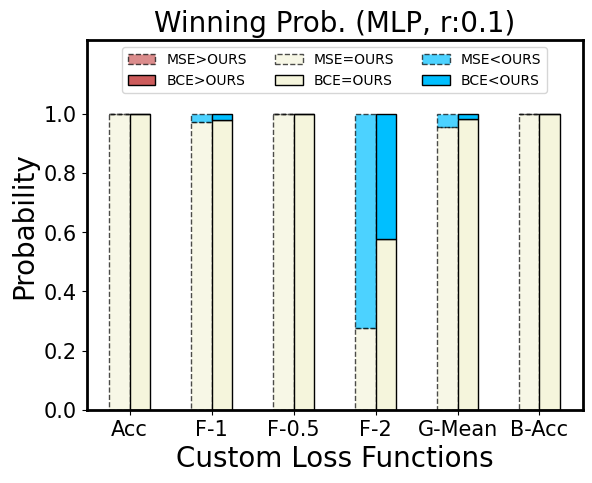

In [84]:
label = ['Acc','F-1','F-0.5','F-2','G-Mean','B-Acc']
index = np.arange(len(label))
bar_width = 0.25
a1 = 0.7
a2 = 1.0
c1 = "black"
c2 = "black"

MSE_win = results[results["Baseline"]=='MSE']['Basewin_prob']
MSE_draw = results[results["Baseline"]=='MSE']['Draw_prob']
MSE_lose = results[results["Baseline"]=='MSE']['Ourswin_prob']
BCE_win = results[results["Baseline"]=='BCE']['Basewin_prob']
BCE_draw = results[results["Baseline"]=='BCE']['Draw_prob']
BCE_lose = results[results["Baseline"]=='BCE']['Ourswin_prob']

# MSE
p1 = plt.bar(index-bar_width*0.5, MSE_win, bar_width, alpha = a1, color="indianred", label="MSE>OURS", edgecolor=c1, ls='--')
p2 = plt.bar(index-bar_width*0.5, MSE_draw, bar_width, alpha = a1, color="beige", bottom=MSE_win, label="MSE=OURS", edgecolor=c1, ls='--')
p3 = plt.bar(index-bar_width*0.5, MSE_lose, bar_width, alpha = a1, color="deepskyblue", bottom=MSE_win+MSE_draw, label="MSE<OURS", edgecolor=c1, ls='--')
# Lable
plt.bar(label, 0, 0)
# BCE
p4 = plt.bar(index+bar_width*0.5, BCE_win, bar_width, alpha = a2, color="indianred", label="BCE>OURS", edgecolor=c2)
p5 = plt.bar(index+bar_width*0.5, BCE_draw, bar_width, alpha = a2, color="beige", bottom=BCE_win, label="BCE=OURS", edgecolor=c2)
p6 = plt.bar(index+bar_width*0.5, BCE_lose, bar_width, alpha = a2, color="deepskyblue", bottom=BCE_win+BCE_draw, label="BCE<OURS", edgecolor=c2)

plt.ylim(0.0 ,1.25)
plt.yticks(np.arange(0, 1.1, 0.2))
plt.legend(ncol=3, fontsize=10, loc='upper center', handles=(p1,p4,p2,p5,p3,p6),)
plt.title("Winning Prob. (MLP, r:0.1)")
plt.xlabel("Custom Loss Functions")
plt.ylabel("Probability")
plt.show()